In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, BatchNormalization, UpSampling2D, Dense, MaxPool2D, LeakyReLU, Reshape, Dropout, Flatten, GaussianNoise, Embedding, multiply, concatenate
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
import tensorflow as tf

import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import time

In [3]:
def normalize_img(img):
    return (img - 127.5)/127.5

def unnormalize_img(img):
    return (img + 1.) / 2.

In [4]:
img_classes = ['chihuahua', 'chimpanzee', 'dalmatian', 'dolphin', 'fox', 'giant+panda', 'giraffe', 'otter', 'polar+bear', 'zebra']
min_images = float('inf')
for root, dirs, files in os.walk("./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/", topdown=False):
    if any(x in root for x in img_classes):
        min_images = min(min_images, len(files))
print('Minimum images across all included classes is:', min_images)

Minimum images across all included classes is: 549


1046 samples in class 0, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/antelope)
383 samples in class 0, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/bat)
193 samples in class 0, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/beaver)
174 samples in class 0, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/blue+whale)
630 samples in class 0, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/bobcat)
895 samples in class 0, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/buffalo)
567 samples in class 0, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/chihuahua)


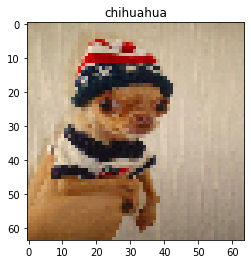

728 samples in class 1, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/chimpanzee)


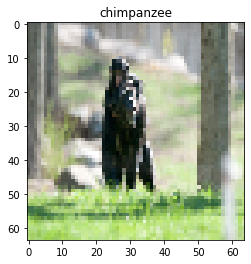

1028 samples in class 2, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/collie)
1338 samples in class 2, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/cow)
549 samples in class 2, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/dalmatian)


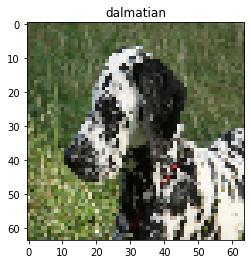

1344 samples in class 3, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/deer)
946 samples in class 3, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/dolphin)


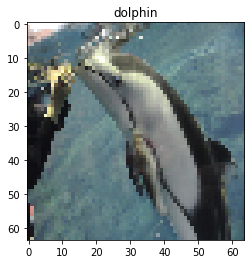

1038 samples in class 4, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/elephant)
664 samples in class 4, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/fox)


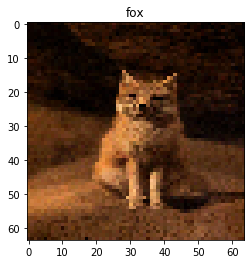

1033 samples in class 5, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/german+shepherd)
874 samples in class 5, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/giant+panda)


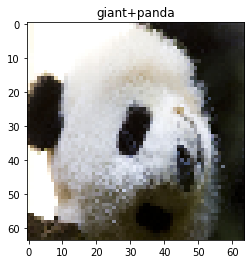

1202 samples in class 6, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/giraffe)


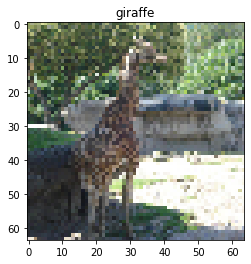

872 samples in class 7, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/gorilla)
852 samples in class 7, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/grizzly+bear)
779 samples in class 7, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/hamster)
684 samples in class 7, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/hippopotamus)
1645 samples in class 7, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/horse)
709 samples in class 7, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/humpback+whale)
291 samples in class 7, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/killer+whale)
720 samples in class 7, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/leopard)
1019 samples in class 7, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/lion)
100 samples in class 7, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/mole)
704 samples in class 7, (./AwA2/AwA2-data/An

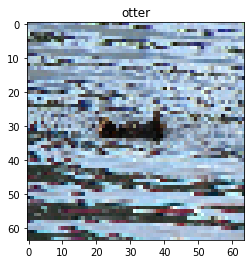

728 samples in class 8, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/ox)
747 samples in class 8, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/persian+cat)
713 samples in class 8, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/pig)
868 samples in class 8, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/polar+bear)


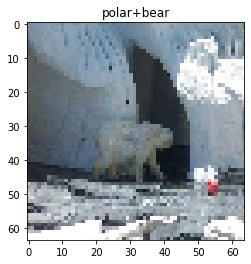

1088 samples in class 9, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/rabbit)
512 samples in class 9, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/raccoon)
310 samples in class 9, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/rat)
696 samples in class 9, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/rhinoceros)
988 samples in class 9, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/seal)
1420 samples in class 9, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/sheep)
500 samples in class 9, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/siamese+cat)
188 samples in class 9, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/skunk)
291 samples in class 9, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/spider+monkey)
1200 samples in class 9, (./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/squirrel)
877 samples in class 9, (./AwA2/AwA2-data/Animals_with_

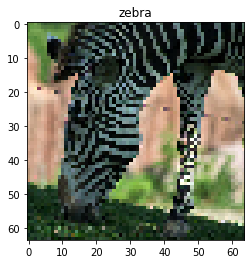

In [5]:
train_imgs = []
train_classes = []
class_index = 0
import os
for root, dirs, files in os.walk("./AwA2/AwA2-data/Animals_with_Attributes2/JPEGImagesCleaned/", topdown=False):
    print(f'{len(files)} samples in class {class_index}, ({root})')
    if any(x in root for x in img_classes):
        for name in files[:min_images]:
            train_imgs.append(cv2.cvtColor(cv2.imread(os.path.join(root, name)), cv2.COLOR_RGB2BGR))
            train_classes.append(class_index)
        plt.imshow(train_imgs[-1])
        plt.title(img_classes[class_index])
        plt.show()
        class_index += 1
    if class_index >= 10:
        break
train_imgs = np.array(train_imgs)
train_imgs = (train_imgs - 127.5)/127.5
train_classes = np.array(train_classes, dtype=np.float32)

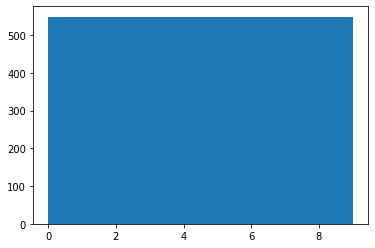

In [6]:
plt.hist(train_classes, bins=10)
plt.show()
assert(len(train_imgs) == len(train_classes))

In [7]:
def make_generator_model(shape):
    
    noise_in = Input(shape=shape)
    label_in = Input(shape=(1,))
    label_embedding = Embedding(10, 100)(label_in)
    
    input_layer = multiply([noise_in, label_embedding])
    
    x = Dense(16*16*64*2)(input_layer)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    
    x = Reshape((16, 16, 128))(x)
    
    x = GaussianNoise(1)(x)
    x = Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    
    x = GaussianNoise(1)(x)
    x = Conv2DTranspose(32, (3, 3), strides=(1, 1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    
    x = GaussianNoise(1)(x)
    x = Conv2DTranspose(16, (3, 3), strides=(2, 2), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    
    x = GaussianNoise(1)(x)
    x = Conv2DTranspose(16, (3, 3), strides=(1, 1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    
    x = Conv2DTranspose(3, (3, 3), strides=(1, 1), padding='same', use_bias=False, activation='tanh')(x)
    
    return Model([noise_in, label_in], x)

In [8]:
generator = make_generator_model((100,))
generator.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 100)       1000        input_2[0][0]                    
__________________________________________________________________________________________________
multiply (Multiply)             (None, 1, 100)       0           input_1[0][0]                    
                                                                 embedding[0][0]              

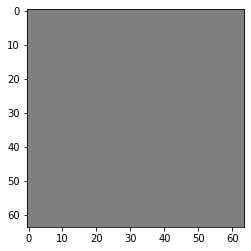

In [9]:
generator = make_generator_model((100,))

noise = np.random.normal(0, 1, 100)
label = 1

generated_image = generator.predict( [np.array([noise]), np.array([label])] )[0]
plt.imshow(unnormalize_img(generated_image), )

In [10]:
def make_discriminator_model():
    input_layer = Input((64, 64, 3))
    x = GaussianNoise(1)(input_layer)
    
    x = Conv2D(64, (3, 3), strides=(2, 2), padding='same')(input_layer)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)
    x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)

    
    x = Conv2D(128, (3, 3), strides=(2, 2), padding='same')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)
    x = Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)
    
    
    x = Flatten()(x)
    x = Dense(64)(x)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)
    
    valid = Dense(1, activation='sigmoid')(x)
    label = Dense(10, activation='softmax')(x)
    
    return Model(input_layer, [valid, label])

In [11]:
discriminator = make_discriminator_model()
discriminator.summary()
valid, label = discriminator.predict(np.array([generated_image]))
print(valid)
print(label)

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 64)   1792        input_5[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_10 (LeakyReLU)      (None, 32, 32, 64)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 32, 32, 64)   0           leaky_re_lu_10[0][0]             
____________________________________________________________________________________________

In [12]:
cross_entropy = BinaryCrossentropy(from_logits=False)

def discriminator_valid_loss(real_output, fake_output, flip):
    
    if flip:
        fake_labels = tf.random.uniform(fake_output.shape, minval=0.9, maxval=1.0)
        real_labels = tf.random.uniform(real_output.shape, minval=0.0, maxval=0.1)
    else:
        real_labels = tf.random.uniform(real_output.shape, minval=0.9, maxval=1.0)
        fake_labels = tf.random.uniform(fake_output.shape, minval=0.0, maxval=0.1)

        
    real_loss = cross_entropy(real_labels, real_output)
    fake_loss = cross_entropy(fake_labels, fake_output)
    total_loss = real_loss + fake_loss
    return total_loss, real_loss, fake_loss

In [13]:
sparse_cce = SparseCategoricalCrossentropy(from_logits=False)
cce = CategoricalCrossentropy(from_logits=False)

'''
real_classes, fake_classes: List of class ints (0-200)
real_output, fake_output: List of softmax vectors
'''
def discriminator_class_loss_real(real_output, real_classes):
    return sparse_cce(real_classes, real_output) 

def discriminator_class_loss_fake(fake_output, fake_classes):
    return sparse_cce(fake_classes, fake_output)

In [14]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [15]:
generator_optimizer = Adam(1e-4)
discriminator_optimizer = Adam(1e-4)

In [58]:
@tf.function
def train_step(images, labels, flip, warmup):
    noise = tf.random.truncated_normal([32, 100])
    sampled_labels = tf.cast(tf.random.uniform([32, 1], minval=0, maxval=10, dtype='int32'), 'float32')
#     sampled_labels += tf.random.truncated_normal(sampled_labels.shape, mean=0.0, stddev=0.05)
    labels = tf.reshape(labels, (labels.shape[0], 1))
#     labels += tf.random.truncated_normal(sampled_labels.shape, mean=0.0, stddev=0.05)
    
    
    gen_losses = []
    disc_losses = []
    disc_real_losses = []
    disc_fake_losses = []
    disc_class_real_losses = []
    disc_class_fake_losses = []

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator([noise, sampled_labels], training=True)
        
        real_output, real_label_output = discriminator(images, training=True)
        fake_output, fake_label_output = discriminator(generated_images, training=True)
        
        gen_loss = generator_loss(fake_output)
        disc_loss, disc_real_loss, disc_fake_loss = discriminator_valid_loss(real_output, fake_output, flip)
        disc_class_real_loss = discriminator_class_loss_real(real_label_output, labels)
        disc_class_fake_loss = discriminator_class_loss_fake(fake_label_output, sampled_labels)
        disc_loss += ((2.0 - warmup) * disc_class_real_loss + warmup * disc_class_fake_loss)
        
        gen_losses.append(K.mean(gen_loss))
        disc_losses.append(K.mean(disc_loss))
        disc_real_losses.append(K.mean(disc_real_loss))
        disc_fake_losses.append(K.mean(disc_fake_loss))
        disc_class_real_losses.append(K.mean(disc_class_real_loss))
        disc_class_fake_losses.append(K.mean(disc_class_fake_loss))
    
    
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)

    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return (gen_losses, disc_losses, disc_real_losses, disc_fake_losses, disc_class_real_losses, disc_class_fake_losses)

In [54]:
def train(train_imgs, train_labels, epochs, warmup):
    gen_loss_all = []
    disc_loss_all = []
    disc_loss_real_all = []
    disc_loss_fake_all = []
    disc_class_loss_real_all = []
    disc_class_loss_fake_all = []
    warmup_step = 1./5000.
    
    num_samples = len(train_imgs)
    batch_counter = 0
    
    for epoch in range(epochs):
        start = time.time()
        
        gen_loss_epoch = [1, 0]
        disc_loss_epoch = [1, 0]
        disc_loss_real_epoch = [1, 0]
        disc_loss_fake_epoch = [1, 0]
        disc_class_loss_real_epoch = [1, 0]
        disc_class_loss_fake_epoch = [1, 0]
        
        seed = np.random.randint(0, 10000)
        np.random.seed(seed)
        np.random.shuffle(train_imgs)
        np.random.seed(seed)
        np.random.shuffle(train_labels)
        
        for idx, i in enumerate(range(0, num_samples - 32, 32)):
            
            gen_loss_batch, disc_loss_batch, disc_loss_real_batch, disc_loss_fake_batch, disc_class_loss_real_batch, disc_class_loss_fake_batch = train_step(train_imgs[i:(i+32)], train_labels[i:(i+32)], batch_counter % 20 == 0, tf.constant(warmup, dtype='float32'))

            gen_loss_epoch[0] += 1
            disc_loss_epoch[0] += 1
            disc_loss_real_epoch[0] += 1
            disc_loss_fake_epoch[0] += 1
            disc_class_loss_real_epoch[0] += 1
            disc_class_loss_fake_epoch[0] += 1
            gen_loss_epoch[1] += np.mean(gen_loss_batch)
            disc_loss_epoch[1] += np.mean(disc_loss_batch)
            disc_loss_real_epoch[1] += np.mean(disc_loss_real_batch)
            disc_loss_fake_epoch[1] += np.mean(disc_loss_fake_batch)
            disc_class_loss_real_epoch[1] += np.mean(disc_class_loss_real_batch)
            disc_class_loss_fake_epoch[1] += np.mean(disc_class_loss_fake_batch)
            
            batch_counter += 1
            
        print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))
        print(f'Gen loss: {gen_loss_epoch[1]/gen_loss_epoch[0]}, Disc loss: {disc_loss_epoch[1]/disc_loss_epoch[0]}, Disc valid real loss: {disc_loss_real_epoch[1]/disc_loss_real_epoch[0]}, Disc valid fake loss: {disc_loss_fake_epoch[1]/disc_loss_fake_epoch[0]}, Disc class real loss: {disc_class_loss_real_epoch[1]/disc_class_loss_real_epoch[0]}, Disc class fake loss: {disc_class_loss_fake_epoch[1]/disc_class_loss_fake_epoch[0]}')
        
        gen_loss_all.append(gen_loss_epoch[1]/gen_loss_epoch[0])
        disc_loss_all.append(disc_loss_epoch[1]/disc_loss_epoch[0])
        disc_loss_real_all.append(disc_loss_real_epoch[1]/disc_loss_real_epoch[0])
        disc_loss_fake_all.append(disc_loss_fake_epoch[1]/disc_loss_fake_epoch[0])
        disc_class_loss_real_all.append(disc_class_loss_real_epoch[1]/disc_class_loss_real_epoch[0])
        disc_class_loss_fake_all.append(disc_class_loss_fake_epoch[1]/disc_class_loss_fake_epoch[0])
        
        if warmup < 1:
            warmup += warmup_step
    
    return (gen_loss_all, disc_loss_all, disc_loss_real_all, disc_loss_fake_all, disc_class_loss_real_all, disc_class_loss_fake_all, warmup)
    


In [55]:
def long_train(starting_checkpoint=0, num_checkpoints=0, checkpoint_interval=0, g_hist=None, d_hist=None, d_real_hist=None, d_fake_hist=None, d_class_real_hist=None, d_class_fake_hist=None, noise=None, label=None, save_files=False, warmup=0.):
    
#     if noise is None:
#         noise = np.random.normal(0, 1, 100)

    if g_hist is None:
        g_hist = []
    
    if d_hist is None:
        d_hist = []
        
    if d_real_hist is None:
        d_real_hist = []
    
    if d_fake_hist is None:
        d_fake_hist = []
        
    if d_class_real_hist is None:
        d_class_real_hist = []
        
    if d_class_fake_hist is None:
        d_class_fake_hist = []

    for i in range(starting_checkpoint, starting_checkpoint + num_checkpoints):
        print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
        print('')
        print(f'Starting checkpoint {i}')
        print('')
        print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
        
        gen_temp, disc_temp, disc_real_temp, disc_fake_temp, disc_class_real_temp, disc_class_fake_temp, warmup = train(train_imgs, train_classes, checkpoint_interval, warmup)
        
        print('WARMUP:', warmup)
        
        g_hist += gen_temp
        d_hist += disc_temp
        d_real_hist += disc_real_temp
        d_fake_hist += disc_fake_temp
        d_class_real_hist += disc_class_real_temp
        d_class_fake_hist += disc_class_fake_temp
        generated_image = generator.predict( [np.array([noise]), np.array([label])])[0]
        plt.imshow(unnormalize_img(generated_image))
        if save_files:
            plt.savefig('./results/prog-imgs/animal-gan-conditional-10-samples/' + str((i+1)*checkpoint_interval) + '.png')
        plt.show()
        if save_files:
            generator.save_weights('./results/weights/animal-gan-conditional-10-samples/gen_weights_conditional_10_samples_' + str((i+1)*checkpoint_interval) + '.h5')
            discriminator.save_weights('./results/weights/animal-gan-conditional-10-samples/disc_weights_conditional_10_samples_' + str((i+1)*checkpoint_interval) + '.h5')
    
    return starting_checkpoint + num_checkpoints, totalepochs

In [56]:
discriminator = make_discriminator_model()
generator = make_generator_model((100,))
generator_optimizer = Adam(1e-4)
discriminator_optimizer = Adam(1e-4)

In [57]:
# To get passed into training function and get modified
# Run cell when starting from scratch
gen_loss_hist = []
disc_loss_hist = []
disc_loss_real_hist = []
disc_loss_fake_hist = []
disc_class_loss_real_hist = []
disc_class_loss_fake_hist = []
noise100 = np.random.normal(0, 1, 100)
label = 1
next_starting_checkpoint = 0
totalepochs = 0
warmup = 1.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 40

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 6.452670335769653 sec
Gen loss: 1.4432767712792685, Disc loss: 1.4857520831878794, Disc valid real loss: 0.5222674402040105, Disc valid fake loss: 0.49483055413462396, Disc class real loss: 0.07123069922699658, Disc class fake loss: 0.39742339047235115
Time for epoch 2 is 6.342808723449707 sec
Gen loss: 1.4498740801977557, Disc loss: 1.493508255758951, Disc valid real loss: 0.5286410305389139, Disc valid fake loss: 0.48905767621689067, Disc class real loss: 0.07870076524180382, Disc class fake loss: 0.3971087787906791
Time for epoch 3 is 6.340855121612549 sec
Gen loss: 1.4293856052465217, Disc loss: 1.5150541767131451, Disc valid real loss: 0.5146708569900934, Disc valid fake loss: 0.49622162414151566, Disc class real loss: 0.08695604037872494, Disc class fake loss: 0.4172056509658348
Time for epoch 4 is 6.36412501335144 sec
Gen loss: 1.43972384236579

Time for epoch 31 is 6.428647518157959 sec
Gen loss: 1.4289601590744285, Disc loss: 1.498842683295871, Disc valid real loss: 0.5262462346013203, Disc valid fake loss: 0.5008744301144467, Disc class real loss: 0.0804368081735447, Disc class fake loss: 0.39128520911516146
Time for epoch 32 is 6.438333034515381 sec
Gen loss: 1.4380706382352253, Disc loss: 1.4882083445094352, Disc valid real loss: 0.5140244456571202, Disc valid fake loss: 0.4946317213565804, Disc class real loss: 0.06778486562232205, Disc class fake loss: 0.41176731351676377
Time for epoch 33 is 6.423079967498779 sec
Gen loss: 1.4189106593298357, Disc loss: 1.5248486243708188, Disc valid real loss: 0.5246401760120725, Disc valid fake loss: 0.50533500781586, Disc class real loss: 0.07768146152510633, Disc class fake loss: 0.4171919794103434
Time for epoch 34 is 6.415858268737793 sec
Gen loss: 1.4244722446729972, Disc loss: 1.457831628793894, Disc valid real loss: 0.519702754048414, Disc valid fake loss: 0.4890920698296192, 

Time for epoch 62 is 6.464390993118286 sec
Gen loss: 1.4402312033398206, Disc loss: 1.4517367114854414, Disc valid real loss: 0.5282511889588001, Disc valid fake loss: 0.49312450580818706, Disc class real loss: 0.06427807987635133, Disc class fake loss: 0.36608293817140336
Time for epoch 63 is 6.477445363998413 sec
Gen loss: 1.4604687669942544, Disc loss: 1.4708862491818362, Disc valid real loss: 0.509139806725258, Disc valid fake loss: 0.49175013463164485, Disc class real loss: 0.07511194354074813, Disc class fake loss: 0.3948843673218128
Time for epoch 64 is 6.471330881118774 sec
Gen loss: 1.4114969178687695, Disc loss: 1.5180212058300195, Disc valid real loss: 0.5342524023943169, Disc valid fake loss: 0.5009581968188286, Disc class real loss: 0.08010478695004442, Disc class fake loss: 0.40270583132325216
Time for epoch 65 is 6.462318181991577 sec
Gen loss: 1.4438904163449309, Disc loss: 1.462567195989365, Disc valid real loss: 0.518933562865091, Disc valid fake loss: 0.4855677842400

Time for epoch 93 is 6.47894287109375 sec
Gen loss: 1.418871712546016, Disc loss: 1.5001593966816746, Disc valid real loss: 0.5272176723147548, Disc valid fake loss: 0.4978825120731842, Disc class real loss: 0.07755909755224968, Disc class fake loss: 0.39750011815407943
Time for epoch 94 is 6.4984612464904785 sec
Gen loss: 1.4234769164129746, Disc loss: 1.4660013577965803, Disc valid real loss: 0.5221356558938359, Disc valid fake loss: 0.4896047908899396, Disc class real loss: 0.07395835937038714, Disc class fake loss: 0.3803025476287964
Time for epoch 95 is 6.4928038120269775 sec
Gen loss: 1.419189149557158, Disc loss: 1.485964426467585, Disc valid real loss: 0.5292918501898299, Disc valid fake loss: 0.49438943575287975, Disc class real loss: 0.08024268091363876, Disc class fake loss: 0.38204045637055883
Time for epoch 96 is 6.49837851524353 sec
Gen loss: 1.4216847821723584, Disc loss: 1.4875478162321933, Disc valid real loss: 0.5206480286149091, Disc valid fake loss: 0.49011781881021

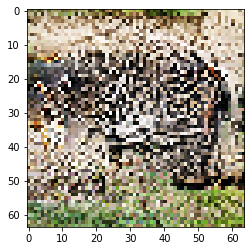

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 41

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 6.488009929656982 sec
Gen loss: 1.4103176981903787, Disc loss: 1.5101355612277985, Disc valid real loss: 0.5290492705480997, Disc valid fake loss: 0.494639897242535, Disc class real loss: 0.07532510550714336, Disc class fake loss: 0.4111212862785472
Time for epoch 2 is 6.494878530502319 sec
Gen loss: 1.4486283992612086, Disc loss: 1.4840151833933453, Disc valid real loss: 0.5252834463188815, Disc valid fake loss: 0.49657182568727537, Disc class real loss: 0.07109736008325938, Disc class fake loss: 0.3910625502033982
Time for epoch 3 is 6.580647945404053 sec
Gen loss: 1.5040738395480222, Disc loss: 1.4998984548241594, Disc valid real loss: 0.5131068323240724, Disc valid fake loss: 0.47992775901112444, Disc class real loss: 0.07624867561457375, Disc class fake loss: 0.43061518326921516
Time for epoch 4 is 6.506429672241211 sec
Gen loss: 1.40696025102637

Time for epoch 31 is 6.54952335357666 sec
Gen loss: 1.4056962707708047, Disc loss: 1.5083170741103415, Disc valid real loss: 0.5249073758374813, Disc valid fake loss: 0.5047325018879979, Disc class real loss: 0.07962267916530458, Disc class fake loss: 0.39905452056852886
Time for epoch 32 is 6.581480979919434 sec
Gen loss: 1.4489752289860747, Disc loss: 1.481240341829699, Disc valid real loss: 0.5222077544691951, Disc valid fake loss: 0.4906363261993541, Disc class real loss: 0.07336754310702862, Disc class fake loss: 0.3950287191587132
Time for epoch 33 is 6.536010980606079 sec
Gen loss: 1.4245162509208502, Disc loss: 1.4735447542611944, Disc valid real loss: 0.5209583567325459, Disc valid fake loss: 0.4978143295576406, Disc class real loss: 0.06774105127294396, Disc class fake loss: 0.3870310135792161
Time for epoch 34 is 6.562812328338623 sec
Gen loss: 1.4402336166348568, Disc loss: 1.4946501040181448, Disc valid real loss: 0.5197869033314461, Disc valid fake loss: 0.497032177656195

Time for epoch 62 is 6.514565467834473 sec
Gen loss: 1.4286053430202394, Disc loss: 1.506681928107905, Disc valid real loss: 0.5281768766946571, Disc valid fake loss: 0.49869472325541253, Disc class real loss: 0.0777443587904536, Disc class fake loss: 0.4020659700036049
Time for epoch 63 is 6.532007217407227 sec
Gen loss: 1.445594379721686, Disc loss: 1.4696345627307892, Disc valid real loss: 0.5194723250907521, Disc valid fake loss: 0.4879665594807891, Disc class real loss: 0.07102847577689952, Disc class fake loss: 0.39116720677635003
Time for epoch 64 is 6.5785815715789795 sec
Gen loss: 1.4160177742325983, Disc loss: 1.5055551120015078, Disc valid real loss: 0.526742200865302, Disc valid fake loss: 0.5044774016322091, Disc class real loss: 0.07268267647948029, Disc class fake loss: 0.40165283032801263
Time for epoch 65 is 6.554424047470093 sec
Gen loss: 1.422512260287307, Disc loss: 1.4760227834069453, Disc valid real loss: 0.5114567451352297, Disc valid fake loss: 0.485736171000225

Time for epoch 93 is 6.55573844909668 sec
Gen loss: 1.454688014679177, Disc loss: 1.4981791238452113, Disc valid real loss: 0.5240557356629261, Disc valid fake loss: 0.492310831713122, Disc class real loss: 0.07422874762871584, Disc class fake loss: 0.40758380571077035
Time for epoch 94 is 6.532683610916138 sec
Gen loss: 1.4346078190692635, Disc loss: 1.4890609497940817, Disc valid real loss: 0.5241062741640002, Disc valid fake loss: 0.4937407717455265, Disc class real loss: 0.07226255374586989, Disc class fake loss: 0.39895134995323284
Time for epoch 95 is 6.555730104446411 sec
Gen loss: 1.4628035072670427, Disc loss: 1.474479585539463, Disc valid real loss: 0.5270505121280981, Disc valid fake loss: 0.4915092476578646, Disc class real loss: 0.07440727224118661, Disc class fake loss: 0.38151255094034725
Time for epoch 96 is 6.526475191116333 sec
Gen loss: 1.4297286784926126, Disc loss: 1.4655498144931571, Disc valid real loss: 0.5180593930011572, Disc valid fake loss: 0.485403310074362

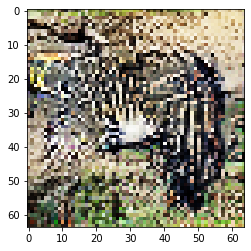

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 42

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 6.583542585372925 sec
Gen loss: 1.4356372404930204, Disc loss: 1.4863160959509916, Disc valid real loss: 0.5226396032890608, Disc valid fake loss: 0.5023055580812831, Disc class real loss: 0.0727331108619394, Disc class fake loss: 0.38863781939239
Time for epoch 2 is 6.555354356765747 sec
Gen loss: 1.4721122501894486, Disc loss: 1.4457814104335254, Disc valid real loss: 0.5118200484403345, Disc valid fake loss: 0.49551906194104706, Disc class real loss: 0.06650604119762606, Disc class fake loss: 0.37193625701894595
Time for epoch 3 is 6.550353288650513 sec
Gen loss: 1.4285966407421022, Disc loss: 1.4634261436240619, Disc valid real loss: 0.5139455015576163, Disc valid fake loss: 0.49427616630875787, Disc class real loss: 0.07291205695472917, Disc class fake loss: 0.38229242032177224
Time for epoch 4 is 6.536726236343384 sec
Gen loss: 1.461382774419562

Time for epoch 31 is 6.554422616958618 sec
Gen loss: 1.4048481659833776, Disc loss: 1.4859777820664783, Disc valid real loss: 0.5228381844800573, Disc valid fake loss: 0.5092917169595874, Disc class real loss: 0.08060747362418794, Disc class fake loss: 0.3732404058669196
Time for epoch 32 is 6.658704996109009 sec
Gen loss: 1.4335492689942204, Disc loss: 1.48054058988427, Disc valid real loss: 0.5157608474756397, Disc valid fake loss: 0.4892867358271466, Disc class real loss: 0.07852606825411407, Disc class fake loss: 0.39696693472390954
Time for epoch 33 is 6.574241399765015 sec
Gen loss: 1.4160382615965466, Disc loss: 1.4854243702666705, Disc valid real loss: 0.5251784054345863, Disc valid fake loss: 0.505746332365413, Disc class real loss: 0.07520977035435567, Disc class fake loss: 0.3792898546211248
Time for epoch 34 is 6.54341721534729 sec
Gen loss: 1.427675033031508, Disc loss: 1.4944991490175559, Disc valid real loss: 0.5212951380499574, Disc valid fake loss: 0.4928944202703099, 

Time for epoch 62 is 6.564525127410889 sec
Gen loss: 1.4231759226599405, Disc loss: 1.4679490154565766, Disc valid real loss: 0.5241577474530353, Disc valid fake loss: 0.4994831778282343, Disc class real loss: 0.06882527873710577, Disc class fake loss: 0.37548281832836394
Time for epoch 63 is 6.5547709465026855 sec
Gen loss: 1.465303436961285, Disc loss: 1.4482319472834122, Disc valid real loss: 0.5130134188505107, Disc valid fake loss: 0.48547918072273566, Disc class real loss: 0.06402455567555546, Disc class fake loss: 0.3857147986892351
Time for epoch 64 is 6.5674214363098145 sec
Gen loss: 1.4380787812000098, Disc loss: 1.4843917565290319, Disc valid real loss: 0.5340511646381644, Disc valid fake loss: 0.49714699976666027, Disc class real loss: 0.06283768024133128, Disc class fake loss: 0.39035590950313004
Time for epoch 65 is 6.551113128662109 sec
Gen loss: 1.4252898637638536, Disc loss: 1.454757564636164, Disc valid real loss: 0.5144283944784209, Disc valid fake loss: 0.4984104564

Time for epoch 93 is 6.569124937057495 sec
Gen loss: 1.4216654349205107, Disc loss: 1.5088553106368974, Disc valid real loss: 0.539434051964172, Disc valid fake loss: 0.5032134127131728, Disc class real loss: 0.0744152001097127, Disc class fake loss: 0.39179264745393466
Time for epoch 94 is 6.5631678104400635 sec
Gen loss: 1.405528182207152, Disc loss: 1.4709607231062511, Disc valid real loss: 0.533480704350527, Disc valid fake loss: 0.496332575935264, Disc class real loss: 0.07598657588485282, Disc class fake loss: 0.3651608691312546
Time for epoch 95 is 6.557041645050049 sec
Gen loss: 1.4205640457397284, Disc loss: 1.4964850600375685, Disc valid real loss: 0.5288659847059916, Disc valid fake loss: 0.4950623345929523, Disc class real loss: 0.07193490504936943, Disc class fake loss: 0.40062184228973335
Time for epoch 96 is 6.559302806854248 sec
Gen loss: 1.4229697702929032, Disc loss: 1.4878795943980994, Disc valid real loss: 0.5170084205131198, Disc valid fake loss: 0.4918875333874725

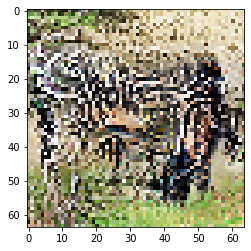

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 43

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 6.546136856079102 sec
Gen loss: 1.430915818657986, Disc loss: 1.482972735582396, Disc valid real loss: 0.5289647203198699, Disc valid fake loss: 0.49767187878836033, Disc class real loss: 0.06806809274577211, Disc class fake loss: 0.38826804257236247
Time for epoch 2 is 6.522700309753418 sec
Gen loss: 1.4254480364710786, Disc loss: 1.4727276702259862, Disc valid real loss: 0.5291708399390065, Disc valid fake loss: 0.49340787425983784, Disc class real loss: 0.06704079180544373, Disc class fake loss: 0.3831081603935292
Time for epoch 3 is 6.544771671295166 sec
Gen loss: 1.4305299374946328, Disc loss: 1.4885486911895662, Disc valid real loss: 0.5203375005444815, Disc valid fake loss: 0.4854355677962303, Disc class real loss: 0.07480742778293355, Disc class fake loss: 0.40796819875060125
Time for epoch 4 is 6.551470518112183 sec
Gen loss: 1.42703505033670

Time for epoch 31 is 6.548978090286255 sec
Gen loss: 1.4482002237508462, Disc loss: 1.4807452528282654, Disc valid real loss: 0.520277819661207, Disc valid fake loss: 0.490294401382291, Disc class real loss: 0.08058551352925945, Disc class fake loss: 0.38958752228943416
Time for epoch 32 is 6.544433832168579 sec
Gen loss: 1.4347680703152057, Disc loss: 1.4549925043139347, Disc valid real loss: 0.5133854849047439, Disc valid fake loss: 0.48931809843972673, Disc class real loss: 0.06531073656582902, Disc class fake loss: 0.38697818541076295
Time for epoch 33 is 6.521393537521362 sec
Gen loss: 1.4371259191701578, Disc loss: 1.4843407456958018, Disc valid real loss: 0.5297092408981434, Disc valid fake loss: 0.5000246061488639, Disc class real loss: 0.06727157970403083, Disc class fake loss: 0.38733531712272834
Time for epoch 34 is 6.543881893157959 sec
Gen loss: 1.4173003324242526, Disc loss: 1.4635630859885105, Disc valid real loss: 0.5185066147945648, Disc valid fake loss: 0.492405169578

Time for epoch 62 is 6.557243347167969 sec
Gen loss: 1.4285828533560732, Disc loss: 1.474447983641957, Disc valid real loss: 0.5330357561970867, Disc valid fake loss: 0.49598993516938633, Disc class real loss: 0.06508211082735554, Disc class fake loss: 0.3803401825039886
Time for epoch 63 is 6.566723585128784 sec
Gen loss: 1.4338318546151005, Disc loss: 1.474871006469394, Disc valid real loss: 0.527919298341108, Disc valid fake loss: 0.49731822970301603, Disc class real loss: 0.06866832615721018, Disc class fake loss: 0.3809651514558598
Time for epoch 64 is 6.559388637542725 sec
Gen loss: 1.418195366859436, Disc loss: 1.4749086422975672, Disc valid real loss: 0.5254121237369471, Disc valid fake loss: 0.49767056523367414, Disc class real loss: 0.07004050099626617, Disc class fake loss: 0.38178545193270197
Time for epoch 65 is 6.586073875427246 sec
Gen loss: 1.4036812768426052, Disc loss: 1.485217278086862, Disc valid real loss: 0.5219004774509475, Disc valid fake loss: 0.497941692208134

Time for epoch 93 is 6.5727245807647705 sec
Gen loss: 1.4317830101002094, Disc loss: 1.471242745255315, Disc valid real loss: 0.526097544750502, Disc valid fake loss: 0.4952853656438894, Disc class real loss: 0.07036739176269187, Disc class fake loss: 0.37949244192866394
Time for epoch 94 is 6.544039011001587 sec
Gen loss: 1.4107571500678395, Disc loss: 1.4688572232113328, Disc valid real loss: 0.5118853420365689, Disc valid fake loss: 0.5006018204744472, Disc class real loss: 0.06905412199625442, Disc class fake loss: 0.387315938985625
Time for epoch 95 is 6.556500434875488 sec
Gen loss: 1.4287707978902862, Disc loss: 1.4846798455299333, Disc valid real loss: 0.5405243676762248, Disc valid fake loss: 0.499538192395554, Disc class real loss: 0.06635733308855357, Disc class fake loss: 0.37825995259160217
Time for epoch 96 is 6.515181541442871 sec
Gen loss: 1.4104685055655102, Disc loss: 1.460125172207522, Disc valid real loss: 0.520845731677011, Disc valid fake loss: 0.49293038612881374

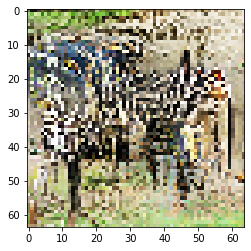

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 44

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 6.48849892616272 sec
Gen loss: 1.4350201660810515, Disc loss: 1.4508012193580007, Disc valid real loss: 0.5230827321146809, Disc valid fake loss: 0.4922739877257236, Disc class real loss: 0.06438057083463253, Disc class fake loss: 0.3710639256290918
Time for epoch 2 is 6.609804630279541 sec
Gen loss: 1.416462818550509, Disc loss: 1.4726245146851207, Disc valid real loss: 0.5256546065211296, Disc valid fake loss: 0.5057790525430856, Disc class real loss: 0.0661984455208619, Disc class fake loss: 0.37499241669510686
Time for epoch 3 is 6.583018779754639 sec
Gen loss: 1.4510312544745068, Disc loss: 1.4785715598006581, Disc valid real loss: 0.5231618189881014, Disc valid fake loss: 0.4916005825927091, Disc class real loss: 0.07757449442477421, Disc class fake loss: 0.38623466741207035
Time for epoch 4 is 6.589898347854614 sec
Gen loss: 1.4283065206782763,

Time for epoch 31 is 6.5561511516571045 sec
Gen loss: 1.4173617688722389, Disc loss: 1.496703531159911, Disc valid real loss: 0.5315724217961001, Disc valid fake loss: 0.5026405436355014, Disc class real loss: 0.07175818563785491, Disc class fake loss: 0.39073238149285316
Time for epoch 32 is 6.551831245422363 sec
Gen loss: 1.4086673460727515, Disc loss: 1.4914811877317207, Disc valid real loss: 0.5176179504325223, Disc valid fake loss: 0.49367308218118755, Disc class real loss: 0.07330261919170965, Disc class fake loss: 0.40688753925090615
Time for epoch 33 is 6.575183868408203 sec
Gen loss: 1.4381695840247841, Disc loss: 1.465703824231791, Disc valid real loss: 0.5130841712965521, Disc valid fake loss: 0.4901180527237959, Disc class real loss: 0.06797132469973592, Disc class fake loss: 0.3945302721979313
Time for epoch 34 is 6.569341421127319 sec
Gen loss: 1.4506497403909995, Disc loss: 1.4650041339702384, Disc valid real loss: 0.521668138545613, Disc valid fake loss: 0.4934317289396

Time for epoch 62 is 6.554876804351807 sec
Gen loss: 1.4415541471436966, Disc loss: 1.485645285872526, Disc valid real loss: 0.5243915825389153, Disc valid fake loss: 0.49278599006492035, Disc class real loss: 0.07042380544995933, Disc class fake loss: 0.3980439099764755
Time for epoch 63 is 6.553796768188477 sec
Gen loss: 1.44127141112505, Disc loss: 1.469211837233499, Disc valid real loss: 0.5134259528198908, Disc valid fake loss: 0.49807070611521254, Disc class real loss: 0.0688739932726982, Disc class fake loss: 0.38884118909752646
Time for epoch 64 is 6.578284502029419 sec
Gen loss: 1.41394057661988, Disc loss: 1.4805128719917564, Disc valid real loss: 0.5227427513793458, Disc valid fake loss: 0.5065380400696466, Disc class real loss: 0.07215952288446038, Disc class fake loss: 0.37907255293671477
Time for epoch 65 is 6.542914867401123 sec
Gen loss: 1.423678261596103, Disc loss: 1.462690181510393, Disc valid real loss: 0.5143611699689267, Disc valid fake loss: 0.4988087476339451, D

Time for epoch 93 is 6.628416061401367 sec
Gen loss: 1.4236679957356564, Disc loss: 1.487299108228018, Disc valid real loss: 0.5331644984178765, Disc valid fake loss: 0.5025928978656613, Disc class real loss: 0.07720170094804882, Disc class fake loss: 0.3743400010172018
Time for epoch 94 is 6.627964496612549 sec
Gen loss: 1.3946528892184413, Disc loss: 1.4595805822416794, Disc valid real loss: 0.5229790304289308, Disc valid fake loss: 0.4967999806584314, Disc class real loss: 0.06569133864764427, Disc class fake loss: 0.37411022537149663
Time for epoch 95 is 6.5919349193573 sec
Gen loss: 1.435586044261622, Disc loss: 1.4436301893966144, Disc valid real loss: 0.525096969549046, Disc valid fake loss: 0.49170520849699195, Disc class real loss: 0.06381530172819662, Disc class fake loss: 0.3630127148312885
Time for epoch 96 is 6.57152247428894 sec
Gen loss: 1.4738078342620717, Disc loss: 1.489118741695271, Disc valid real loss: 0.5106532031366992, Disc valid fake loss: 0.4934509699774343, D

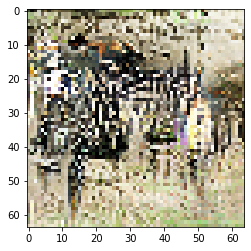

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 45

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 6.54880690574646 sec
Gen loss: 1.383725208598514, Disc loss: 1.485540815564089, Disc valid real loss: 0.5266982836778774, Disc valid fake loss: 0.5124698544657508, Disc class real loss: 0.07424979395677098, Disc class fake loss: 0.3721228818907294
Time for epoch 2 is 6.564271926879883 sec
Gen loss: 1.4227476785349291, Disc loss: 1.463316254144491, Disc valid real loss: 0.5248144376416539, Disc valid fake loss: 0.49516384944666264, Disc class real loss: 0.06989533423722266, Disc class fake loss: 0.37344263052177984
Time for epoch 3 is 6.569129228591919 sec
Gen loss: 1.41706501813822, Disc loss: 1.4656116414901823, Disc valid real loss: 0.5225203319690949, Disc valid fake loss: 0.49843949096840484, Disc class real loss: 0.06680446649565859, Disc class fake loss: 0.37784735065733277
Time for epoch 4 is 6.5741541385650635 sec
Gen loss: 1.4104574932608493,

Time for epoch 31 is 6.542628288269043 sec
Gen loss: 1.4373243686764738, Disc loss: 1.5044202555057615, Disc valid real loss: 0.5386258658281592, Disc valid fake loss: 0.5009511728272882, Disc class real loss: 0.07120390308798875, Disc class fake loss: 0.39363931197413177
Time for epoch 32 is 6.573904752731323 sec
Gen loss: 1.4259315431118011, Disc loss: 1.4712067114752392, Disc valid real loss: 0.5224365162294965, Disc valid fake loss: 0.4943209214265956, Disc class real loss: 0.06708461536110791, Disc class fake loss: 0.38736465491007926
Time for epoch 33 is 6.556059122085571 sec
Gen loss: 1.4095699343570443, Disc loss: 1.513957712192868, Disc valid real loss: 0.5275401407203009, Disc valid fake loss: 0.5010262504220009, Disc class real loss: 0.07913611698245933, Disc class fake loss: 0.4062552057033361
Time for epoch 34 is 6.558590650558472 sec
Gen loss: 1.4153411118097083, Disc loss: 1.479791557719541, Disc valid real loss: 0.5273008273784504, Disc valid fake loss: 0.49821990329858

Time for epoch 62 is 6.56680703163147 sec
Gen loss: 1.4084185652954633, Disc loss: 1.5121953820073328, Disc valid real loss: 0.5268520213836847, Disc valid fake loss: 0.5027685314416885, Disc class real loss: 0.07263982090774145, Disc class fake loss: 0.4099350076082141
Time for epoch 63 is 6.532901048660278 sec
Gen loss: 1.41373076341873, Disc loss: 1.47950336475705, Disc valid real loss: 0.5276846689886825, Disc valid fake loss: 0.495457865644333, Disc class real loss: 0.07004392218808535, Disc class fake loss: 0.38631691060267215
Time for epoch 64 is 6.575361490249634 sec
Gen loss: 1.4117547883543857, Disc loss: 1.505504807760549, Disc valid real loss: 0.526308362220609, Disc valid fake loss: 0.4998957029608793, Disc class real loss: 0.07567067741318931, Disc class fake loss: 0.403630061291678
Time for epoch 65 is 6.567453861236572 sec
Gen loss: 1.4296932580859163, Disc loss: 1.4570784263832623, Disc valid real loss: 0.5183242419084837, Disc valid fake loss: 0.4938858142772386, Disc

Time for epoch 93 is 6.559937238693237 sec
Gen loss: 1.4313446976417719, Disc loss: 1.4809742611508037, Disc valid real loss: 0.5132959441736688, Disc valid fake loss: 0.49765041782412417, Disc class real loss: 0.07168438041387776, Disc class fake loss: 0.39834351590726264
Time for epoch 94 is 6.5851194858551025 sec
Gen loss: 1.4049852712209834, Disc loss: 1.497130800818288, Disc valid real loss: 0.5373304215974586, Disc valid fake loss: 0.5012279875403227, Disc class real loss: 0.07466643235407942, Disc class fake loss: 0.3839059658781734
Time for epoch 95 is 6.581937789916992 sec
Gen loss: 1.419689848672512, Disc loss: 1.484172648468683, Disc valid real loss: 0.5307371768840524, Disc valid fake loss: 0.5059680938720703, Disc class real loss: 0.06716855233101997, Disc class fake loss: 0.3802988238112871
Time for epoch 96 is 6.578920841217041 sec
Gen loss: 1.4050621806189072, Disc loss: 1.444710617148599, Disc valid real loss: 0.5217849937982337, Disc valid fake loss: 0.497077304956524

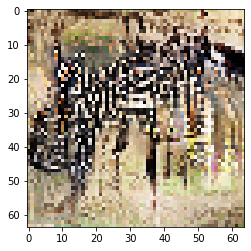

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 46

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 6.547560691833496 sec
Gen loss: 1.3922285125699154, Disc loss: 1.51028950061909, Disc valid real loss: 0.5346834916015004, Disc valid fake loss: 0.5044205391476321, Disc class real loss: 0.07204678727362608, Disc class fake loss: 0.3991386884780124
Time for epoch 2 is 6.5574049949646 sec
Gen loss: 1.39564169354217, Disc loss: 1.4536293121271355, Disc valid real loss: 0.529375470135101, Disc valid fake loss: 0.4991453314243361, Disc class real loss: 0.0674919601824936, Disc class fake loss: 0.3576165521300809
Time for epoch 3 is 6.6047117710113525 sec
Gen loss: 1.422967883043511, Disc loss: 1.4817573130130768, Disc valid real loss: 0.5279758272822513, Disc valid fake loss: 0.4983206950994425, Disc class real loss: 0.06888796983904011, Disc class fake loss: 0.3865728204593409
Time for epoch 4 is 6.570095777511597 sec
Gen loss: 1.4459729797618335, Disc l

Time for epoch 31 is 6.556687355041504 sec
Gen loss: 1.4246009712995484, Disc loss: 1.472602712553601, Disc valid real loss: 0.5179337212859199, Disc valid fake loss: 0.5009566323701725, Disc class real loss: 0.07121442768961019, Disc class fake loss: 0.3824979273472415
Time for epoch 32 is 6.562028646469116 sec
Gen loss: 1.4573807487654131, Disc loss: 1.4729775557684344, Disc valid real loss: 0.5130288784587106, Disc valid fake loss: 0.49388643354177475, Disc class real loss: 0.07198299011107274, Disc class fake loss: 0.39407925935851973
Time for epoch 33 is 6.582473993301392 sec
Gen loss: 1.416053399790165, Disc loss: 1.5134138402550719, Disc valid real loss: 0.5401982992540958, Disc valid fake loss: 0.5044475286159404, Disc class real loss: 0.07145852610458035, Disc class fake loss: 0.3973094875556092
Time for epoch 34 is 6.56106972694397 sec
Gen loss: 1.4031457956447158, Disc loss: 1.449026616853337, Disc valid real loss: 0.5246071621429088, Disc valid fake loss: 0.4984927697237147

Time for epoch 62 is 6.575853586196899 sec
Gen loss: 1.4036633982214817, Disc loss: 1.484746279064999, Disc valid real loss: 0.521254861077597, Disc valid fake loss: 0.5038389878910642, Disc class real loss: 0.0746904395894299, Disc class fake loss: 0.38496199102942336
Time for epoch 63 is 6.555664777755737 sec
Gen loss: 1.3973622543867243, Disc loss: 1.451849312283272, Disc valid real loss: 0.5301987414443216, Disc valid fake loss: 0.5033481264876765, Disc class real loss: 0.0617164752722263, Disc class fake loss: 0.35658596815584703
Time for epoch 64 is 6.569249391555786 sec
Gen loss: 1.3993564968885377, Disc loss: 1.4690832745197206, Disc valid real loss: 0.5279932375564131, Disc valid fake loss: 0.5087750308042349, Disc class real loss: 0.06358656184314641, Disc class fake loss: 0.36872844649262204
Time for epoch 65 is 6.547372341156006 sec
Gen loss: 1.4304834126039994, Disc loss: 1.461970598891724, Disc valid real loss: 0.5309841111302376, Disc valid fake loss: 0.4898976867282113,

Time for epoch 93 is 6.556151628494263 sec
Gen loss: 1.4002235483291536, Disc loss: 1.4877180051664973, Disc valid real loss: 0.5253475093564322, Disc valid fake loss: 0.5041401840226595, Disc class real loss: 0.06533636792487096, Disc class fake loss: 0.3928939385642839
Time for epoch 94 is 6.586395263671875 sec
Gen loss: 1.3864448028941487, Disc loss: 1.480933137411295, Disc valid real loss: 0.5249350275411162, Disc valid fake loss: 0.5030353372526724, Disc class real loss: 0.07110171457265266, Disc class fake loss: 0.38186105570301065
Time for epoch 95 is 6.554401636123657 sec
Gen loss: 1.379587238611177, Disc loss: 1.4817088748826537, Disc valid real loss: 0.5316509997775388, Disc valid fake loss: 0.5192416663779769, Disc class real loss: 0.06993766015850354, Disc class fake loss: 0.36087854319187096
Time for epoch 96 is 6.55812668800354 sec
Gen loss: 1.3854513854481454, Disc loss: 1.4764548373776814, Disc valid real loss: 0.5238700888531153, Disc valid fake loss: 0.506710075881592

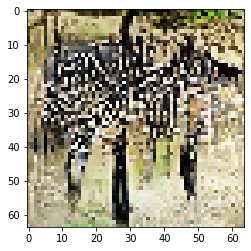

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 47

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 6.65211033821106 sec
Gen loss: 1.4004176085771516, Disc loss: 1.4736483713915183, Disc valid real loss: 0.526974689648595, Disc valid fake loss: 0.501121977560742, Disc class real loss: 0.06786135348036539, Disc class fake loss: 0.37769035271607165
Time for epoch 2 is 6.553550958633423 sec
Gen loss: 1.4210465051407037, Disc loss: 1.4893958724515384, Disc valid real loss: 0.5292685052683187, Disc valid fake loss: 0.49763544302347096, Disc class real loss: 0.07839692289518668, Disc class fake loss: 0.3840949951216232
Time for epoch 3 is 6.5675740242004395 sec
Gen loss: 1.4164993111477342, Disc loss: 1.4676075809916784, Disc valid real loss: 0.520236940751242, Disc valid fake loss: 0.4982674877310908, Disc class real loss: 0.06918544278393478, Disc class fake loss: 0.37991771491807563
Time for epoch 4 is 6.542722463607788 sec
Gen loss: 1.4452865581179775

Time for epoch 31 is 6.569654703140259 sec
Gen loss: 1.4246616245702255, Disc loss: 1.4745241608037505, Disc valid real loss: 0.5288835881754409, Disc valid fake loss: 0.5000224907037824, Disc class real loss: 0.06515463406144273, Disc class fake loss: 0.38046344976092494
Time for epoch 32 is 6.546676874160767 sec
Gen loss: 1.4136211407739063, Disc loss: 1.471677909410277, Disc valid real loss: 0.5181952616156533, Disc valid fake loss: 0.4953635548089826, Disc class real loss: 0.07489873925061506, Disc class fake loss: 0.3832203455615875
Time for epoch 33 is 6.543460130691528 sec
Gen loss: 1.4081534531920454, Disc loss: 1.4658618558977925, Disc valid real loss: 0.5295833638587664, Disc valid fake loss: 0.5038904005358386, Disc class real loss: 0.06881444758280765, Disc class fake loss: 0.36357364062826303
Time for epoch 34 is 6.548311948776245 sec
Gen loss: 1.4446095186610555, Disc loss: 1.450246579771818, Disc valid real loss: 0.5125995824156806, Disc valid fake loss: 0.49647770076990

Time for epoch 62 is 6.547729730606079 sec
Gen loss: 1.3987088390561038, Disc loss: 1.4741126718216164, Disc valid real loss: 0.5296613816605058, Disc valid fake loss: 0.504145254056121, Disc class real loss: 0.06850992389521453, Disc class fake loss: 0.3717961142835922
Time for epoch 63 is 6.5388031005859375 sec
Gen loss: 1.4103459591089293, Disc loss: 1.4619588006374449, Disc valid real loss: 0.5182003964518391, Disc valid fake loss: 0.4994929762080658, Disc class real loss: 0.06956360233287046, Disc class fake loss: 0.3747018206171518
Time for epoch 64 is 6.54668664932251 sec
Gen loss: 1.3975830854371536, Disc loss: 1.4930212917022927, Disc valid real loss: 0.5370695739984512, Disc valid fake loss: 0.5120805278420448, Disc class real loss: 0.07007517771752075, Disc class fake loss: 0.37379601615112884
Time for epoch 65 is 6.53295636177063 sec
Gen loss: 1.397058124459067, Disc loss: 1.4745157177365102, Disc valid real loss: 0.5293179301674976, Disc valid fake loss: 0.5034101681653843

Time for epoch 93 is 6.559781551361084 sec
Gen loss: 1.4077739438345267, Disc loss: 1.501883675885755, Disc valid real loss: 0.5333768151873766, Disc valid fake loss: 0.5052255397272665, Disc class real loss: 0.07312570864789535, Disc class fake loss: 0.3901556043257547
Time for epoch 94 is 6.5657336711883545 sec
Gen loss: 1.4323802521062452, Disc loss: 1.4663832963899124, Disc valid real loss: 0.523310900774113, Disc valid fake loss: 0.5003337191287861, Disc class real loss: 0.07283511867226902, Disc class fake loss: 0.3699035567426404
Time for epoch 95 is 6.5332183837890625 sec
Gen loss: 1.4424126695754915, Disc loss: 1.5071218419213628, Disc valid real loss: 0.5355221221959868, Disc valid fake loss: 0.5033808333236117, Disc class real loss: 0.0773807303427697, Disc class fake loss: 0.39083815240409486
Time for epoch 96 is 6.565986394882202 sec
Gen loss: 1.3946161464203235, Disc loss: 1.4664900420710099, Disc valid real loss: 0.5199959252116292, Disc valid fake loss: 0.50027136348707

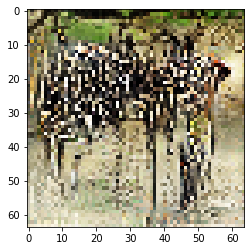

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 48

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 6.503582239151001 sec
Gen loss: 1.415838894455932, Disc loss: 1.4841880514178165, Disc valid real loss: 0.5237790259510972, Disc valid fake loss: 0.5026939596201099, Disc class real loss: 0.06542690423165642, Disc class fake loss: 0.3922881737438052
Time for epoch 2 is 6.5134992599487305 sec
Gen loss: 1.4019771169784456, Disc loss: 1.4542009282943815, Disc valid real loss: 0.5266792491771454, Disc valid fake loss: 0.5058550223015076, Disc class real loss: 0.06355559505619715, Disc class fake loss: 0.35811106141570004
Time for epoch 3 is 6.50462794303894 sec
Gen loss: 1.3813669667687527, Disc loss: 1.4529205768607383, Disc valid real loss: 0.5307751420971959, Disc valid fake loss: 0.5034825583530027, Disc class real loss: 0.06619896042447668, Disc class fake loss: 0.3524639155759021
Time for epoch 4 is 6.68917441368103 sec
Gen loss: 1.4250965506531472,

Time for epoch 31 is 6.5601966381073 sec
Gen loss: 1.4341106969256734, Disc loss: 1.4785782500754956, Disc valid real loss: 0.5204170791562214, Disc valid fake loss: 0.5018500914407331, Disc class real loss: 0.07038666589218083, Disc class fake loss: 0.38592442060106025
Time for epoch 32 is 6.47832989692688 sec
Gen loss: 1.4161224885042323, Disc loss: 1.4896429042483486, Disc valid real loss: 0.5220230109123296, Disc valid fake loss: 0.49870293812696326, Disc class real loss: 0.07306934523038826, Disc class fake loss: 0.39584761017630266
Time for epoch 33 is 6.516695976257324 sec
Gen loss: 1.390788110882737, Disc loss: 1.488858579896217, Disc valid real loss: 0.5313815956198892, Disc valid fake loss: 0.508170047125151, Disc class real loss: 0.06799950192649958, Disc class fake loss: 0.38130744615959566
Time for epoch 34 is 6.474802732467651 sec
Gen loss: 1.433076435050299, Disc loss: 1.4791718853074451, Disc valid real loss: 0.5258929136880609, Disc valid fake loss: 0.4971430003643036,

Time for epoch 62 is 6.5475380420684814 sec
Gen loss: 1.426083078218061, Disc loss: 1.474586634095325, Disc valid real loss: 0.5341731211127236, Disc valid fake loss: 0.501080450970073, Disc class real loss: 0.07242763780198212, Disc class fake loss: 0.3669054240508135
Time for epoch 63 is 6.51209282875061 sec
Gen loss: 1.3965304729550383, Disc loss: 1.471122537934503, Disc valid real loss: 0.5278821811079979, Disc valid fake loss: 0.49703178537446396, Disc class real loss: 0.06931949489165184, Disc class fake loss: 0.37688908223495926
Time for epoch 64 is 6.567409515380859 sec
Gen loss: 1.4310615450836892, Disc loss: 1.4648441679255908, Disc valid real loss: 0.5157814848908159, Disc valid fake loss: 0.5017778519974199, Disc class real loss: 0.07122360376727789, Disc class fake loss: 0.37606122912189294
Time for epoch 65 is 6.546536445617676 sec
Gen loss: 1.412808204113051, Disc loss: 1.459318576857101, Disc valid real loss: 0.5252573945841124, Disc valid fake loss: 0.5019840336469716,

Time for epoch 93 is 6.54728364944458 sec
Gen loss: 1.3913842855497849, Disc loss: 1.4731589780990468, Disc valid real loss: 0.5290878985163777, Disc valid fake loss: 0.5123300820935605, Disc class real loss: 0.06736907115216952, Disc class fake loss: 0.3643719272817983
Time for epoch 94 is 6.5468785762786865 sec
Gen loss: 1.4092042979805968, Disc loss: 1.473873382044393, Disc valid real loss: 0.5209000874743905, Disc valid fake loss: 0.49525993819846664, Disc class real loss: 0.07524847249002305, Disc class fake loss: 0.38246488527849665
Time for epoch 95 is 6.536959171295166 sec
Gen loss: 1.4067735214566075, Disc loss: 1.493922881262247, Disc valid real loss: 0.5320193343037782, Disc valid fake loss: 0.5143396681131318, Disc class real loss: 0.06552785910871746, Disc class fake loss: 0.3820360177738029
Time for epoch 96 is 6.571653366088867 sec
Gen loss: 1.4083945515543916, Disc loss: 1.4851332175177197, Disc valid real loss: 0.525661512169727, Disc valid fake loss: 0.495074336785216

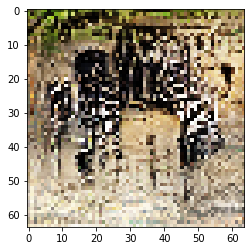

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 49

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 6.504755735397339 sec
Gen loss: 1.3787383250025815, Disc loss: 1.4766215945399084, Disc valid real loss: 0.5310254105648329, Disc valid fake loss: 0.5098970648507739, Disc class real loss: 0.06543744738257035, Disc class fake loss: 0.37026167582980424
Time for epoch 2 is 6.518296003341675 sec
Gen loss: 1.4197787902382917, Disc loss: 1.5043276430562484, Disc valid real loss: 0.5389600969677748, Disc valid fake loss: 0.5032038664401963, Disc class real loss: 0.06568836503077385, Disc class fake loss: 0.39647531375115697
Time for epoch 3 is 6.608667373657227 sec
Gen loss: 1.3785079821597699, Disc loss: 1.492994534414868, Disc valid real loss: 0.5282543876836466, Disc valid fake loss: 0.5038079040688138, Disc class real loss: 0.06907655584333508, Disc class fake loss: 0.39185568153165107
Time for epoch 4 is 6.591327428817749 sec
Gen loss: 1.39104914803837

Time for epoch 31 is 6.566127300262451 sec
Gen loss: 1.4381353778894557, Disc loss: 1.4831643347130266, Disc valid real loss: 0.5266522472334463, Disc valid fake loss: 0.5016140826912814, Disc class real loss: 0.06848952269755564, Disc class fake loss: 0.38640847923450694
Time for epoch 32 is 6.596360206604004 sec
Gen loss: 1.4065476940121762, Disc loss: 1.4733301210542058, Disc valid real loss: 0.5282823576830155, Disc valid fake loss: 0.49829805815635725, Disc class real loss: 0.07024166240021153, Disc class fake loss: 0.37650803771129876
Time for epoch 33 is 6.558841943740845 sec
Gen loss: 1.4224142986674642, Disc loss: 1.452999509351198, Disc valid real loss: 0.5276748692226965, Disc valid fake loss: 0.49766163666581, Disc class real loss: 0.05961459590295373, Disc class fake loss: 0.36804841159907886
Time for epoch 34 is 6.560381174087524 sec
Gen loss: 1.4161231060360753, Disc loss: 1.4367511303618896, Disc valid real loss: 0.5246595033379489, Disc valid fake loss: 0.4923131051798

Time for epoch 62 is 6.55630350112915 sec
Gen loss: 1.3734962780808293, Disc loss: 1.49910314277161, Disc valid real loss: 0.5362470491334449, Disc valid fake loss: 0.504610804797605, Disc class real loss: 0.07281605089164533, Disc class fake loss: 0.3854292429723712
Time for epoch 63 is 6.534257411956787 sec
Gen loss: 1.4246661815532418, Disc loss: 1.4722749175027359, Disc valid real loss: 0.5211255595434544, Disc valid fake loss: 0.4972561055491137, Disc class real loss: 0.0676632484551086, Disc class fake loss: 0.3862300157806901
Time for epoch 64 is 6.547597169876099 sec
Gen loss: 1.4281708196152088, Disc loss: 1.483649801376254, Disc valid real loss: 0.5265678103233493, Disc valid fake loss: 0.5007761919567751, Disc class real loss: 0.06845077678025159, Disc class fake loss: 0.38785502110976117
Time for epoch 65 is 6.5656914710998535 sec
Gen loss: 1.3748682245265607, Disc loss: 1.4648905424184577, Disc valid real loss: 0.5269474288405374, Disc valid fake loss: 0.5074931993040928, 

Time for epoch 93 is 6.5631163120269775 sec
Gen loss: 1.4051477375418642, Disc loss: 1.479287875946178, Disc valid real loss: 0.5292077249912328, Disc valid fake loss: 0.5058201716043228, Disc class real loss: 0.06884508842580714, Disc class fake loss: 0.37541489025881125
Time for epoch 94 is 6.554426193237305 sec
Gen loss: 1.4577856361865997, Disc loss: 1.4712010074493498, Disc valid real loss: 0.5210128272342127, Disc valid fake loss: 0.484161744630614, Disc class real loss: 0.07584807460012218, Disc class fake loss: 0.39017835536668466
Time for epoch 95 is 6.55398416519165 sec
Gen loss: 1.3677689668744109, Disc loss: 1.5085396621116371, Disc valid real loss: 0.5396609176383462, Disc valid fake loss: 0.5106842959689539, Disc class real loss: 0.07109747529246432, Disc class fake loss: 0.3870969689126278
Time for epoch 96 is 6.537293195724487 sec
Gen loss: 1.401272973348928, Disc loss: 1.4862081879793212, Disc valid real loss: 0.52393096824025, Disc valid fake loss: 0.5036717523322549,

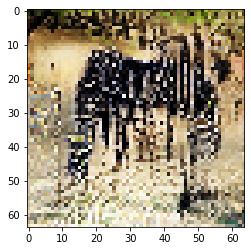

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 50

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 6.496485471725464 sec
Gen loss: 1.404321213794309, Disc loss: 1.466768246750499, Disc valid real loss: 0.5247790887951851, Disc valid fake loss: 0.5065797579496406, Disc class real loss: 0.062272603937619644, Disc class fake loss: 0.3731367899927982
Time for epoch 2 is 6.514641284942627 sec
Gen loss: 1.4453203102876975, Disc loss: 1.4825832497241884, Disc valid real loss: 0.5283199006388354, Disc valid fake loss: 0.5024381058160649, Disc class real loss: 0.06819458957084693, Disc class fake loss: 0.3836306570920833
Time for epoch 3 is 6.516830682754517 sec
Gen loss: 1.3710586740527042, Disc loss: 1.4902847443902216, Disc valid real loss: 0.534097416629625, Disc valid fake loss: 0.4952680692076683, Disc class real loss: 0.0772378662354746, Disc class fake loss: 0.3836813907810422
Time for epoch 4 is 6.534416198730469 sec
Gen loss: 1.4098309798296107, D

Time for epoch 31 is 6.512782335281372 sec
Gen loss: 1.3862345204796902, Disc loss: 1.5047457135000895, Disc valid real loss: 0.5382638143938642, Disc valid fake loss: 0.5132638935086339, Disc class real loss: 0.06711689012969822, Disc class fake loss: 0.3861011089540498
Time for epoch 32 is 6.530181407928467 sec
Gen loss: 1.4656621404858523, Disc loss: 1.460112338495809, Disc valid real loss: 0.5205995119934859, Disc valid fake loss: 0.488704948057962, Disc class real loss: 0.0714319383530596, Disc class fake loss: 0.37937594378410383
Time for epoch 33 is 6.5372724533081055 sec
Gen loss: 1.388271867535835, Disc loss: 1.4701262885747954, Disc valid real loss: 0.5352999545460524, Disc valid fake loss: 0.5070847718175068, Disc class real loss: 0.06901950713756039, Disc class fake loss: 0.35872205866630685
Time for epoch 34 is 6.5288474559783936 sec
Gen loss: 1.4078785271145577, Disc loss: 1.4692382958046226, Disc valid real loss: 0.5226242616772652, Disc valid fake loss: 0.49934110080086

Time for epoch 62 is 6.557013988494873 sec
Gen loss: 1.392104026536609, Disc loss: 1.4855698918880418, Disc valid real loss: 0.529781465786834, Disc valid fake loss: 0.5041423722408539, Disc class real loss: 0.0678769330992255, Disc class fake loss: 0.38376911818374726
Time for epoch 63 is 6.53677773475647 sec
Gen loss: 1.4186292900595554, Disc loss: 1.4972871188507524, Disc valid real loss: 0.5269411741647609, Disc valid fake loss: 0.49623351058987686, Disc class real loss: 0.07994864052730115, Disc class fake loss: 0.3941637958551562
Time for epoch 64 is 6.559534788131714 sec
Gen loss: 1.4100053781686828, Disc loss: 1.5036283852749093, Disc valid real loss: 0.5302097206545431, Disc valid fake loss: 0.495880109972732, Disc class real loss: 0.0692064470264974, Disc class fake loss: 0.4083321019140787
Time for epoch 65 is 6.564089298248291 sec
Gen loss: 1.400357924921568, Disc loss: 1.4711514004441195, Disc valid real loss: 0.5191462019155192, Disc valid fake loss: 0.5036822508933932, D

Time for epoch 93 is 6.551178216934204 sec
Gen loss: 1.3811781607394995, Disc loss: 1.4967193877281144, Disc valid real loss: 0.5314345143215601, Disc valid fake loss: 0.5056216287058454, Disc class real loss: 0.07093439392507249, Disc class fake loss: 0.3887288534017496
Time for epoch 94 is 6.545634984970093 sec
Gen loss: 1.4118925215199936, Disc loss: 1.466910755565, Disc valid real loss: 0.5235157861959102, Disc valid fake loss: 0.4968219505146492, Disc class real loss: 0.07434452246863742, Disc class fake loss: 0.37222850374704186
Time for epoch 95 is 6.558334112167358 sec
Gen loss: 1.3867610595947089, Disc loss: 1.5095108089058897, Disc valid real loss: 0.536058267881704, Disc valid fake loss: 0.5106238559928051, Disc class real loss: 0.07249774277578433, Disc class fake loss: 0.3903309458780081
Time for epoch 96 is 6.504113435745239 sec
Gen loss: 1.4164209719314131, Disc loss: 1.4470628541569377, Disc valid real loss: 0.5229293456257775, Disc valid fake loss: 0.4991501292517019, 

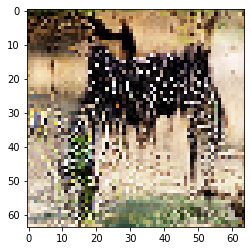

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 51

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 6.495386600494385 sec
Gen loss: 1.405066772948864, Disc loss: 1.4963245079960934, Disc valid real loss: 0.5307407368754231, Disc valid fake loss: 0.5093543422083522, Disc class real loss: 0.07810184063097506, Disc class fake loss: 0.37812758514354394
Time for epoch 2 is 6.506544351577759 sec
Gen loss: 1.4393565155739008, Disc loss: 1.4760033370450485, Disc valid real loss: 0.5287552020230959, Disc valid fake loss: 0.4891812667943711, Disc class real loss: 0.06440332164408552, Disc class fake loss: 0.39366354394790737
Time for epoch 3 is 6.497731924057007 sec
Gen loss: 1.4029336904370509, Disc loss: 1.448190458292185, Disc valid real loss: 0.5244396907645602, Disc valid fake loss: 0.505755232863648, Disc class real loss: 0.06799263087626503, Disc class fake loss: 0.3500029069999623
Time for epoch 4 is 6.502748012542725 sec
Gen loss: 1.4326474146787511,

Time for epoch 31 is 6.906989574432373 sec
Gen loss: 1.3835140716197878, Disc loss: 1.489715667658074, Disc valid real loss: 0.539458270682845, Disc valid fake loss: 0.5109977360035098, Disc class real loss: 0.06764387222126039, Disc class fake loss: 0.3716157854123171
Time for epoch 32 is 6.641635417938232 sec
Gen loss: 1.413301664729451, Disc loss: 1.4458587866189867, Disc valid real loss: 0.5207797784444897, Disc valid fake loss: 0.4876135010705438, Disc class real loss: 0.0708219819312352, Disc class fake loss: 0.3666435195956119
Time for epoch 33 is 6.649683237075806 sec
Gen loss: 1.4031546829744828, Disc loss: 1.4944634039041609, Disc valid real loss: 0.5348798029644545, Disc valid fake loss: 0.5044887304999107, Disc class real loss: 0.06872115682859277, Disc class fake loss: 0.3863737199802038
Time for epoch 34 is 6.8413543701171875 sec
Gen loss: 1.4323153814604117, Disc loss: 1.4512722790241241, Disc valid real loss: 0.5166012535608092, Disc valid fake loss: 0.4968434716033381,

Time for epoch 62 is 6.6148762702941895 sec
Gen loss: 1.4056895922782808, Disc loss: 1.4394539424846338, Disc valid real loss: 0.5293226247263509, Disc valid fake loss: 0.5018729368268058, Disc class real loss: 0.06880934111135037, Disc class fake loss: 0.3394490363033012
Time for epoch 63 is 6.5540688037872314 sec
Gen loss: 1.420546560786491, Disc loss: 1.4559130446855413, Disc valid real loss: 0.5274089136442472, Disc valid fake loss: 0.4920825606515241, Disc class real loss: 0.061170023902546784, Disc class fake loss: 0.3752515389432394
Time for epoch 64 is 6.572003602981567 sec
Gen loss: 1.4006096374156862, Disc loss: 1.4683162722476693, Disc valid real loss: 0.5310135029776152, Disc valid fake loss: 0.5041344335605932, Disc class real loss: 0.06379646434838515, Disc class fake loss: 0.36937187646710595
Time for epoch 65 is 6.525617361068726 sec
Gen loss: 1.3961371425972429, Disc loss: 1.4598016572553059, Disc valid real loss: 0.5201386417760405, Disc valid fake loss: 0.50685387971

Time for epoch 93 is 6.6497483253479 sec
Gen loss: 1.4167388476604639, Disc loss: 1.4766967140657956, Disc valid real loss: 0.5336875189528909, Disc valid fake loss: 0.5058280312737753, Disc class real loss: 0.06168314086701071, Disc class fake loss: 0.3754980291651432
Time for epoch 94 is 6.576435327529907 sec
Gen loss: 1.4126904343449793, Disc loss: 1.4468250978131627, Disc valid real loss: 0.5178297815281291, Disc valid fake loss: 0.4945653983673384, Disc class real loss: 0.06923739113141024, Disc class fake loss: 0.36519252578186434
Time for epoch 95 is 6.571064710617065 sec
Gen loss: 1.399347188167794, Disc loss: 1.4585564386012941, Disc valid real loss: 0.5314806095042894, Disc valid fake loss: 0.5012591427495313, Disc class real loss: 0.06642331853156996, Disc class fake loss: 0.3593933658111234
Time for epoch 96 is 6.560290575027466 sec
Gen loss: 1.4457895138929056, Disc loss: 1.5054299197224683, Disc valid real loss: 0.5250504753270815, Disc valid fake loss: 0.4975977018475532

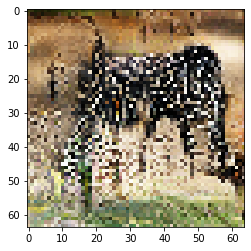

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 52

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 6.527356863021851 sec
Gen loss: 1.391836679259012, Disc loss: 1.4678286487279937, Disc valid real loss: 0.5314352460378824, Disc valid fake loss: 0.506079571364924, Disc class real loss: 0.06585910354421452, Disc class fake loss: 0.3644547257788999
Time for epoch 2 is 6.523163795471191 sec
Gen loss: 1.428139365689699, Disc loss: 1.4708690560141275, Disc valid real loss: 0.5341540658196737, Disc valid fake loss: 0.49692385938278466, Disc class real loss: 0.06353310220956065, Disc class fake loss: 0.3762580294941747
Time for epoch 3 is 6.559359788894653 sec
Gen loss: 1.3956373971562053, Disc loss: 1.4343222996523215, Disc valid real loss: 0.520048665272635, Disc valid fake loss: 0.496727786091871, Disc class real loss: 0.06190142305405421, Disc class fake loss: 0.35564442646018296
Time for epoch 4 is 6.599815607070923 sec
Gen loss: 1.4027056118776633, D

Time for epoch 31 is 6.552520990371704 sec
Gen loss: 1.4374442398548126, Disc loss: 1.4804128713386004, Disc valid real loss: 0.5205783083341843, Disc valid fake loss: 0.5095127169475999, Disc class real loss: 0.06983932724958936, Disc class fake loss: 0.380482517052875
Time for epoch 32 is 6.54944372177124 sec
Gen loss: 1.4174707136874976, Disc loss: 1.474303173464398, Disc valid real loss: 0.5244002236529838, Disc valid fake loss: 0.4957638987621596, Disc class real loss: 0.06737832270080743, Disc class fake loss: 0.386760723798774
Time for epoch 33 is 6.568172454833984 sec
Gen loss: 1.4060413664163545, Disc loss: 1.4848058816305427, Disc valid real loss: 0.5301507957452951, Disc valid fake loss: 0.5070733920086262, Disc class real loss: 0.07131606721600821, Disc class fake loss: 0.37626562445142936
Time for epoch 34 is 6.566959857940674 sec
Gen loss: 1.3939640778441762, Disc loss: 1.4652537318856218, Disc valid real loss: 0.5264696752609208, Disc valid fake loss: 0.5082225449556528,

Time for epoch 62 is 6.585371255874634 sec
Gen loss: 1.386879489865414, Disc loss: 1.5174338581950166, Disc valid real loss: 0.5302491797957309, Disc valid fake loss: 0.5104978465756704, Disc class real loss: 0.07578388389015873, Disc class fake loss: 0.4009029469344505
Time for epoch 63 is 6.544253349304199 sec
Gen loss: 1.4162690341472626, Disc loss: 1.4635459080685016, Disc valid real loss: 0.5268013208757999, Disc valid fake loss: 0.49386039358931916, Disc class real loss: 0.0710210329094945, Disc class fake loss: 0.3718631578999203
Time for epoch 64 is 6.560691595077515 sec
Gen loss: 1.3815452151520307, Disc loss: 1.4565657612889311, Disc valid real loss: 0.5384746990924658, Disc valid fake loss: 0.51484644257052, Disc class real loss: 0.059400791295555005, Disc class fake loss: 0.34384383079270986
Time for epoch 65 is 6.5355141162872314 sec
Gen loss: 1.3892877150413603, Disc loss: 1.4749623994494594, Disc valid real loss: 0.5216117461406907, Disc valid fake loss: 0.50467066310865

Time for epoch 93 is 6.573051691055298 sec
Gen loss: 1.3814797789551492, Disc loss: 1.4760349829529607, Disc valid real loss: 0.5368775349370268, Disc valid fake loss: 0.5082527005741763, Disc class real loss: 0.06952164301156001, Disc class fake loss: 0.36138310396047524
Time for epoch 94 is 6.546645641326904 sec
Gen loss: 1.4082835947358332, Disc loss: 1.4453028572160145, Disc valid real loss: 0.5236933981609899, Disc valid fake loss: 0.5037324192912079, Disc class real loss: 0.06433180428034257, Disc class fake loss: 0.3535452336072922
Time for epoch 95 is 6.546041250228882 sec
Gen loss: 1.4065905282663744, Disc loss: 1.4787068633839142, Disc valid real loss: 0.5293100438145704, Disc valid fake loss: 0.5040863463005354, Disc class real loss: 0.06378248655562137, Disc class fake loss: 0.38152798198076876
Time for epoch 96 is 6.559335708618164 sec
Gen loss: 1.3987949435101, Disc loss: 1.4701619390831437, Disc valid real loss: 0.5183778848758963, Disc valid fake loss: 0.509853751506916

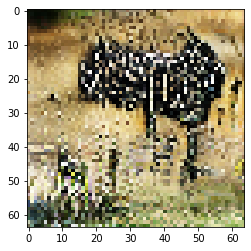

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 53

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 6.562323093414307 sec
Gen loss: 1.4110017897084701, Disc loss: 1.507692334956901, Disc valid real loss: 0.5273363157067188, Disc valid fake loss: 0.5067446940513545, Disc class real loss: 0.07757600883379319, Disc class fake loss: 0.39603531035746253
Time for epoch 2 is 6.586648941040039 sec
Gen loss: 1.412372230790382, Disc loss: 1.4821214128372282, Disc valid real loss: 0.5308143655921138, Disc valid fake loss: 0.5028360506822896, Disc class real loss: 0.0644007037924386, Disc class fake loss: 0.3840702906424223
Time for epoch 3 is 6.571267366409302 sec
Gen loss: 1.3955663553504056, Disc loss: 1.4584777542324954, Disc valid real loss: 0.5265284471733626, Disc valid fake loss: 0.5010089960902236, Disc class real loss: 0.07011037215666283, Disc class fake loss: 0.3608299376399711
Time for epoch 4 is 6.559014081954956 sec
Gen loss: 1.4197968196037203, 

Time for epoch 31 is 6.578725099563599 sec
Gen loss: 1.4187052845954895, Disc loss: 1.4531386189682538, Disc valid real loss: 0.5305596564051717, Disc valid fake loss: 0.499663510468117, Disc class real loss: 0.06901673790064727, Disc class fake loss: 0.3538987118057733
Time for epoch 32 is 6.579815149307251 sec
Gen loss: 1.4106153721033141, Disc loss: 1.4657427592332972, Disc valid real loss: 0.524296926031279, Disc valid fake loss: 0.5007926057590995, Disc class real loss: 0.06349577045414684, Disc class fake loss: 0.37715745660974537
Time for epoch 33 is 6.569267749786377 sec
Gen loss: 1.4397776078346163, Disc loss: 1.466886707170065, Disc valid real loss: 0.527443565428257, Disc valid fake loss: 0.49929994050153464, Disc class real loss: 0.06620287276847764, Disc class fake loss: 0.3739403312982515
Time for epoch 34 is 6.5880773067474365 sec
Gen loss: 1.4271034840927568, Disc loss: 1.484376965567123, Disc valid real loss: 0.524534750296626, Disc valid fake loss: 0.4946192636392837,

Time for epoch 62 is 6.581155776977539 sec
Gen loss: 1.3924270535624304, Disc loss: 1.5159986892411874, Disc valid real loss: 0.536505752351395, Disc valid fake loss: 0.513732721119426, Disc class real loss: 0.06816197566005813, Disc class fake loss: 0.3975982388784719
Time for epoch 63 is 6.584151268005371 sec
Gen loss: 1.4077412853407305, Disc loss: 1.4626079291798348, Disc valid real loss: 0.5247685720407685, Disc valid fake loss: 0.5020598051852958, Disc class real loss: 0.06727913988694592, Disc class fake loss: 0.3685004116620782
Time for epoch 64 is 6.557068347930908 sec
Gen loss: 1.403876050960186, Disc loss: 1.4703746746445812, Disc valid real loss: 0.5261793077685112, Disc valid fake loss: 0.5050108308015868, Disc class real loss: 0.06840343460938784, Disc class fake loss: 0.3707810930994361
Time for epoch 65 is 6.5810840129852295 sec
Gen loss: 1.404055631437967, Disc loss: 1.433131486523983, Disc valid real loss: 0.5220828846443532, Disc valid fake loss: 0.49973049222729926,

Time for epoch 93 is 6.580501079559326 sec
Gen loss: 1.4085028434908666, Disc loss: 1.486874295528545, Disc valid real loss: 0.5407726851313613, Disc valid fake loss: 0.5010523673060329, Disc class real loss: 0.06460233369766366, Disc class fake loss: 0.38044690912546114
Time for epoch 94 is 6.580304145812988 sec
Gen loss: 1.3965579347555028, Disc loss: 1.454582931690438, Disc valid real loss: 0.5214217575483544, Disc valid fake loss: 0.5067362769745117, Disc class real loss: 0.06546280076618978, Disc class fake loss: 0.3609620949556661
Time for epoch 95 is 6.578599452972412 sec
Gen loss: 1.4352120410564333, Disc loss: 1.5127098719741023, Disc valid real loss: 0.5280777654329012, Disc valid fake loss: 0.5079061758033064, Disc class real loss: 0.07489706259924746, Disc class fake loss: 0.4018288733610927
Time for epoch 96 is 6.5790932178497314 sec
Gen loss: 1.385816517264344, Disc loss: 1.448056823292444, Disc valid real loss: 0.5234669914772344, Disc valid fake loss: 0.5018102207849192

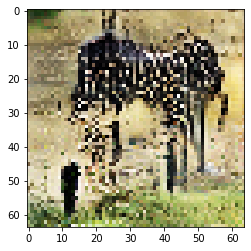

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 54

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 6.578285455703735 sec
Gen loss: 1.4133417523184488, Disc loss: 1.4992581179668738, Disc valid real loss: 0.5236396226425504, Disc valid fake loss: 0.5058197559312333, Disc class real loss: 0.07226955151959691, Disc class fake loss: 0.39752918698413425
Time for epoch 2 is 6.568136930465698 sec
Gen loss: 1.4392105042934418, Disc loss: 1.492908674963685, Disc valid real loss: 0.5214272730572279, Disc valid fake loss: 0.5084322278582772, Disc class real loss: 0.061972854266398, Disc class fake loss: 0.40107631466762966
Time for epoch 3 is 6.5630364418029785 sec
Gen loss: 1.3751949290203493, Disc loss: 1.477193793585134, Disc valid real loss: 0.5311285068475923, Disc valid fake loss: 0.5050564872664075, Disc class real loss: 0.06827696984590487, Disc class fake loss: 0.3727318263764298
Time for epoch 4 is 6.549524545669556 sec
Gen loss: 1.3786078642967134,

Time for epoch 31 is 6.60450291633606 sec
Gen loss: 1.387371655120406, Disc loss: 1.466140666326811, Disc valid real loss: 0.5275433221182158, Disc valid fake loss: 0.5125651550154353, Disc class real loss: 0.06401097362720255, Disc class fake loss: 0.3620212150867595
Time for epoch 32 is 6.5944952964782715 sec
Gen loss: 1.4158348856970322, Disc loss: 1.464789512892102, Disc valid real loss: 0.5280948478815167, Disc valid fake loss: 0.4983104942149894, Disc class real loss: 0.06469915739834568, Disc class fake loss: 0.37368501146692173
Time for epoch 33 is 6.559344530105591 sec
Gen loss: 1.4194084849468498, Disc loss: 1.5016598181669103, Disc valid real loss: 0.5325839483114176, Disc valid fake loss: 0.5031442479338757, Disc class real loss: 0.07422704945946502, Disc class fake loss: 0.3917045705886774
Time for epoch 34 is 6.544162273406982 sec
Gen loss: 1.381100662918978, Disc loss: 1.47910474968511, Disc valid real loss: 0.5293928883796515, Disc valid fake loss: 0.501314229050348, Di

Time for epoch 62 is 6.6174328327178955 sec
Gen loss: 1.3907044772491899, Disc loss: 1.4923150934452234, Disc valid real loss: 0.5407570520805758, Disc valid fake loss: 0.5054394199058067, Disc class real loss: 0.07206963638634269, Disc class fake loss: 0.37404898939610914
Time for epoch 63 is 6.574139595031738 sec
Gen loss: 1.402889481117559, Disc loss: 1.482260682555132, Disc valid real loss: 0.5331035518022471, Disc valid fake loss: 0.5012799998702004, Disc class real loss: 0.07517160156465591, Disc class fake loss: 0.37270553249779137
Time for epoch 64 is 6.586055755615234 sec
Gen loss: 1.3877500475839126, Disc loss: 1.4831846439561178, Disc valid real loss: 0.5258349715623745, Disc valid fake loss: 0.5053986950322639, Disc class real loss: 0.06920310004809221, Disc class fake loss: 0.3827478766961153
Time for epoch 65 is 6.5816943645477295 sec
Gen loss: 1.39948697422826, Disc loss: 1.4748579911714377, Disc valid real loss: 0.5261827561744424, Disc valid fake loss: 0.49856587741957

Time for epoch 93 is 6.563688278198242 sec
Gen loss: 1.40767278782157, Disc loss: 1.4880188824825509, Disc valid real loss: 0.526372340529464, Disc valid fake loss: 0.5082940072860829, Disc class real loss: 0.07106091557503787, Disc class fake loss: 0.38229161275680673
Time for epoch 94 is 6.560635805130005 sec
Gen loss: 1.4343145080777102, Disc loss: 1.437097580280415, Disc valid real loss: 0.5187820395411447, Disc valid fake loss: 0.49573952392783277, Disc class real loss: 0.06495880836425999, Disc class fake loss: 0.35761721241612765
Time for epoch 95 is 6.57131290435791 sec
Gen loss: 1.4114701779082763, Disc loss: 1.4928652789703636, Disc valid real loss: 0.5316477140714956, Disc valid fake loss: 0.5007057950593704, Disc class real loss: 0.07244722234074373, Disc class fake loss: 0.3880645535713018
Time for epoch 96 is 6.568259954452515 sec
Gen loss: 1.4306387942890788, Disc loss: 1.467990648607875, Disc valid real loss: 0.5219611899797306, Disc valid fake loss: 0.5028581439062606,

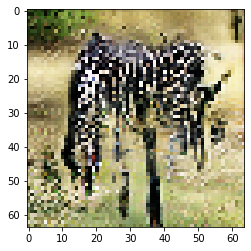

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 55

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 6.541351079940796 sec
Gen loss: 1.3925144942693932, Disc loss: 1.4959042384180912, Disc valid real loss: 0.5345135611850161, Disc valid fake loss: 0.509060321678949, Disc class real loss: 0.06715224403211154, Disc class fake loss: 0.38517810603560404
Time for epoch 2 is 6.562790393829346 sec
Gen loss: 1.4237414667772692, Disc loss: 1.4747541623060094, Disc valid real loss: 0.5304532995404199, Disc valid fake loss: 0.500589131269344, Disc class real loss: 0.06467174501212444, Disc class fake loss: 0.3790399913871011
Time for epoch 3 is 6.554685115814209 sec
Gen loss: 1.408575645712919, Disc loss: 1.470199392285458, Disc valid real loss: 0.5231472536228424, Disc valid fake loss: 0.5040057615138763, Disc class real loss: 0.06938632483983975, Disc class fake loss: 0.37366005596379903
Time for epoch 4 is 6.5523459911346436 sec
Gen loss: 1.415684383275897, 

Time for epoch 31 is 6.53337550163269 sec
Gen loss: 1.4131273675796598, Disc loss: 1.5062888888425605, Disc valid real loss: 0.5366272453305333, Disc valid fake loss: 0.5126142789458119, Disc class real loss: 0.0708232844995638, Disc class fake loss: 0.38622407719146373
Time for epoch 32 is 6.557905912399292 sec
Gen loss: 1.4050304993640546, Disc loss: 1.4486044835905696, Disc valid real loss: 0.5160015688039535, Disc valid fake loss: 0.4956499343348104, Disc class real loss: 0.062154958128853334, Disc class fake loss: 0.37479801631944126
Time for epoch 33 is 6.563876152038574 sec
Gen loss: 1.4265652680119802, Disc loss: 1.478659877250361, Disc valid real loss: 0.5257853976515836, Disc valid fake loss: 0.5064622926157575, Disc class real loss: 0.06882273670838236, Disc class fake loss: 0.3775894503693941
Time for epoch 34 is 6.564182996749878 sec
Gen loss: 1.397286981344223, Disc loss: 1.4736863769764124, Disc valid real loss: 0.5248931381244992, Disc valid fake loss: 0.498965283119401

Time for epoch 62 is 6.5561301708221436 sec
Gen loss: 1.4198111552138661, Disc loss: 1.4810804211816122, Disc valid real loss: 0.5320756861636805, Disc valid fake loss: 0.5049912652304006, Disc class real loss: 0.06980358665067227, Disc class fake loss: 0.37420987963763086
Time for epoch 63 is 6.546524524688721 sec
Gen loss: 1.4029757491377897, Disc loss: 1.4492907759755156, Disc valid real loss: 0.5198538320702176, Disc valid fake loss: 0.49748878960692605, Disc class real loss: 0.06284372489303784, Disc class fake loss: 0.36910443137898
Time for epoch 64 is 6.556561231613159 sec
Gen loss: 1.404531795618146, Disc loss: 1.4656017783076265, Disc valid real loss: 0.5288799347919088, Disc valid fake loss: 0.5078720358568568, Disc class real loss: 0.06817377121512626, Disc class fake loss: 0.3606760389236517
Time for epoch 65 is 6.557882070541382 sec
Gen loss: 1.3929103439630464, Disc loss: 1.4846326386512712, Disc valid real loss: 0.5236294205452121, Disc valid fake loss: 0.50100456836611

Time for epoch 93 is 6.576760768890381 sec
Gen loss: 1.3897697183974953, Disc loss: 1.4878467113472695, Disc valid real loss: 0.5351587194342946, Disc valid fake loss: 0.5170896699608758, Disc class real loss: 0.06630128544896062, Disc class fake loss: 0.369297040539772
Time for epoch 94 is 6.574380874633789 sec
Gen loss: 1.3959243380746176, Disc loss: 1.4534564503403598, Disc valid real loss: 0.5194304675556892, Disc valid fake loss: 0.49761874436639075, Disc class real loss: 0.060582782353036276, Disc class fake loss: 0.3758244584206232
Time for epoch 95 is 6.569042205810547 sec
Gen loss: 1.3718962891157283, Disc loss: 1.4758473052534946, Disc valid real loss: 0.5389061961756196, Disc valid fake loss: 0.5120417628177377, Disc class real loss: 0.06298906894584815, Disc class fake loss: 0.3619102788439324
Time for epoch 96 is 6.550905466079712 sec
Gen loss: 1.4404598169548566, Disc loss: 1.45279765475628, Disc valid real loss: 0.5200358729722888, Disc valid fake loss: 0.487203309182510

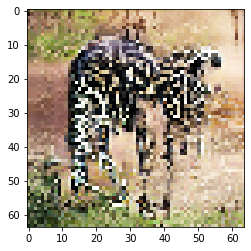

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 56

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 6.576092004776001 sec
Gen loss: 1.426536649465561, Disc loss: 1.468826478303865, Disc valid real loss: 0.5227068974528202, Disc valid fake loss: 0.5068555529727492, Disc class real loss: 0.06772597137632845, Disc class fake loss: 0.3715380595260581
Time for epoch 2 is 6.5778257846832275 sec
Gen loss: 1.395642486422561, Disc loss: 1.4804698464482329, Disc valid real loss: 0.5337528972778209, Disc valid fake loss: 0.5027336973783582, Disc class real loss: 0.07124882726930082, Disc class fake loss: 0.3727344203047281
Time for epoch 3 is 6.5822060108184814 sec
Gen loss: 1.4083561779454696, Disc loss: 1.4518951350866363, Disc valid real loss: 0.5204985372202341, Disc valid fake loss: 0.49903300716433413, Disc class real loss: 0.07622231119637225, Disc class fake loss: 0.3561412781303705
Time for epoch 4 is 6.562281847000122 sec
Gen loss: 1.4446095290572145

Time for epoch 31 is 6.5761799812316895 sec
Gen loss: 1.398889809846878, Disc loss: 1.4702893440113511, Disc valid real loss: 0.5277002630538719, Disc valid fake loss: 0.5064952472268149, Disc class real loss: 0.07130123292052643, Disc class fake loss: 0.3647925989962248
Time for epoch 32 is 6.559457302093506 sec
Gen loss: 1.4383366392102352, Disc loss: 1.465187428302543, Disc valid real loss: 0.5205368030556413, Disc valid fake loss: 0.4991092846490616, Disc class real loss: 0.06013673402878001, Disc class fake loss: 0.3854046151648427
Time for epoch 33 is 6.563920021057129 sec
Gen loss: 1.4100484078706697, Disc loss: 1.4570995312790538, Disc valid real loss: 0.5302402001134184, Disc valid fake loss: 0.49840460890947386, Disc class real loss: 0.06176005957680646, Disc class fake loss: 0.3666946624167437
Time for epoch 34 is 6.567667007446289 sec
Gen loss: 1.422526371340419, Disc loss: 1.4386595723240874, Disc valid real loss: 0.5271318220468455, Disc valid fake loss: 0.495686862184557

Time for epoch 62 is 6.568437337875366 sec
Gen loss: 1.3921506079130395, Disc loss: 1.4801742032516834, Disc valid real loss: 0.530635004473287, Disc valid fake loss: 0.5145113620647165, Disc class real loss: 0.06949479659196249, Disc class fake loss: 0.36553303271445425
Time for epoch 63 is 6.610302925109863 sec
Gen loss: 1.4165591216364573, Disc loss: 1.4800560699645864, Disc valid real loss: 0.5280933825429096, Disc valid fake loss: 0.5033319708566333, Disc class real loss: 0.06813623490716265, Disc class fake loss: 0.38049448368161226
Time for epoch 64 is 6.567223787307739 sec
Gen loss: 1.4023954799008924, Disc loss: 1.4631347247334414, Disc valid real loss: 0.5345122445114824, Disc valid fake loss: 0.4966296376877053, Disc class real loss: 0.06293115939208588, Disc class fake loss: 0.3690616804240055
Time for epoch 65 is 6.5800862312316895 sec
Gen loss: 1.4249799736710482, Disc loss: 1.4247847656870998, Disc valid real loss: 0.5105898212208304, Disc valid fake loss: 0.496079243026

Time for epoch 93 is 6.6731836795806885 sec
Gen loss: 1.3844591261342514, Disc loss: 1.465261307566665, Disc valid real loss: 0.5345529068348019, Disc valid fake loss: 0.5124921003399894, Disc class real loss: 0.06394452842488495, Disc class fake loss: 0.35427176575501296
Time for epoch 94 is 6.544986248016357 sec
Gen loss: 1.4346049095309057, Disc loss: 1.427511864623358, Disc valid real loss: 0.5200786855678226, Disc valid fake loss: 0.49228841620822283, Disc class real loss: 0.06890504417919316, Disc class fake loss: 0.3462397145150706
Time for epoch 95 is 6.5269455909729 sec
Gen loss: 1.3934127210184586, Disc loss: 1.463623855003091, Disc valid real loss: 0.539676750815192, Disc valid fake loss: 0.509125754756983, Disc class real loss: 0.06522555762988537, Disc class fake loss: 0.3495958016882109
Time for epoch 96 is 6.742501497268677 sec
Gen loss: 1.4088330490644587, Disc loss: 1.441570428914802, Disc valid real loss: 0.520286726223868, Disc valid fake loss: 0.4959052501376285, Di

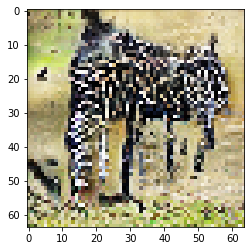

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 57

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 6.562523603439331 sec
Gen loss: 1.4256039656871973, Disc loss: 1.4834431188051092, Disc valid real loss: 0.5337758944478146, Disc valid fake loss: 0.5008608920629635, Disc class real loss: 0.06829606108692322, Disc class fake loss: 0.3805102720250224
Time for epoch 2 is 6.5582873821258545 sec
Gen loss: 1.387725943049719, Disc loss: 1.4782864687054655, Disc valid real loss: 0.535265842149424, Disc valid fake loss: 0.5085753358380739, Disc class real loss: 0.06380811057372972, Disc class fake loss: 0.3706371789408285
Time for epoch 3 is 6.534691572189331 sec
Gen loss: 1.416937336672184, Disc loss: 1.4563296250132627, Disc valid real loss: 0.5279363326208536, Disc valid fake loss: 0.49679225007461947, Disc class real loss: 0.06549494320440084, Disc class fake loss: 0.366106097261573
Time for epoch 4 is 6.558414697647095 sec
Gen loss: 1.4139210217913916, 

Time for epoch 31 is 6.605346918106079 sec
Gen loss: 1.4322445503501005, Disc loss: 1.4846538135478662, Disc valid real loss: 0.5265202556931695, Disc valid fake loss: 0.4995180862241013, Disc class real loss: 0.06887515468609541, Disc class fake loss: 0.38974032551050186
Time for epoch 32 is 6.604439973831177 sec
Gen loss: 1.4364039412764615, Disc loss: 1.4693271943996118, Disc valid real loss: 0.522617967149546, Disc valid fake loss: 0.48882207222456153, Disc class real loss: 0.062406421898929185, Disc class fake loss: 0.3954807330615992
Time for epoch 33 is 6.589259386062622 sec
Gen loss: 1.3870849962844405, Disc loss: 1.486815062719722, Disc valid real loss: 0.536401494124601, Disc valid fake loss: 0.5138959337112515, Disc class real loss: 0.06762869049643361, Disc class fake loss: 0.3688889418317135
Time for epoch 34 is 6.602856874465942 sec
Gen loss: 1.4126864283583884, Disc loss: 1.4483376585466916, Disc valid real loss: 0.5188680663704872, Disc valid fake loss: 0.49764463374781

Time for epoch 62 is 6.563143968582153 sec
Gen loss: 1.4190492720104928, Disc loss: 1.496441803699316, Disc valid real loss: 0.5352205337826595, Disc valid fake loss: 0.5058674980388131, Disc class real loss: 0.06340557176397767, Disc class fake loss: 0.39194820145534914
Time for epoch 63 is 6.550114393234253 sec
Gen loss: 1.4018605898979097, Disc loss: 1.44888565013575, Disc valid real loss: 0.5221055891624716, Disc valid fake loss: 0.5060908194891242, Disc class real loss: 0.06433702605982246, Disc class fake loss: 0.35635221216741
Time for epoch 64 is 6.563288688659668 sec
Gen loss: 1.4229561991469806, Disc loss: 1.4608427421298138, Disc valid real loss: 0.5196236711601878, Disc valid fake loss: 0.5036565652766893, Disc class real loss: 0.06218019254548952, Disc class fake loss: 0.3753823106891887
Time for epoch 65 is 6.523694038391113 sec
Gen loss: 1.4244873301927434, Disc loss: 1.4674767952325731, Disc valid real loss: 0.5195578944890998, Disc valid fake loss: 0.49961641309566274,

Time for epoch 93 is 6.5758256912231445 sec
Gen loss: 1.4113229381483654, Disc loss: 1.484585024589716, Disc valid real loss: 0.5262831092573875, Disc valid fake loss: 0.4999654431675756, Disc class real loss: 0.06473510958752486, Disc class fake loss: 0.39360136677359425
Time for epoch 94 is 6.596166610717773 sec
Gen loss: 1.4448443041291348, Disc loss: 1.4503164131974065, Disc valid real loss: 0.5159174941999968, Disc valid fake loss: 0.5042558745589367, Disc class real loss: 0.06512106650747186, Disc class fake loss: 0.36502197094608185
Time for epoch 95 is 6.616092205047607 sec
Gen loss: 1.405199253974959, Disc loss: 1.4857907205127006, Disc valid real loss: 0.5295939753914989, Disc valid fake loss: 0.5106045920834985, Disc class real loss: 0.06541279726391008, Disc class fake loss: 0.38017935730343644
Time for epoch 96 is 6.572441577911377 sec
Gen loss: 1.3990516454674478, Disc loss: 1.4818671771953271, Disc valid real loss: 0.5223292555919913, Disc valid fake loss: 0.507024530754

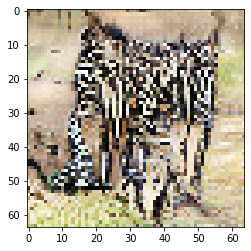

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 58

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 6.590296983718872 sec
Gen loss: 1.37588008753089, Disc loss: 1.4769449552824332, Disc valid real loss: 0.5487831668105236, Disc valid fake loss: 0.5060503574651342, Disc class real loss: 0.0670987426717549, Disc class fake loss: 0.3550126867498769
Time for epoch 2 is 6.566331148147583 sec
Gen loss: 1.403196014637171, Disc loss: 1.471298836691435, Disc valid real loss: 0.532774037226688, Disc valid fake loss: 0.505348801093046, Disc class real loss: 0.06513703253585845, Disc class fake loss: 0.3680389661255271
Time for epoch 3 is 6.589548349380493 sec
Gen loss: 1.4340955836828364, Disc loss: 1.4767456664595493, Disc valid real loss: 0.5106469332132229, Disc valid fake loss: 0.5003912911512131, Disc class real loss: 0.06331709648487917, Disc class fake loss: 0.40239034887663155
Time for epoch 4 is 6.553606986999512 sec
Gen loss: 1.399887478628824, Disc 

Time for epoch 31 is 6.551009178161621 sec
Gen loss: 1.4351401814194613, Disc loss: 1.5008153139158737, Disc valid real loss: 0.5261336629127347, Disc valid fake loss: 0.502447209212669, Disc class real loss: 0.06715156663707349, Disc class fake loss: 0.40508287425997647
Time for epoch 32 is 6.5326995849609375 sec
Gen loss: 1.3734211367230083, Disc loss: 1.4876074988481611, Disc valid real loss: 0.5331510993283849, Disc valid fake loss: 0.5081074752433355, Disc class real loss: 0.07103826777554702, Disc class fake loss: 0.3753106611412625
Time for epoch 33 is 6.587003707885742 sec
Gen loss: 1.3798975293026414, Disc loss: 1.4852558547674224, Disc valid real loss: 0.5402703037442163, Disc valid fake loss: 0.5162907020990238, Disc class real loss: 0.06917961410430888, Disc class fake loss: 0.35951522525486557
Time for epoch 34 is 6.663722038269043 sec
Gen loss: 1.3769093738045803, Disc loss: 1.4455497122781222, Disc valid real loss: 0.5292791843760846, Disc valid fake loss: 0.497471175741

Time for epoch 62 is 6.630562782287598 sec
Gen loss: 1.3826495062473207, Disc loss: 1.4652134450369103, Disc valid real loss: 0.5315574367725572, Disc valid fake loss: 0.5111588189421699, Disc class real loss: 0.056348308428125674, Disc class fake loss: 0.36614887806218727
Time for epoch 63 is 6.61877179145813 sec
Gen loss: 1.396764408710391, Disc loss: 1.457773124755815, Disc valid real loss: 0.5227777259640916, Disc valid fake loss: 0.5049731998249541, Disc class real loss: 0.0629299493996578, Disc class fake loss: 0.3670922426376925
Time for epoch 64 is 6.585129737854004 sec
Gen loss: 1.422177174063616, Disc loss: 1.4541003655555635, Disc valid real loss: 0.5309812435230543, Disc valid fake loss: 0.4979682613250821, Disc class real loss: 0.061355571848676044, Disc class fake loss: 0.36379528474495854
Time for epoch 65 is 6.52654242515564 sec
Gen loss: 1.372017468823943, Disc loss: 1.486102353694827, Disc valid real loss: 0.5383016881208087, Disc valid fake loss: 0.5070142688792806, 

Time for epoch 93 is 6.57660174369812 sec
Gen loss: 1.4034677196380705, Disc loss: 1.4845018480406251, Disc valid real loss: 0.5244104905530463, Disc valid fake loss: 0.5121116428527721, Disc class real loss: 0.07200470658257431, Disc class fake loss: 0.37597500879404155
Time for epoch 94 is 6.5189597606658936 sec
Gen loss: 1.4092678025711414, Disc loss: 1.4626341621543086, Disc valid real loss: 0.5225783933040707, Disc valid fake loss: 0.5000122404375742, Disc class real loss: 0.06542580523446939, Disc class fake loss: 0.3746177270402049
Time for epoch 95 is 6.521265983581543 sec
Gen loss: 1.409599119147589, Disc loss: 1.4824062135330467, Disc valid real loss: 0.5341609531017237, Disc valid fake loss: 0.5049421868698541, Disc class real loss: 0.06742822072403722, Disc class fake loss: 0.3758748522851356
Time for epoch 96 is 6.529131889343262 sec
Gen loss: 1.4062454485616018, Disc loss: 1.4754082110039024, Disc valid real loss: 0.5274076222680336, Disc valid fake loss: 0.49704102669344

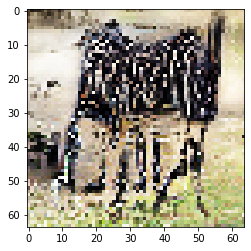

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 59

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 6.532313346862793 sec
Gen loss: 1.4018039897430774, Disc loss: 1.4770358814749607, Disc valid real loss: 0.5333756281192913, Disc valid fake loss: 0.5124155405995457, Disc class real loss: 0.07252193564078012, Disc class fake loss: 0.35872278072286484
Time for epoch 2 is 6.57510781288147 sec
Gen loss: 1.400397267452506, Disc loss: 1.4920313808807106, Disc valid real loss: 0.5334165092817572, Disc valid fake loss: 0.5081744625471359, Disc class real loss: 0.07051763648226814, Disc class fake loss: 0.3799227702236453
Time for epoch 3 is 6.593426942825317 sec
Gen loss: 1.37264029577721, Disc loss: 1.4606604475614637, Disc valid real loss: 0.5262418567787769, Disc valid fake loss: 0.5025351906931678, Disc class real loss: 0.07048208575403361, Disc class fake loss: 0.36140131757616306
Time for epoch 4 is 6.580065011978149 sec
Gen loss: 1.4032815375993417, 

Time for epoch 31 is 6.581418514251709 sec
Gen loss: 1.4039150213086329, Disc loss: 1.5062155453271644, Disc valid real loss: 0.5366058075843856, Disc valid fake loss: 0.5078205904641817, Disc class real loss: 0.0690150285196534, Disc class fake loss: 0.3927741155548151
Time for epoch 32 is 6.571720838546753 sec
Gen loss: 1.376877025809399, Disc loss: 1.4918307620425557, Disc valid real loss: 0.5303961218789567, Disc valid fake loss: 0.508406549172346, Disc class real loss: 0.07285182502900445, Disc class fake loss: 0.3801762633415502
Time for epoch 33 is 6.580465078353882 sec
Gen loss: 1.3989393828913224, Disc loss: 1.4515032692011012, Disc valid real loss: 0.5269268245198006, Disc valid fake loss: 0.5067372044851614, Disc class real loss: 0.0663308994357236, Disc class fake loss: 0.3515083374845427
Time for epoch 34 is 6.569533824920654 sec
Gen loss: 1.3940795743188192, Disc loss: 1.4634690208490504, Disc valid real loss: 0.5294564153219379, Disc valid fake loss: 0.49997133761644363,

Time for epoch 62 is 6.554597854614258 sec
Gen loss: 1.4212120452592538, Disc loss: 1.4911687013714812, Disc valid real loss: 0.5242380007754924, Disc valid fake loss: 0.5052069117163502, Disc class real loss: 0.0707392994541848, Disc class fake loss: 0.3909844890410124
Time for epoch 63 is 6.542512655258179 sec
Gen loss: 1.4129227441410686, Disc loss: 1.4583481647247492, Disc valid real loss: 0.5301301287010659, Disc valid fake loss: 0.5025343936543132, Disc class real loss: 0.0712606989491601, Disc class fake loss: 0.35442293903162314
Time for epoch 64 is 6.572748184204102 sec
Gen loss: 1.3883621117403342, Disc loss: 1.4638198572535848, Disc valid real loss: 0.5347228407166725, Disc valid fake loss: 0.509017251431942, Disc class real loss: 0.06821736760794857, Disc class fake loss: 0.35186239695826244
Time for epoch 65 is 6.5321125984191895 sec
Gen loss: 1.3726093173027039, Disc loss: 1.457538976225742, Disc valid real loss: 0.5348076726808104, Disc valid fake loss: 0.506907084307005

Time for epoch 93 is 6.573599815368652 sec
Gen loss: 1.3997431536053502, Disc loss: 1.464797849571982, Disc valid real loss: 0.5339648115426995, Disc valid fake loss: 0.5154883320941481, Disc class real loss: 0.05850934117577623, Disc class fake loss: 0.3568353611369466
Time for epoch 94 is 6.554022789001465 sec
Gen loss: 1.3954735037892363, Disc loss: 1.4589390453211097, Disc valid real loss: 0.5243145601693974, Disc valid fake loss: 0.5060549218987309, Disc class real loss: 0.06608154958514713, Disc class fake loss: 0.36248801384381085
Time for epoch 95 is 6.6363136768341064 sec
Gen loss: 1.413171795911567, Disc loss: 1.479779381391614, Disc valid real loss: 0.5291525225999744, Disc valid fake loss: 0.5118971077162165, Disc class real loss: 0.07065180406180145, Disc class fake loss: 0.36807794972907665
Time for epoch 96 is 6.676738977432251 sec
Gen loss: 1.402077921601229, Disc loss: 1.42216103437335, Disc valid real loss: 0.5229320051365121, Disc valid fake loss: 0.4936119915787564,

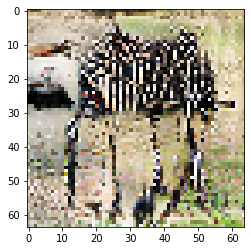

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 60

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 6.5685508251190186 sec
Gen loss: 1.3768146613309549, Disc loss: 1.4714862503284631, Disc valid real loss: 0.532806147149829, Disc valid fake loss: 0.5094638158415639, Disc class real loss: 0.06481964223704106, Disc class fake loss: 0.36439664804831495
Time for epoch 2 is 6.551668167114258 sec
Gen loss: 1.3995081255602282, Disc loss: 1.4497344635946805, Disc valid real loss: 0.5305381136578183, Disc valid fake loss: 0.5061758226433466, Disc class real loss: 0.06377472701688232, Disc class fake loss: 0.34924580022519414
Time for epoch 3 is 6.548379182815552 sec
Gen loss: 1.4162664351075194, Disc loss: 1.4575733188972917, Disc valid real loss: 0.5228008750912755, Disc valid fake loss: 0.4998783330584681, Disc class real loss: 0.06792818051410926, Disc class fake loss: 0.366965927833388
Time for epoch 4 is 6.580649137496948 sec
Gen loss: 1.418191604836042

Time for epoch 31 is 6.5393593311309814 sec
Gen loss: 1.4176015098427617, Disc loss: 1.486200662199841, Disc valid real loss: 0.5296923384763473, Disc valid fake loss: 0.5062141271178112, Disc class real loss: 0.0716744791526824, Disc class fake loss: 0.3786197197298671
Time for epoch 32 is 6.519535064697266 sec
Gen loss: 1.4257997780345206, Disc loss: 1.4455839936123338, Disc valid real loss: 0.5179135863517605, Disc valid fake loss: 0.49654950773300127, Disc class real loss: 0.0665570084075985, Disc class fake loss: 0.36456389222727265
Time for epoch 33 is 6.5565409660339355 sec
Gen loss: 1.4110497769921324, Disc loss: 1.4534481950970584, Disc valid real loss: 0.5267600585208383, Disc valid fake loss: 0.5045586162528326, Disc class real loss: 0.0637276382131372, Disc class fake loss: 0.35840188049126503
Time for epoch 34 is 6.556193590164185 sec
Gen loss: 1.4198831049508827, Disc loss: 1.4698938942232798, Disc valid real loss: 0.5231855184186337, Disc valid fake loss: 0.5066350079899

Time for epoch 62 is 6.572782516479492 sec
Gen loss: 1.3924280134744422, Disc loss: 1.4498226698054824, Disc valid real loss: 0.5352991107244824, Disc valid fake loss: 0.5152946889053943, Disc class real loss: 0.06547658518904301, Disc class fake loss: 0.3337522802744494
Time for epoch 63 is 6.548621416091919 sec
Gen loss: 1.4031301466531532, Disc loss: 1.4456372267978137, Disc valid real loss: 0.5187858388174412, Disc valid fake loss: 0.5034071191452271, Disc class real loss: 0.06809983766626913, Disc class fake loss: 0.35534442649331205
Time for epoch 64 is 6.553808689117432 sec
Gen loss: 1.4257490115110265, Disc loss: 1.4706820221834405, Disc valid real loss: 0.5268418572323267, Disc valid fake loss: 0.5060428261410358, Disc class real loss: 0.0698904354114432, Disc class fake loss: 0.36790690791988095
Time for epoch 65 is 6.588639974594116 sec
Gen loss: 1.4276938015638396, Disc loss: 1.4426057408022326, Disc valid real loss: 0.5099940613605255, Disc valid fake loss: 0.5047387929503

Time for epoch 93 is 6.556318998336792 sec
Gen loss: 1.4445268719695334, Disc loss: 1.4514500353225441, Disc valid real loss: 0.5154538473417593, Disc valid fake loss: 0.49958343786555665, Disc class real loss: 0.06702640308825256, Disc class fake loss: 0.36938634991299274
Time for epoch 94 is 6.570120811462402 sec
Gen loss: 1.4082665096881777, Disc loss: 1.4405134074216666, Disc valid real loss: 0.5303552225232124, Disc valid fake loss: 0.496585784783197, Disc class real loss: 0.06272429106134358, Disc class fake loss: 0.35084810694896207
Time for epoch 95 is 6.558656215667725 sec
Gen loss: 1.3889187865479047, Disc loss: 1.4299526065587997, Disc valid real loss: 0.5232709282359411, Disc valid fake loss: 0.5055749106199242, Disc class real loss: 0.059105792888277754, Disc class fake loss: 0.3420009758583335
Time for epoch 96 is 6.56759238243103 sec
Gen loss: 1.434849349565284, Disc loss: 1.4346077851084775, Disc valid real loss: 0.524236626230007, Disc valid fake loss: 0.50153061210416

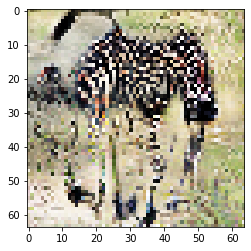

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 61

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 6.585918426513672 sec
Gen loss: 1.4264432538387388, Disc loss: 1.4678516235462455, Disc valid real loss: 0.5243073403835297, Disc valid fake loss: 0.505641198435495, Disc class real loss: 0.0629075861232745, Disc class fake loss: 0.3749954985497996
Time for epoch 2 is 6.553634405136108 sec
Gen loss: 1.4184220814427664, Disc loss: 1.4462401503047277, Disc valid real loss: 0.5307294511517813, Disc valid fake loss: 0.511001284732375, Disc class real loss: 0.06284869753831435, Disc class fake loss: 0.34166070918530916
Time for epoch 3 is 6.5478973388671875 sec
Gen loss: 1.392831263154052, Disc loss: 1.4537088968033014, Disc valid real loss: 0.52184997273739, Disc valid fake loss: 0.5023882506891738, Disc class real loss: 0.06576962559213212, Disc class fake loss: 0.36370105595262936
Time for epoch 4 is 6.538926124572754 sec
Gen loss: 1.4245614347069762, D

Time for epoch 31 is 6.575885772705078 sec
Gen loss: 1.423724167568739, Disc loss: 1.4690564205480177, Disc valid real loss: 0.5269916360807974, Disc valid fake loss: 0.5009266065303669, Disc class real loss: 0.07682209148418245, Disc class fake loss: 0.36431608414060845
Time for epoch 32 is 6.54655647277832 sec
Gen loss: 1.4277144268501636, Disc loss: 1.4622988735520563, Disc valid real loss: 0.5257502584609874, Disc valid fake loss: 0.4926507887105609, Disc class real loss: 0.06197001403576673, Disc class fake loss: 0.3819278099162634
Time for epoch 33 is 6.5660881996154785 sec
Gen loss: 1.4408617165199546, Disc loss: 1.4895674600157627, Disc valid real loss: 0.5331136043681655, Disc valid fake loss: 0.5054380701378335, Disc class real loss: 0.06667130421792958, Disc class fake loss: 0.3843444745207942
Time for epoch 34 is 6.499839544296265 sec
Gen loss: 1.4031252147153366, Disc loss: 1.4401979287003361, Disc valid real loss: 0.5279958816461785, Disc valid fake loss: 0.49568535283554

Time for epoch 62 is 6.5518622398376465 sec
Gen loss: 1.3785108501134917, Disc loss: 1.4569724891767946, Disc valid real loss: 0.5374550008496572, Disc valid fake loss: 0.5009339157232019, Disc class real loss: 0.06696685019279505, Disc class fake loss: 0.3516167234196219
Time for epoch 63 is 6.542694807052612 sec
Gen loss: 1.400972531285397, Disc loss: 1.4455186267231785, Disc valid real loss: 0.5274260938167572, Disc valid fake loss: 0.5063273679724959, Disc class real loss: 0.06511701470468366, Disc class fake loss: 0.3466481485858906
Time for epoch 64 is 6.536226749420166 sec
Gen loss: 1.3729938476584678, Disc loss: 1.4318812988525214, Disc valid real loss: 0.5392428480608519, Disc valid fake loss: 0.5055193251302076, Disc class real loss: 0.05906771544399563, Disc class fake loss: 0.32805140208193034
Time for epoch 65 is 6.560873508453369 sec
Gen loss: 1.3976520528626997, Disc loss: 1.4062505842641342, Disc valid real loss: 0.52627427529457, Disc valid fake loss: 0.498151750065559

Time for epoch 93 is 6.577543497085571 sec
Gen loss: 1.4177994963734648, Disc loss: 1.465212234924006, Disc valid real loss: 0.5281129439556321, Disc valid fake loss: 0.503650210451248, Disc class real loss: 0.06704992562705694, Disc class fake loss: 0.36639915164126907
Time for epoch 94 is 6.5086424350738525 sec
Gen loss: 1.4000923127629037, Disc loss: 1.4764452576637268, Disc valid real loss: 0.5273595434981723, Disc valid fake loss: 0.5044836129906566, Disc class real loss: 0.06900343040632474, Disc class fake loss: 0.3755986784086671
Time for epoch 95 is 6.555495262145996 sec
Gen loss: 1.3980207422444986, Disc loss: 1.4507620844037035, Disc valid real loss: 0.5257671539520108, Disc valid fake loss: 0.5068960616061854, Disc class real loss: 0.06626663663218794, Disc class fake loss: 0.35183223310944645
Time for epoch 96 is 6.529862880706787 sec
Gen loss: 1.4318735197533008, Disc loss: 1.4478739454995755, Disc valid real loss: 0.5252526353958041, Disc valid fake loss: 0.5027216466706

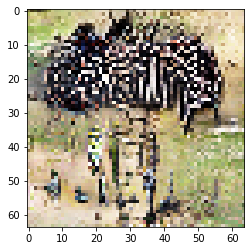

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 62

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 6.5215325355529785 sec
Gen loss: 1.3993951310945112, Disc loss: 1.4813448388216108, Disc valid real loss: 0.5355716205613558, Disc valid fake loss: 0.5111322423746419, Disc class real loss: 0.06822882308272732, Disc class fake loss: 0.3664121514316215
Time for epoch 2 is 6.512837171554565 sec
Gen loss: 1.389607694952987, Disc loss: 1.4539362694634947, Disc valid real loss: 0.5327517596441645, Disc valid fake loss: 0.5102628959819328, Disc class real loss: 0.06015267643568561, Disc class fake loss: 0.35076893731778447
Time for epoch 3 is 6.537705421447754 sec
Gen loss: 1.4428501080634981, Disc loss: 1.461518219044042, Disc valid real loss: 0.5221667393695476, Disc valid fake loss: 0.49909831150326617, Disc class real loss: 0.06516531614727493, Disc class fake loss: 0.3750878459838934
Time for epoch 4 is 6.525242328643799 sec
Gen loss: 1.398714167434115

Time for epoch 31 is 6.543883800506592 sec
Gen loss: 1.396977617990139, Disc loss: 1.4859228799509447, Disc valid real loss: 0.5375116715251014, Disc valid fake loss: 0.5082650829193204, Disc class real loss: 0.06612156097084111, Disc class fake loss: 0.3740245673458937
Time for epoch 32 is 6.5247063636779785 sec
Gen loss: 1.4176333012968996, Disc loss: 1.4277413113172663, Disc valid real loss: 0.5254860399074333, Disc valid fake loss: 0.49880278387735055, Disc class real loss: 0.06245787848371926, Disc class fake loss: 0.34099461081935917
Time for epoch 33 is 6.522988557815552 sec
Gen loss: 1.4180842159792435, Disc loss: 1.4711825414452442, Disc valid real loss: 0.5322605348950209, Disc valid fake loss: 0.5016661518534948, Disc class real loss: 0.06700193346478045, Disc class fake loss: 0.370253920858336
Time for epoch 34 is 6.557237386703491 sec
Gen loss: 1.3993726137072542, Disc loss: 1.4308151987402937, Disc valid real loss: 0.5185278019932813, Disc valid fake loss: 0.5013324325514

Time for epoch 62 is 6.5254881381988525 sec
Gen loss: 1.4243629082690838, Disc loss: 1.428776879643285, Disc valid real loss: 0.5269932793669923, Disc valid fake loss: 0.5014488023034361, Disc class real loss: 0.06374282670900398, Disc class fake loss: 0.3365919648041559
Time for epoch 63 is 6.558258771896362 sec
Gen loss: 1.4056937971780465, Disc loss: 1.4280364776766576, Disc valid real loss: 0.5278554829054101, Disc valid fake loss: 0.4972168718313062, Disc class real loss: 0.06061667496565903, Disc class fake loss: 0.34234744617932067
Time for epoch 64 is 6.536223649978638 sec
Gen loss: 1.4569124766560488, Disc loss: 1.4710171576156172, Disc valid real loss: 0.5256542613686517, Disc valid fake loss: 0.4941417344434317, Disc class real loss: 0.07183688420526207, Disc class fake loss: 0.37938427734513613
Time for epoch 65 is 6.563125133514404 sec
Gen loss: 1.4231860804003338, Disc loss: 1.4401686974736148, Disc valid real loss: 0.5210020060456076, Disc valid fake loss: 0.499115447665

Time for epoch 93 is 6.559980154037476 sec
Gen loss: 1.3899313253025676, Disc loss: 1.4430485866790594, Disc valid real loss: 0.5300477252796639, Disc valid fake loss: 0.5089578715174697, Disc class real loss: 0.0599583531567437, Disc class fake loss: 0.34408463537693024
Time for epoch 94 is 6.546279668807983 sec
Gen loss: 1.4097266945728035, Disc loss: 1.44905854380408, Disc valid real loss: 0.5285210181460824, Disc valid fake loss: 0.5001271160882573, Disc class real loss: 0.0578164657209675, Disc class fake loss: 0.36259393645233884
Time for epoch 95 is 6.571608066558838 sec
Gen loss: 1.4133378606896068, Disc loss: 1.4437902472739996, Disc valid real loss: 0.5295279083210368, Disc valid fake loss: 0.5039086463146432, Disc class real loss: 0.05383915981266994, Disc class fake loss: 0.35651452939004397
Time for epoch 96 is 6.556390285491943 sec
Gen loss: 1.396996437810188, Disc loss: 1.451799776665, Disc valid real loss: 0.5251377467499223, Disc valid fake loss: 0.49807059591592745, D

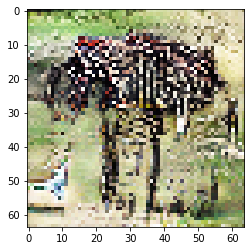

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 63

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 6.5571818351745605 sec
Gen loss: 1.436434189940608, Disc loss: 1.4741741990627244, Disc valid real loss: 0.5270034298300743, Disc valid fake loss: 0.5006370937754941, Disc class real loss: 0.06670755358835206, Disc class fake loss: 0.37982612200687793
Time for epoch 2 is 6.535495042800903 sec
Gen loss: 1.4181664932605833, Disc loss: 1.4576081432575403, Disc valid real loss: 0.5310706264057825, Disc valid fake loss: 0.5062866673566574, Disc class real loss: 0.05744103174710776, Disc class fake loss: 0.3628098147076576
Time for epoch 3 is 6.578235864639282 sec
Gen loss: 1.3902697396832844, Disc loss: 1.4466353003368821, Disc valid real loss: 0.5311319271838942, Disc valid fake loss: 0.49750426255686336, Disc class real loss: 0.062267907589219164, Disc class fake loss: 0.3557312045852805
Time for epoch 4 is 6.568790674209595 sec
Gen loss: 1.4041788280010

Time for epoch 31 is 6.575297594070435 sec
Gen loss: 1.4065221520357354, Disc loss: 1.4669665860575298, Disc valid real loss: 0.5284081200181052, Disc valid fake loss: 0.5107815383478652, Disc class real loss: 0.06418268636226394, Disc class fake loss: 0.3635942411803922
Time for epoch 32 is 6.576361894607544 sec
Gen loss: 1.3774681001208549, Disc loss: 1.4667493208896283, Disc valid real loss: 0.5301389429111814, Disc valid fake loss: 0.5061020298406135, Disc class real loss: 0.07079426889296968, Disc class fake loss: 0.3597140825072
Time for epoch 33 is 6.568432092666626 sec
Gen loss: 1.3867190043593562, Disc loss: 1.4727933330591334, Disc valid real loss: 0.5384823343781537, Disc valid fake loss: 0.5050661123769228, Disc class real loss: 0.06245992736360275, Disc class fake loss: 0.36678495457352595
Time for epoch 34 is 6.548390626907349 sec
Gen loss: 1.4212872663209604, Disc loss: 1.4629551050967948, Disc valid real loss: 0.5291369784363481, Disc valid fake loss: 0.5026498637920203

Time for epoch 62 is 6.549259662628174 sec
Gen loss: 1.4681149755799494, Disc loss: 1.5011626530525297, Disc valid real loss: 0.5254620103988537, Disc valid fake loss: 0.4990995122596275, Disc class real loss: 0.06836083303963722, Disc class fake loss: 0.408240292784433
Time for epoch 63 is 6.546929359436035 sec
Gen loss: 1.3744367257107135, Disc loss: 1.4760873397422392, Disc valid real loss: 0.5315532169716303, Disc valid fake loss: 0.5014422965604205, Disc class real loss: 0.07279565600613348, Disc class fake loss: 0.37029617019864014
Time for epoch 64 is 6.576618909835815 sec
Gen loss: 1.3884750625421836, Disc loss: 1.4489641827206279, Disc valid real loss: 0.5309868392556213, Disc valid fake loss: 0.5130300511454426, Disc class real loss: 0.0666608421766838, Disc class fake loss: 0.33828644727378393
Time for epoch 65 is 6.564095497131348 sec
Gen loss: 1.394053967886193, Disc loss: 1.4780349887387698, Disc valid real loss: 0.5258679559757543, Disc valid fake loss: 0.512256342831046

Time for epoch 93 is 6.5652830600738525 sec
Gen loss: 1.3902284385159958, Disc loss: 1.4718227407266928, Disc valid real loss: 0.529171212814575, Disc valid fake loss: 0.5105380329281785, Disc class real loss: 0.061295495861274904, Disc class fake loss: 0.3708179976444605
Time for epoch 94 is 6.566865921020508 sec
Gen loss: 1.4004305628843086, Disc loss: 1.44696372816729, Disc valid real loss: 0.522075776443925, Disc valid fake loss: 0.5054815882860229, Disc class real loss: 0.06161319367251857, Disc class fake loss: 0.35779316359481145
Time for epoch 95 is 6.569384336471558 sec
Gen loss: 1.3798209706018136, Disc loss: 1.4679049194552178, Disc valid real loss: 0.5373772297834241, Disc valid fake loss: 0.5160951144820036, Disc class real loss: 0.0616166774714149, Disc class fake loss: 0.35281589172433975
Time for epoch 96 is 6.5532591342926025 sec
Gen loss: 1.4267606513444768, Disc loss: 1.465194828981577, Disc valid real loss: 0.5218191547102706, Disc valid fake loss: 0.494417176863481

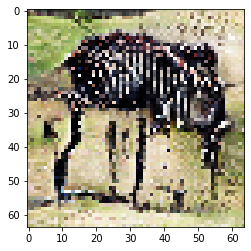

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 64

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 6.549210071563721 sec
Gen loss: 1.4020515049612798, Disc loss: 1.451812511266664, Disc valid real loss: 0.5365632273430048, Disc valid fake loss: 0.5065194273064303, Disc class real loss: 0.05855176605008066, Disc class fake loss: 0.35017808388138927
Time for epoch 2 is 6.561056613922119 sec
Gen loss: 1.3933893192646116, Disc loss: 1.4634045972380527, Disc valid real loss: 0.5382157742630603, Disc valid fake loss: 0.5059915533245996, Disc class real loss: 0.0601493475909973, Disc class fake loss: 0.35904793068766594
Time for epoch 3 is 6.529096841812134 sec
Gen loss: 1.4341943991738697, Disc loss: 1.4283456691475802, Disc valid real loss: 0.5182920392862586, Disc valid fake loss: 0.49698996942403706, Disc class real loss: 0.06009404521522134, Disc class fake loss: 0.3529696082479732
Time for epoch 4 is 6.547715663909912 sec
Gen loss: 1.396191037324972

Time for epoch 31 is 6.588088512420654 sec
Gen loss: 1.4016962896945864, Disc loss: 1.4454756940520086, Disc valid real loss: 0.527178499241208, Disc valid fake loss: 0.5032099686389746, Disc class real loss: 0.07018609350644658, Disc class fake loss: 0.3449011338484842
Time for epoch 32 is 6.5674662590026855 sec
Gen loss: 1.3985268134017323, Disc loss: 1.442103340528732, Disc valid real loss: 0.5217539652488953, Disc valid fake loss: 0.5087175795505213, Disc class real loss: 0.06154153688112274, Disc class fake loss: 0.3500902601192857
Time for epoch 33 is 6.667849063873291 sec
Gen loss: 1.4528519947861516, Disc loss: 1.456465288303619, Disc valid real loss: 0.527493299439896, Disc valid fake loss: 0.5031606953504474, Disc class real loss: 0.06572539613955806, Disc class fake loss: 0.3600858966278475
Time for epoch 34 is 6.516294956207275 sec
Gen loss: 1.368018509343613, Disc loss: 1.463845558984335, Disc valid real loss: 0.5348087641042333, Disc valid fake loss: 0.508655784781589, Di

Time for epoch 62 is 6.556354761123657 sec
Gen loss: 1.3874796323998029, Disc loss: 1.4512174559193989, Disc valid real loss: 0.5442075670458549, Disc valid fake loss: 0.5082048867330995, Disc class real loss: 0.06220122195000565, Disc class fake loss: 0.3366037693394478
Time for epoch 63 is 6.609081745147705 sec
Gen loss: 1.3769069986287938, Disc loss: 1.4596415605655937, Disc valid real loss: 0.5351144281584163, Disc valid fake loss: 0.5037497635497603, Disc class real loss: 0.059154381109185, Disc class fake loss: 0.36162298958921846
Time for epoch 64 is 6.541187524795532 sec
Gen loss: 1.406557212042254, Disc loss: 1.441963989027711, Disc valid real loss: 0.5268497487833333, Disc valid fake loss: 0.5065540832489036, Disc class real loss: 0.05507332700856983, Disc class fake loss: 0.35348683049859003
Time for epoch 65 is 6.5343711376190186 sec
Gen loss: 1.3841749336137328, Disc loss: 1.4538413397101468, Disc valid real loss: 0.5426705720466237, Disc valid fake loss: 0.509118984604990

Time for epoch 93 is 6.56088399887085 sec
Gen loss: 1.4032909364201303, Disc loss: 1.4703737902779912, Disc valid real loss: 0.5399603703340818, Disc valid fake loss: 0.5097185835935348, Disc class real loss: 0.05794584531564439, Disc class fake loss: 0.362748991741344
Time for epoch 94 is 6.552560329437256 sec
Gen loss: 1.3825405253920444, Disc loss: 1.4621110710986824, Disc valid real loss: 0.525551546278388, Disc valid fake loss: 0.5118386171931444, Disc class real loss: 0.06370022620323526, Disc class fake loss: 0.3610206847620565
Time for epoch 95 is 6.545983552932739 sec
Gen loss: 1.4110280337721803, Disc loss: 1.4327887532322905, Disc valid real loss: 0.5226506051975627, Disc valid fake loss: 0.5001067390968633, Disc class real loss: 0.05938586503061531, Disc class fake loss: 0.3506455452203058
Time for epoch 96 is 6.562678098678589 sec
Gen loss: 1.4218231224736502, Disc loss: 1.4712483973004098, Disc valid real loss: 0.5261412325293519, Disc valid fake loss: 0.5027531146310097,

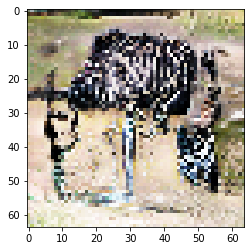

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 65

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 6.469054460525513 sec
Gen loss: 1.4220489055611367, Disc loss: 1.4927102542200754, Disc valid real loss: 0.5312971013576485, Disc valid fake loss: 0.5105031172550002, Disc class real loss: 0.059117257733136246, Disc class fake loss: 0.3917927767994792
Time for epoch 2 is 6.653009414672852 sec
Gen loss: 1.4008776341066804, Disc loss: 1.468767398318579, Disc valid real loss: 0.532407249822173, Disc valid fake loss: 0.5091357776938483, Disc class real loss: 0.06253226618499083, Disc class fake loss: 0.364692100042174
Time for epoch 3 is 6.49463152885437 sec
Gen loss: 1.3788028414859328, Disc loss: 1.460130855787632, Disc valid real loss: 0.5290024467678958, Disc valid fake loss: 0.5108580748702205, Disc class real loss: 0.06372471941163936, Disc class fake loss: 0.3565456165693874
Time for epoch 4 is 6.6044557094573975 sec
Gen loss: 1.373397396747456, Di

Time for epoch 31 is 6.55763840675354 sec
Gen loss: 1.3753025413945663, Disc loss: 1.4587009497160135, Disc valid real loss: 0.5410249143145806, Disc valid fake loss: 0.5105977453464685, Disc class real loss: 0.05651123066389457, Disc class fake loss: 0.35056705805364735
Time for epoch 32 is 6.557921886444092 sec
Gen loss: 1.4157093901966893, Disc loss: 1.4547084368938623, Disc valid real loss: 0.5255731124170991, Disc valid fake loss: 0.4986994860823764, Disc class real loss: 0.0656928940362102, Disc class fake loss: 0.3647429482621509
Time for epoch 33 is 6.554111003875732 sec
Gen loss: 1.3936857172223025, Disc loss: 1.4681817993175152, Disc valid real loss: 0.5292954836473909, Disc valid fake loss: 0.5126584515322087, Disc class real loss: 0.06150841908827207, Disc class fake loss: 0.364719437781808
Time for epoch 34 is 6.558760166168213 sec
Gen loss: 1.3760476881681487, Disc loss: 1.4437595297430836, Disc valid real loss: 0.5356114025032798, Disc valid fake loss: 0.5090486876839815

Time for epoch 62 is 6.550597429275513 sec
Gen loss: 1.395539261573969, Disc loss: 1.4396407472532848, Disc valid real loss: 0.5404204868300017, Disc valid fake loss: 0.50310912381771, Disc class real loss: 0.05367260835496276, Disc class fake loss: 0.342438533079139
Time for epoch 63 is 6.581423044204712 sec
Gen loss: 1.4013790086258289, Disc loss: 1.450678903696149, Disc valid real loss: 0.527289446010146, Disc valid fake loss: 0.5039487098192059, Disc class real loss: 0.06438105207120697, Disc class fake loss: 0.3550596901670445
Time for epoch 64 is 6.5484983921051025 sec
Gen loss: 1.3938797823218412, Disc loss: 1.4297366769507873, Disc valid real loss: 0.5260444014917972, Disc valid fake loss: 0.5092429315974546, Disc class real loss: 0.05095805375847619, Disc class fake loss: 0.3434912915839705
Time for epoch 65 is 6.517117977142334 sec
Gen loss: 1.3961555999378825, Disc loss: 1.4376849705396697, Disc valid real loss: 0.5268018580106801, Disc valid fake loss: 0.4984044817297958, D

Time for epoch 93 is 6.5285375118255615 sec
Gen loss: 1.3956145290718522, Disc loss: 1.4325478298719538, Disc valid real loss: 0.5363622183023498, Disc valid fake loss: 0.5061641590193261, Disc class real loss: 0.05286998824259743, Disc class fake loss: 0.33715147026922815
Time for epoch 94 is 6.535686254501343 sec
Gen loss: 1.4257325925106226, Disc loss: 1.4344219139149024, Disc valid real loss: 0.5224303173464399, Disc valid fake loss: 0.501151071558165, Disc class real loss: 0.05393359469125307, Disc class fake loss: 0.3569069298114194
Time for epoch 95 is 6.541950702667236 sec
Gen loss: 1.397703142706738, Disc loss: 1.4763218829798144, Disc valid real loss: 0.5415981169356856, Disc valid fake loss: 0.5090153517071591, Disc class real loss: 0.06019835066331854, Disc class fake loss: 0.3655100675343081
Time for epoch 96 is 6.551469564437866 sec
Gen loss: 1.393623600172442, Disc loss: 1.4385898095923801, Disc valid real loss: 0.5302304178476334, Disc valid fake loss: 0.497356331279111

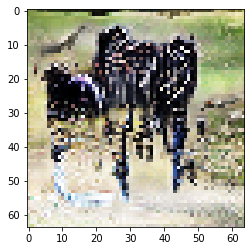

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 66

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 6.534362077713013 sec
Gen loss: 1.3976725111174029, Disc loss: 1.4511011350293492, Disc valid real loss: 0.5279665930673133, Disc valid fake loss: 0.5070873431341593, Disc class real loss: 0.058818757491386604, Disc class fake loss: 0.3572284423930267
Time for epoch 2 is 6.5289599895477295 sec
Gen loss: 1.4209855143413987, Disc loss: 1.4677605202724768, Disc valid real loss: 0.5348432971987613, Disc valid fake loss: 0.4955131967746934, Disc class real loss: 0.06307275865435448, Disc class fake loss: 0.3743312659478465
Time for epoch 3 is 6.536277532577515 sec
Gen loss: 1.4283668599849524, Disc loss: 1.4561730328687401, Disc valid real loss: 0.5330034309001856, Disc valid fake loss: 0.493570540880048, Disc class real loss: 0.06904132359899408, Disc class fake loss: 0.3605577323672383
Time for epoch 4 is 6.512476444244385 sec
Gen loss: 1.384922499573507

Time for epoch 31 is 6.54937744140625 sec
Gen loss: 1.3492768684098886, Disc loss: 1.4848693623099216, Disc valid real loss: 0.5506232574928639, Disc valid fake loss: 0.5138427327538646, Disc class real loss: 0.06624933850117634, Disc class fake loss: 0.3541540376582118
Time for epoch 32 is 6.564714431762695 sec
Gen loss: 1.3678396482800328, Disc loss: 1.4296349134556083, Disc valid real loss: 0.5246811781165212, Disc valid fake loss: 0.5066094760631406, Disc class real loss: 0.06362507562017675, Disc class fake loss: 0.334719181255719
Time for epoch 33 is 6.538126230239868 sec
Gen loss: 1.412480961444766, Disc loss: 1.4668679687865944, Disc valid real loss: 0.5367551851411199, Disc valid fake loss: 0.5066659048546193, Disc class real loss: 0.07335110957907556, Disc class fake loss: 0.3500957680043093
Time for epoch 34 is 6.537531852722168 sec
Gen loss: 1.3806697902984397, Disc loss: 1.4580278202544812, Disc valid real loss: 0.5331182826397031, Disc valid fake loss: 0.5079892293311828,

Time for epoch 62 is 6.5767529010772705 sec
Gen loss: 1.372051618820013, Disc loss: 1.4515171227760093, Disc valid real loss: 0.5366820608114087, Disc valid fake loss: 0.5098357150374457, Disc class real loss: 0.060178220204380885, Disc class fake loss: 0.3448211309651649
Time for epoch 63 is 6.608643054962158 sec
Gen loss: 1.392699781545373, Disc loss: 1.4732367358235425, Disc valid real loss: 0.5389632052460382, Disc valid fake loss: 0.5060522159518197, Disc class real loss: 0.0652411883618401, Disc class fake loss: 0.36298012586180556
Time for epoch 64 is 6.565467119216919 sec
Gen loss: 1.392076658648114, Disc loss: 1.4513181413328924, Disc valid real loss: 0.5316274614874706, Disc valid fake loss: 0.5061232374851093, Disc class real loss: 0.054608723725365516, Disc class fake loss: 0.35895871154444164
Time for epoch 65 is 6.546886205673218 sec
Gen loss: 1.3479767871457478, Disc loss: 1.43302756513274, Disc valid real loss: 0.533150554742924, Disc valid fake loss: 0.5100213365499363

Time for epoch 93 is 6.54054069519043 sec
Gen loss: 1.4099094916221708, Disc loss: 1.4652053017255873, Disc valid real loss: 0.5274009931572649, Disc valid fake loss: 0.5070200723617576, Disc class real loss: 0.058424009781785656, Disc class fake loss: 0.3723602186195379
Time for epoch 94 is 6.553467273712158 sec
Gen loss: 1.3939898977446001, Disc loss: 1.4512893100117528, Disc valid real loss: 0.5297764472143595, Disc valid fake loss: 0.5043382358758949, Disc class real loss: 0.06657836175534528, Disc class fake loss: 0.3505962633116301
Time for epoch 95 is 6.53656530380249 sec
Gen loss: 1.3842717111110687, Disc loss: 1.4626330979341684, Disc valid real loss: 0.5365391006303388, Disc valid fake loss: 0.510826155370058, Disc class real loss: 0.06361043524013313, Disc class fake loss: 0.35165740402285445
Time for epoch 96 is 6.551876783370972 sec
Gen loss: 1.383171338674634, Disc loss: 1.4442761893882308, Disc valid real loss: 0.524103041651637, Disc valid fake loss: 0.5024741217494011,

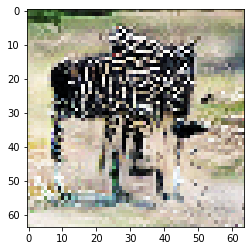

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 67

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 6.529616355895996 sec
Gen loss: 1.3781973622566046, Disc loss: 1.4593181984369146, Disc valid real loss: 0.5371152313296185, Disc valid fake loss: 0.5114253360864728, Disc class real loss: 0.06131960013827179, Disc class fake loss: 0.34945802546517796
Time for epoch 2 is 6.536965370178223 sec
Gen loss: 1.3930957060913707, Disc loss: 1.4462078220622485, Disc valid real loss: 0.5394907768729121, Disc valid fake loss: 0.4984840294995973, Disc class real loss: 0.06072429145772963, Disc class fake loss: 0.34750872438903463
Time for epoch 3 is 6.5644001960754395 sec
Gen loss: 1.4061122571313105, Disc loss: 1.4367843547532724, Disc valid real loss: 0.5183239875491276, Disc valid fake loss: 0.5066336946085442, Disc class real loss: 0.062276496470710915, Disc class fake loss: 0.3495501765851365
Time for epoch 4 is 6.540090084075928 sec
Gen loss: 1.386067866585

Time for epoch 31 is 6.551063776016235 sec
Gen loss: 1.3917403027068738, Disc loss: 1.4612608957429265, Disc valid real loss: 0.5414718294212985, Disc valid fake loss: 0.5081214407502219, Disc class real loss: 0.06104377611962602, Disc class fake loss: 0.3506238450577786
Time for epoch 32 is 6.582172632217407 sec
Gen loss: 1.365846333808677, Disc loss: 1.4493807706721993, Disc valid real loss: 0.5260088490538819, Disc valid fake loss: 0.5103621501908746, Disc class real loss: 0.05929886227132493, Disc class fake loss: 0.35371090961230356
Time for epoch 33 is 6.549226760864258 sec
Gen loss: 1.3978210521298786, Disc loss: 1.4573163005501726, Disc valid real loss: 0.5284866148302722, Disc valid fake loss: 0.5087810969629953, Disc class real loss: 0.06392734432809574, Disc class fake loss: 0.35612124377904936
Time for epoch 34 is 6.561612367630005 sec
Gen loss: 1.4025200113307599, Disc loss: 1.4453707396291022, Disc valid real loss: 0.5294399401822756, Disc valid fake loss: 0.4948646760610

Time for epoch 62 is 6.5960564613342285 sec
Gen loss: 1.3708835909532946, Disc loss: 1.4626133078059484, Disc valid real loss: 0.5385196680246398, Disc valid fake loss: 0.5144699072075445, Disc class real loss: 0.0641521601382708, Disc class fake loss: 0.3454715770257767
Time for epoch 63 is 6.582867383956909 sec
Gen loss: 1.3905039623726245, Disc loss: 1.4543903130431508, Disc valid real loss: 0.5259003259761389, Disc valid fake loss: 0.5061886965535408, Disc class real loss: 0.0587681955955706, Disc class fake loss: 0.3635330906700949
Time for epoch 64 is 6.563426971435547 sec
Gen loss: 1.360536407246146, Disc loss: 1.4550844895285229, Disc valid real loss: 0.5449079822662265, Disc valid fake loss: 0.5105486316389816, Disc class real loss: 0.06752663103086592, Disc class fake loss: 0.3321012449125911
Time for epoch 65 is 6.564457654953003 sec
Gen loss: 1.3624298683432645, Disc loss: 1.4458238288413647, Disc valid real loss: 0.5360115031863368, Disc valid fake loss: 0.5063704642099004

Time for epoch 93 is 6.540117979049683 sec
Gen loss: 1.4531813776770304, Disc loss: 1.5151698537344156, Disc valid real loss: 0.5281485605031945, Disc valid fake loss: 0.5017987056527027, Disc class real loss: 0.06415792386762278, Disc class fake loss: 0.42106466307196505
Time for epoch 94 is 6.569937705993652 sec
Gen loss: 1.3540222201236458, Disc loss: 1.4461035222508187, Disc valid real loss: 0.5259919066068738, Disc valid fake loss: 0.5108999024296916, Disc class real loss: 0.05916959555754655, Disc class fake loss: 0.35004211996876916
Time for epoch 95 is 6.567615270614624 sec
Gen loss: 1.3561933054480442, Disc loss: 1.4730938811634862, Disc valid real loss: 0.5383065384487773, Disc valid fake loss: 0.5204947935633881, Disc class real loss: 0.06826398115020332, Disc class fake loss: 0.3460285688295614
Time for epoch 96 is 6.559653043746948 sec
Gen loss: 1.398446418518244, Disc loss: 1.449299740236859, Disc valid real loss: 0.5292425931886185, Disc valid fake loss: 0.50266052765208

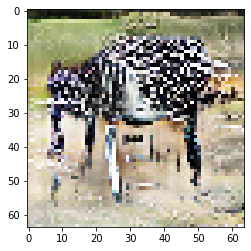

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 68

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 6.558014392852783 sec
Gen loss: 1.3708904260812804, Disc loss: 1.4680245241453482, Disc valid real loss: 0.5353797126648038, Disc valid fake loss: 0.5178204086977382, Disc class real loss: 0.062065914221145865, Disc class fake loss: 0.35275849180166113
Time for epoch 2 is 6.527883768081665 sec
Gen loss: 1.3660087987434033, Disc loss: 1.479601148949113, Disc valid real loss: 0.5427453311723333, Disc valid fake loss: 0.5148737016458844, Disc class real loss: 0.06124354669889218, Disc class fake loss: 0.36073856242001057
Time for epoch 3 is 6.490412950515747 sec
Gen loss: 1.3890380921751955, Disc loss: 1.461239545844322, Disc valid real loss: 0.5331162706364033, Disc valid fake loss: 0.5078070957300275, Disc class real loss: 0.05893207047686934, Disc class fake loss: 0.36138410918241326
Time for epoch 4 is 6.5967607498168945 sec
Gen loss: 1.3832957037659

Time for epoch 31 is 6.540140390396118 sec
Gen loss: 1.3782640439133311, Disc loss: 1.4941075246694475, Disc valid real loss: 0.537178440495979, Disc valid fake loss: 0.5091350490963736, Disc class real loss: 0.06910506906366885, Disc class fake loss: 0.3786889698876198
Time for epoch 32 is 6.568140745162964 sec
Gen loss: 1.3977771221205246, Disc loss: 1.4368958584097928, Disc valid real loss: 0.5305798386418542, Disc valid fake loss: 0.5035610545513242, Disc class real loss: 0.05687473387170453, Disc class fake loss: 0.3458802326214175
Time for epoch 33 is 6.572932004928589 sec
Gen loss: 1.3805099801961767, Disc loss: 1.4553238506927046, Disc valid real loss: 0.5319244781898897, Disc valid fake loss: 0.5131017650629199, Disc class real loss: 0.06318335963391461, Disc class fake loss: 0.34711424629528853
Time for epoch 34 is 6.578122138977051 sec
Gen loss: 1.3860926863759062, Disc loss: 1.4534155040286307, Disc valid real loss: 0.5305252806391827, Disc valid fake loss: 0.50323807586764

Time for epoch 62 is 6.550361156463623 sec
Gen loss: 1.3775275980317316, Disc loss: 1.457975946886595, Disc valid real loss: 0.5415414083142613, Disc valid fake loss: 0.5082549503029778, Disc class real loss: 0.06449458434322286, Disc class fake loss: 0.3436850072209572
Time for epoch 63 is 6.551044940948486 sec
Gen loss: 1.4135017308384874, Disc loss: 1.4454330351463585, Disc valid real loss: 0.5242865104661432, Disc valid fake loss: 0.5010116942400156, Disc class real loss: 0.07261505668582179, Disc class fake loss: 0.347519775592657
Time for epoch 64 is 6.545725345611572 sec
Gen loss: 1.3525736394316652, Disc loss: 1.4455894730811896, Disc valid real loss: 0.5413252713028774, Disc valid fake loss: 0.5176284056763316, Disc class real loss: 0.05490387912547259, Disc class fake loss: 0.33173191530066864
Time for epoch 65 is 6.566649436950684 sec
Gen loss: 1.3859538027020388, Disc loss: 1.4403660602347796, Disc valid real loss: 0.5250108919517938, Disc valid fake loss: 0.505821615804073

Time for epoch 93 is 6.563246011734009 sec
Gen loss: 1.3905132915391478, Disc loss: 1.4565799381843834, Disc valid real loss: 0.5363990160268407, Disc valid fake loss: 0.5152793977149698, Disc class real loss: 0.06118821550355574, Disc class fake loss: 0.3437133081430613
Time for epoch 94 is 6.566356897354126 sec
Gen loss: 1.388915701660999, Disc loss: 1.420336690059928, Disc valid real loss: 0.5278647315017012, Disc valid fake loss: 0.49979852295892185, Disc class real loss: 0.053812909754924476, Disc class fake loss: 0.33886052462337324
Time for epoch 95 is 6.5545973777771 sec
Gen loss: 1.3942841395389203, Disc loss: 1.4556678374146306, Disc valid real loss: 0.5394121573068374, Disc valid fake loss: 0.5143998247939486, Disc class real loss: 0.059127295415491124, Disc class fake loss: 0.34272855788815854
Time for epoch 96 is 6.511555194854736 sec
Gen loss: 1.4361672269743542, Disc loss: 1.4130057546981545, Disc valid real loss: 0.5146365548635639, Disc valid fake loss: 0.4940491067462

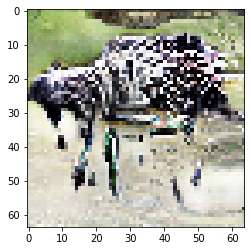

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 69

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 6.639036178588867 sec
Gen loss: 1.3748616659364035, Disc loss: 1.455915321444356, Disc valid real loss: 0.5350954267521237, Disc valid fake loss: 0.5076175148403922, Disc class real loss: 0.06511979132517089, Disc class fake loss: 0.3480825859316906
Time for epoch 2 is 6.541198015213013 sec
Gen loss: 1.3943129154138787, Disc loss: 1.4624360990385676, Disc valid real loss: 0.5326927919373956, Disc valid fake loss: 0.5106437698353169, Disc class real loss: 0.059265745556669656, Disc class fake loss: 0.35983378687050455
Time for epoch 3 is 6.595113515853882 sec
Gen loss: 1.4433423232200533, Disc loss: 1.450377271618954, Disc valid real loss: 0.5273443519376045, Disc valid fake loss: 0.49971880885057673, Disc class real loss: 0.06574554877561452, Disc class fake loss: 0.3575685633303121
Time for epoch 4 is 6.570847272872925 sec
Gen loss: 1.372627659592517

Time for epoch 31 is 6.546694993972778 sec
Gen loss: 1.397314190864563, Disc loss: 1.4770044996294864, Disc valid real loss: 0.5329170131752657, Disc valid fake loss: 0.5123758636588274, Disc class real loss: 0.06289902194078233, Disc class fake loss: 0.36881260339950406
Time for epoch 32 is 6.57438063621521 sec
Gen loss: 1.3675309752309046, Disc loss: 1.4327711268912915, Disc valid real loss: 0.5288442099510238, Disc valid fake loss: 0.5039581006696058, Disc class real loss: 0.0550110800703446, Disc class fake loss: 0.3449577344364898
Time for epoch 33 is 6.5140886306762695 sec
Gen loss: 1.4259100556373596, Disc loss: 1.4313940537530323, Disc valid real loss: 0.5219672097023144, Disc valid fake loss: 0.49813170141951985, Disc class real loss: 0.05673019822990132, Disc class fake loss: 0.3545649478775124
Time for epoch 34 is 6.492558479309082 sec
Gen loss: 1.3953426646631817, Disc loss: 1.4624969380539516, Disc valid real loss: 0.5320353849336158, Disc valid fake loss: 0.50033194866291

Time for epoch 62 is 6.572423219680786 sec
Gen loss: 1.3991478737010512, Disc loss: 1.440416046006735, Disc valid real loss: 0.526453701216121, Disc valid fake loss: 0.5138170162952224, Disc class real loss: 0.05598696902648784, Disc class fake loss: 0.3441583596083314
Time for epoch 63 is 6.534084796905518 sec
Gen loss: 1.3491413329922877, Disc loss: 1.4708531187024227, Disc valid real loss: 0.5396586154089418, Disc valid fake loss: 0.5183954212901204, Disc class real loss: 0.05961814590155819, Disc class fake loss: 0.3531809385952561
Time for epoch 64 is 6.518164873123169 sec
Gen loss: 1.4054519485595613, Disc loss: 1.4338202795317008, Disc valid real loss: 0.5216860847417698, Disc valid fake loss: 0.5110835005031076, Disc class real loss: 0.057381665775400784, Disc class fake loss: 0.34366902827046986
Time for epoch 65 is 6.516185283660889 sec
Gen loss: 1.3824851436670436, Disc loss: 1.4554142660872882, Disc valid real loss: 0.5284249420429386, Disc valid fake loss: 0.50888248325087

Time for epoch 93 is 6.560312271118164 sec
Gen loss: 1.3674852064875669, Disc loss: 1.4735817056755687, Disc valid real loss: 0.5441909657661305, Disc valid fake loss: 0.5111060842525127, Disc class real loss: 0.06987370031636728, Disc class fake loss: 0.34841095634497876
Time for epoch 94 is 6.564795970916748 sec
Gen loss: 1.3966147054073423, Disc loss: 1.4302980629510658, Disc valid real loss: 0.5222838803432709, Disc valid fake loss: 0.4967555197518925, Disc class real loss: 0.049792200705946185, Disc class fake loss: 0.36146645984330844
Time for epoch 95 is 6.561482667922974 sec
Gen loss: 1.4196819046209024, Disc loss: 1.4463888347841973, Disc valid real loss: 0.5327520878162495, Disc valid fake loss: 0.5013766742722933, Disc class real loss: 0.06395127880657742, Disc class fake loss: 0.34830879177464996
Time for epoch 96 is 6.565677165985107 sec
Gen loss: 1.3946215655914573, Disc loss: 1.4551755598811216, Disc valid real loss: 0.5298491219101951, Disc valid fake loss: 0.5035543233

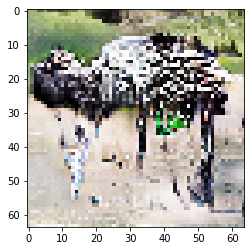

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 70

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 6.546159744262695 sec
Gen loss: 1.4132202981516373, Disc loss: 1.4426226622836535, Disc valid real loss: 0.5255911788621614, Disc valid fake loss: 0.5032813689389894, Disc class real loss: 0.05938145482836854, Disc class fake loss: 0.3543686527585567
Time for epoch 2 is 6.555780410766602 sec
Gen loss: 1.3984597373840422, Disc loss: 1.4616255850292916, Disc valid real loss: 0.5317014970405157, Disc valid fake loss: 0.5095863160352374, Disc class real loss: 0.06445458218141265, Disc class fake loss: 0.355883183954067
Time for epoch 3 is 6.568570137023926 sec
Gen loss: 1.417942835841068, Disc loss: 1.427400529384613, Disc valid real loss: 0.522276161888311, Disc valid fake loss: 0.4983202589805736, Disc class real loss: 0.05593674413475403, Disc class fake loss: 0.350867360830307
Time for epoch 4 is 6.532760381698608 sec
Gen loss: 1.3955531667831331, Dis

Time for epoch 31 is 6.550480127334595 sec
Gen loss: 1.3523386328719382, Disc loss: 1.4610244222851687, Disc valid real loss: 0.5344481728104657, Disc valid fake loss: 0.5169984396806983, Disc class real loss: 0.06460548065559463, Disc class fake loss: 0.34497233055705245
Time for epoch 32 is 6.501969337463379 sec
Gen loss: 1.4208319623802983, Disc loss: 1.4349795198717783, Disc valid real loss: 0.5219707752383033, Disc valid fake loss: 0.5006275878742684, Disc class real loss: 0.059768809422547385, Disc class fake loss: 0.3526123519986868
Time for epoch 33 is 6.5140886306762695 sec
Gen loss: 1.4134706161742987, Disc loss: 1.437866318364476, Disc valid real loss: 0.5243618004890376, Disc valid fake loss: 0.5022543471219928, Disc class real loss: 0.06788231143023991, Disc class fake loss: 0.3433678597645011
Time for epoch 34 is 6.505831003189087 sec
Gen loss: 1.39574533700943, Disc loss: 1.4488959773335346, Disc valid real loss: 0.5288569497507672, Disc valid fake loss: 0.50639071644738

Time for epoch 62 is 6.54911208152771 sec
Gen loss: 1.3989513072856636, Disc loss: 1.4353044428104578, Disc valid real loss: 0.5209662607589434, Disc valid fake loss: 0.5114206789537917, Disc class real loss: 0.06395052345523741, Disc class fake loss: 0.3389669791470433
Time for epoch 63 is 6.5545127391815186 sec
Gen loss: 1.3623331126778624, Disc loss: 1.4609537845434144, Disc valid real loss: 0.5290044428304185, Disc valid fake loss: 0.513733372612055, Disc class real loss: 0.06503483805423711, Disc class fake loss: 0.3531811328734769
Time for epoch 64 is 6.535258054733276 sec
Gen loss: 1.4142811769662902, Disc loss: 1.4667339387328127, Disc valid real loss: 0.5336738069390141, Disc valid fake loss: 0.5013436964431475, Disc class real loss: 0.05756986057006776, Disc class fake loss: 0.3741465689571098
Time for epoch 65 is 6.537043571472168 sec
Gen loss: 1.4257702571015025, Disc loss: 1.4586396141107691, Disc valid real loss: 0.5197122890588849, Disc valid fake loss: 0.491658177140147

Time for epoch 93 is 6.557785749435425 sec
Gen loss: 1.378097001203271, Disc loss: 1.4750857873018397, Disc valid real loss: 0.5405112458176391, Disc valid fake loss: 0.5139933242354282, Disc class real loss: 0.06681096212678524, Disc class fake loss: 0.35377025517613386
Time for epoch 94 is 6.56662130355835 sec
Gen loss: 1.3906600835711458, Disc loss: 1.453019589878792, Disc valid real loss: 0.5353086654876553, Disc valid fake loss: 0.4986086759802907, Disc class real loss: 0.06416308491079267, Disc class fake loss: 0.35493917187112706
Time for epoch 95 is 6.5598464012146 sec
Gen loss: 1.3965381633403688, Disc loss: 1.4440470362125442, Disc valid real loss: 0.527405530387579, Disc valid fake loss: 0.5079776286039241, Disc class real loss: 0.05959428088782832, Disc class fake loss: 0.34906960096816686
Time for epoch 96 is 6.543690919876099 sec
Gen loss: 1.3997897665167964, Disc loss: 1.442741978307103, Disc valid real loss: 0.5251845149106757, Disc valid fake loss: 0.5024626941181892, 

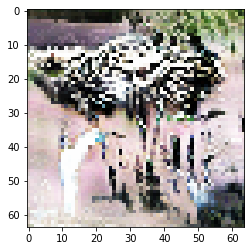

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 71

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 6.556880712509155 sec
Gen loss: 1.407479197133419, Disc loss: 1.4625809234242106, Disc valid real loss: 0.5329343695626703, Disc valid fake loss: 0.50928354939056, Disc class real loss: 0.058762853615917265, Disc class fake loss: 0.3616001545343288
Time for epoch 2 is 6.560023784637451 sec
Gen loss: 1.3486440077770587, Disc loss: 1.474115087542423, Disc valid real loss: 0.5489806013051853, Disc valid fake loss: 0.5167263384128726, Disc class real loss: 0.060636664719082585, Disc class fake loss: 0.34777147860028024
Time for epoch 3 is 6.553632974624634 sec
Gen loss: 1.3783818414044935, Disc loss: 1.44685140841229, Disc valid real loss: 0.5269753226014071, Disc valid fake loss: 0.5020310397064963, Disc class real loss: 0.059057488241557814, Disc class fake loss: 0.3587875601857208
Time for epoch 4 is 6.570939302444458 sec
Gen loss: 1.386367576759915, D

Time for epoch 31 is 6.566257953643799 sec
Gen loss: 1.4162604212760925, Disc loss: 1.446005284093147, Disc valid real loss: 0.5262790769338608, Disc valid fake loss: 0.5105342882317166, Disc class real loss: 0.058368547906189464, Disc class fake loss: 0.350823370133375
Time for epoch 32 is 6.577737808227539 sec
Gen loss: 1.40985410227332, Disc loss: 1.460654202588769, Disc valid real loss: 0.5253733419055162, Disc valid fake loss: 0.5011598370796027, Disc class real loss: 0.06513418109145362, Disc class fake loss: 0.3689868406414293
Time for epoch 33 is 6.561142921447754 sec
Gen loss: 1.3881013663702233, Disc loss: 1.4499631416659022, Disc valid real loss: 0.5387641751142436, Disc valid fake loss: 0.5096981192744056, Disc class real loss: 0.06447435277080986, Disc class fake loss: 0.3370264908515437
Time for epoch 34 is 6.539487600326538 sec
Gen loss: 1.3782185232916544, Disc loss: 1.4389516759750456, Disc valid real loss: 0.5232361894707347, Disc valid fake loss: 0.5061484930473704, 

Time for epoch 62 is 6.579277753829956 sec
Gen loss: 1.374852799052416, Disc loss: 1.4386752663656723, Disc valid real loss: 0.5221937655709511, Disc valid fake loss: 0.5097593843590381, Disc class real loss: 0.0558339845724837, Disc class fake loss: 0.3508881303633368
Time for epoch 63 is 6.635827541351318 sec
Gen loss: 1.410684781712155, Disc loss: 1.45349513098251, Disc valid real loss: 0.5380092237231343, Disc valid fake loss: 0.502725059209868, Disc class real loss: 0.061608493390363145, Disc class fake loss: 0.3511523506929015
Time for epoch 64 is 6.606041431427002 sec
Gen loss: 1.4029277833395226, Disc loss: 1.455984814915546, Disc valid real loss: 0.5363814343893251, Disc valid fake loss: 0.5086461196458617, Disc class real loss: 0.06289782328666513, Disc class fake loss: 0.3480594324511151
Time for epoch 65 is 6.551185131072998 sec
Gen loss: 1.3813716623672219, Disc loss: 1.4550201442352562, Disc valid real loss: 0.5284399560024572, Disc valid fake loss: 0.5065465971480968, Di

Time for epoch 93 is 6.5657079219818115 sec
Gen loss: 1.3651758099711218, Disc loss: 1.4476653455301773, Disc valid real loss: 0.5438529275530992, Disc valid fake loss: 0.5107356230186861, Disc class real loss: 0.062267752970720444, Disc class fake loss: 0.33080904031995423
Time for epoch 94 is 6.600702285766602 sec
Gen loss: 1.404233039118523, Disc loss: 1.4441815001326939, Disc valid real loss: 0.5190141145573106, Disc valid fake loss: 0.5065505790502526, Disc class real loss: 0.05746454418620615, Disc class fake loss: 0.3611522601094357
Time for epoch 95 is 6.557021379470825 sec
Gen loss: 1.4076842679533847, Disc loss: 1.4580847128879193, Disc valid real loss: 0.5289589435208676, Disc valid fake loss: 0.5085249827351681, Disc class real loss: 0.06585647082118708, Disc class fake loss: 0.3547443154073039
Time for epoch 96 is 6.582871198654175 sec
Gen loss: 1.3565293065337247, Disc loss: 1.44934310088324, Disc valid real loss: 0.5375043949068978, Disc valid fake loss: 0.52090642757193

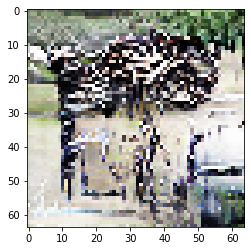

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 72

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 6.498418092727661 sec
Gen loss: 1.4111890522546546, Disc loss: 1.4632718109114224, Disc valid real loss: 0.5405236214052799, Disc valid fake loss: 0.5063198946936186, Disc class real loss: 0.056723065774476285, Disc class fake loss: 0.3597052305243736
Time for epoch 2 is 6.5254998207092285 sec
Gen loss: 1.391542220531508, Disc loss: 1.4740646526563999, Disc valid real loss: 0.5348335676068483, Disc valid fake loss: 0.5142276987086895, Disc class real loss: 0.061266477275260744, Disc class fake loss: 0.36373691880252473
Time for epoch 3 is 6.577033519744873 sec
Gen loss: 1.381609003904254, Disc loss: 1.4677617910296419, Disc valid real loss: 0.5387659783280173, Disc valid fake loss: 0.5074366644717926, Disc class real loss: 0.06869651836635501, Disc class fake loss: 0.3528626256644033
Time for epoch 4 is 6.564116954803467 sec
Gen loss: 1.39422134050103

Time for epoch 31 is 6.559274673461914 sec
Gen loss: 1.395578572223353, Disc loss: 1.4464859362951545, Disc valid real loss: 0.5339280188430188, Disc valid fake loss: 0.5145100414059883, Disc class real loss: 0.06590808543165452, Disc class fake loss: 0.33213978854202947
Time for epoch 32 is 6.519981145858765 sec
Gen loss: 1.3991010126679442, Disc loss: 1.4415693095950193, Disc valid real loss: 0.5204640271705251, Disc valid fake loss: 0.5064837210053621, Disc class real loss: 0.06062279574080305, Disc class fake loss: 0.35399877535569113
Time for epoch 33 is 6.5179688930511475 sec
Gen loss: 1.4240355651045955, Disc loss: 1.4891041274680648, Disc valid real loss: 0.5314707840944446, Disc valid fake loss: 0.5070924725989963, Disc class real loss: 0.06392997599255597, Disc class fake loss: 0.3866108964782122
Time for epoch 34 is 6.518259286880493 sec
Gen loss: 1.3600260587625725, Disc loss: 1.4467744349047196, Disc valid real loss: 0.5284322867559832, Disc valid fake loss: 0.515366634310

Time for epoch 62 is 6.5538108348846436 sec
Gen loss: 1.3669869331426399, Disc loss: 1.472398534763691, Disc valid real loss: 0.5392499657910924, Disc valid fake loss: 0.5214474064319633, Disc class real loss: 0.06113649240889868, Disc class fake loss: 0.3505646718102832
Time for epoch 63 is 6.55919623374939 sec
Gen loss: 1.4136096190574556, Disc loss: 1.4308627961679947, Disc valid real loss: 0.5216127996181332, Disc valid fake loss: 0.5098719011212505, Disc class real loss: 0.051928933852671666, Disc class fake loss: 0.34744915838331675
Time for epoch 64 is 6.563684701919556 sec
Gen loss: 1.388245508421299, Disc loss: 1.4703835169243258, Disc valid real loss: 0.5308384820818901, Disc valid fake loss: 0.5191755870053935, Disc class real loss: 0.05628092050130024, Disc class fake loss: 0.36408852547580417
Time for epoch 65 is 6.56656813621521 sec
Gen loss: 1.3768448503904565, Disc loss: 1.4265060358962347, Disc valid real loss: 0.5263856294196706, Disc valid fake loss: 0.50534635453030

Time for epoch 93 is 6.5473785400390625 sec
Gen loss: 1.4320597724859105, Disc loss: 1.4389848362567812, Disc valid real loss: 0.5238594263792038, Disc valid fake loss: 0.4978129278088725, Disc class real loss: 0.06148566181641505, Disc class fake loss: 0.3558268202252166
Time for epoch 94 is 6.5681257247924805 sec
Gen loss: 1.4143526914507845, Disc loss: 1.4602374316647995, Disc valid real loss: 0.5232685527136159, Disc valid fake loss: 0.503402499785257, Disc class real loss: 0.06319574036819557, Disc class fake loss: 0.37037063584944535
Time for epoch 95 is 6.6117165088653564 sec
Gen loss: 1.3995785934980525, Disc loss: 1.4649492654689522, Disc valid real loss: 0.5353583421471507, Disc valid fake loss: 0.5125892027172931, Disc class real loss: 0.06274619906515339, Disc class fake loss: 0.3542555278210446
Time for epoch 96 is 6.565922498703003 sec
Gen loss: 1.3752300676911375, Disc loss: 1.4415924833264462, Disc valid real loss: 0.5286708371930344, Disc valid fake loss: 0.50718623902

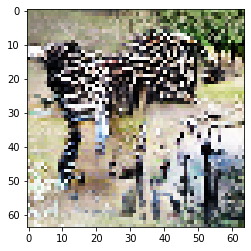

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 73

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 6.555097341537476 sec
Gen loss: 1.3659957328508066, Disc loss: 1.472045571305031, Disc valid real loss: 0.5347080443834149, Disc valid fake loss: 0.5143630676144777, Disc class real loss: 0.06744556145222727, Disc class fake loss: 0.3555288927326369
Time for epoch 2 is 6.539079666137695 sec
Gen loss: 1.4145933098571246, Disc loss: 1.442201621657194, Disc valid real loss: 0.5334272859401481, Disc valid fake loss: 0.5001031292039294, Disc class real loss: 0.06159045832329105, Disc class fake loss: 0.34708074837663144
Time for epoch 3 is 6.542215824127197 sec
Gen loss: 1.3832529637702675, Disc loss: 1.4327747877254042, Disc valid real loss: 0.5163668108194374, Disc valid fake loss: 0.5082987202114837, Disc class real loss: 0.05753997561039923, Disc class fake loss: 0.35056928198697956
Time for epoch 4 is 6.545240163803101 sec
Gen loss: 1.439349774011346,

Time for epoch 31 is 6.525087594985962 sec
Gen loss: 1.371853567140047, Disc loss: 1.4566948954449144, Disc valid real loss: 0.5334787970018942, Disc valid fake loss: 0.512648671172386, Disc class real loss: 0.05600954585865703, Disc class fake loss: 0.3545578846404719
Time for epoch 32 is 6.5314435958862305 sec
Gen loss: 1.3861790604369586, Disc loss: 1.4278884578582853, Disc valid real loss: 0.5257687126827795, Disc valid fake loss: 0.4990647507961406, Disc class real loss: 0.05787631593709595, Disc class fake loss: 0.3451786725240391
Time for epoch 33 is 6.551300525665283 sec
Gen loss: 1.3949280921802965, Disc loss: 1.4353455083314763, Disc valid real loss: 0.5319386561249577, Disc valid fake loss: 0.5152127027165058, Disc class real loss: 0.05308546666813971, Disc class fake loss: 0.3351086817335251
Time for epoch 34 is 6.541186094284058 sec
Gen loss: 1.413758007592933, Disc loss: 1.422196265569953, Disc valid real loss: 0.5245657783261565, Disc valid fake loss: 0.4947109198154405,

Time for epoch 62 is 6.550875902175903 sec
Gen loss: 1.3563877288685289, Disc loss: 1.4605335544708162, Disc valid real loss: 0.534407596428727, Disc valid fake loss: 0.5235067484683769, Disc class real loss: 0.06126323364794168, Disc class fake loss: 0.34135597736336465
Time for epoch 63 is 6.5248212814331055 sec
Gen loss: 1.3660609035990958, Disc loss: 1.4484069485997044, Disc valid real loss: 0.5397096023310063, Disc valid fake loss: 0.5096123303438342, Disc class real loss: 0.05094544536591139, Disc class fake loss: 0.3481395665642827
Time for epoch 64 is 6.572829246520996 sec
Gen loss: 1.385272367056026, Disc loss: 1.4318027919115022, Disc valid real loss: 0.5342419391801191, Disc valid fake loss: 0.5032254828270092, Disc class real loss: 0.05403590417835255, Disc class fake loss: 0.34029946432903757
Time for epoch 65 is 6.564628839492798 sec
Gen loss: 1.4414612720179003, Disc loss: 1.4485891859891802, Disc valid real loss: 0.5205097387349883, Disc valid fake loss: 0.5011034039563

Time for epoch 93 is 6.562214612960815 sec
Gen loss: 1.3537589401699777, Disc loss: 1.4621854985869207, Disc valid real loss: 0.5348677482715872, Disc valid fake loss: 0.5184887746392295, Disc class real loss: 0.06385860783535294, Disc class fake loss: 0.3449703600517539
Time for epoch 94 is 6.526139497756958 sec
Gen loss: 1.401935341746308, Disc loss: 1.431413090852804, Disc valid real loss: 0.5263291623356731, Disc valid fake loss: 0.5010100410774697, Disc class real loss: 0.05710696652775284, Disc class fake loss: 0.3469669199007195
Time for epoch 95 is 6.483641147613525 sec
Gen loss: 1.4129288501517718, Disc loss: 1.4482649516227633, Disc valid real loss: 0.5354356597675833, Disc valid fake loss: 0.5036465943206189, Disc class real loss: 0.06020302456657424, Disc class fake loss: 0.348979672460362
Time for epoch 96 is 6.523086309432983 sec
Gen loss: 1.4314173861991528, Disc loss: 1.435192576674528, Disc valid real loss: 0.5196003219069436, Disc valid fake loss: 0.49603974975125736,

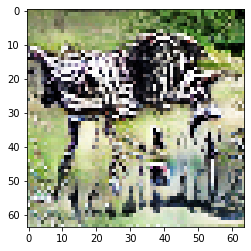

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 74

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 6.546403884887695 sec
Gen loss: 1.3487544738969137, Disc loss: 1.4613419286040372, Disc valid real loss: 0.5385573537543763, Disc valid fake loss: 0.5235176387914392, Disc class real loss: 0.05681865166759032, Disc class fake loss: 0.3424482866688523
Time for epoch 2 is 6.5126190185546875 sec
Gen loss: 1.4122782009978627, Disc loss: 1.4376333778680757, Disc valid real loss: 0.5273551334475362, Disc valid fake loss: 0.4980003506291744, Disc class real loss: 0.05856224495293518, Disc class fake loss: 0.35371564423968627
Time for epoch 3 is 6.50940203666687 sec
Gen loss: 1.457605203223783, Disc loss: 1.4475073010422463, Disc valid real loss: 0.5181658711544302, Disc valid fake loss: 0.4961476734904356, Disc class real loss: 0.0640421157031385, Disc class fake loss: 0.36915164219951907
Time for epoch 4 is 6.527057886123657 sec
Gen loss: 1.3788482941860376

Time for epoch 31 is 6.5666210651397705 sec
Gen loss: 1.381854317215986, Disc loss: 1.459261940662251, Disc valid real loss: 0.5356350825276486, Disc valid fake loss: 0.5094430694399879, Disc class real loss: 0.06261651973824861, Disc class fake loss: 0.35156727287658424
Time for epoch 32 is 6.5654661655426025 sec
Gen loss: 1.403345145458399, Disc loss: 1.4283517786236697, Disc valid real loss: 0.520247606170732, Disc valid fake loss: 0.505661255398462, Disc class real loss: 0.05842250037591818, Disc class fake loss: 0.3440204138845898
Time for epoch 33 is 6.571427583694458 sec
Gen loss: 1.400936787904695, Disc loss: 1.472921953991402, Disc valid real loss: 0.5322522406661233, Disc valid fake loss: 0.5074418712147447, Disc class real loss: 0.07534464489029677, Disc class fake loss: 0.35788319398497426
Time for epoch 34 is 6.553026437759399 sec
Gen loss: 1.3671419793783233, Disc loss: 1.4720522692037183, Disc valid real loss: 0.5420594470098962, Disc valid fake loss: 0.5132423703407132,

Time for epoch 62 is 6.531935453414917 sec
Gen loss: 1.4511268235916315, Disc loss: 1.4717577675054239, Disc valid real loss: 0.5275346782318381, Disc valid fake loss: 0.4976785420331844, Disc class real loss: 0.06086819483912117, Disc class fake loss: 0.38567635653064003
Time for epoch 63 is 6.522523880004883 sec
Gen loss: 1.395632994036342, Disc loss: 1.4560952644015468, Disc valid real loss: 0.5213175374408101, Disc valid fake loss: 0.5026489501429159, Disc class real loss: 0.06441627835670789, Disc class fake loss: 0.36771250386224236
Time for epoch 64 is 6.5296220779418945 sec
Gen loss: 1.4069958412370016, Disc loss: 1.4569011094958284, Disc valid real loss: 0.5291744853521503, Disc valid fake loss: 0.5131476609859356, Disc class real loss: 0.06355697371682889, Disc class fake loss: 0.35102199594122035
Time for epoch 65 is 6.523376941680908 sec
Gen loss: 1.3754518302374108, Disc loss: 1.4410670510558194, Disc valid real loss: 0.527096847635369, Disc valid fake loss: 0.511301277162

Time for epoch 93 is 6.552308082580566 sec
Gen loss: 1.3942309514034625, Disc loss: 1.4475321513275767, Disc valid real loss: 0.5424607879547185, Disc valid fake loss: 0.5128432164012, Disc class real loss: 0.051821813649270514, Disc class fake loss: 0.3404063345041386
Time for epoch 94 is 6.541522741317749 sec
Gen loss: 1.3859136270922283, Disc loss: 1.4555434896502384, Disc valid real loss: 0.5220121233615764, Disc valid fake loss: 0.5137274137070013, Disc class real loss: 0.06003560732811863, Disc class fake loss: 0.3597683533376386
Time for epoch 95 is 6.544205904006958 sec
Gen loss: 1.3741547811863035, Disc loss: 1.4741905577654062, Disc valid real loss: 0.5322549741628558, Disc valid fake loss: 0.5134631225536036, Disc class real loss: 0.0685673771063299, Disc class fake loss: 0.35990508814710515
Time for epoch 96 is 6.554818391799927 sec
Gen loss: 1.3607880590960038, Disc loss: 1.4379769376544065, Disc valid real loss: 0.5321292372983556, Disc valid fake loss: 0.5136789864925451

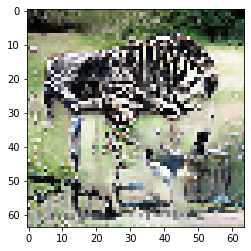

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 75

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 6.506375551223755 sec
Gen loss: 1.3871700271617535, Disc loss: 1.4496388185855955, Disc valid real loss: 0.5336553608608801, Disc valid fake loss: 0.5123737974222317, Disc class real loss: 0.05255770533031589, Disc class fake loss: 0.35105195338296336
Time for epoch 2 is 6.482208967208862 sec
Gen loss: 1.409321696952332, Disc loss: 1.446852338175441, Disc valid real loss: 0.5270157589815384, Disc valid fake loss: 0.5096115338247876, Disc class real loss: 0.05625319935051118, Disc class fake loss: 0.35397184596851816
Time for epoch 3 is 6.626715898513794 sec
Gen loss: 1.4086258875769238, Disc loss: 1.448509155664333, Disc valid real loss: 0.5193392088593438, Disc valid fake loss: 0.5092637507721435, Disc class real loss: 0.05615421993722922, Disc class fake loss: 0.3637519759494205
Time for epoch 4 is 6.612409353256226 sec
Gen loss: 1.4088555366493936,

Time for epoch 31 is 6.530472278594971 sec
Gen loss: 1.3761151828045068, Disc loss: 1.4593204336110936, Disc valid real loss: 0.5385409134418465, Disc valid fake loss: 0.5155860760877299, Disc class real loss: 0.06590848555517664, Disc class fake loss: 0.33928495924919844
Time for epoch 32 is 6.52103066444397 sec
Gen loss: 1.3950496704079385, Disc loss: 1.451957219561865, Disc valid real loss: 0.5225083795051242, Disc valid fake loss: 0.5011002906533175, Disc class real loss: 0.06419757536888598, Disc class fake loss: 0.3641509731235199
Time for epoch 33 is 6.5191380977630615 sec
Gen loss: 1.4135588428308798, Disc loss: 1.4398807259493096, Disc valid real loss: 0.5296191098385079, Disc valid fake loss: 0.5077883672229079, Disc class real loss: 0.06025824999994447, Disc class fake loss: 0.3422149980310784
Time for epoch 34 is 6.681344747543335 sec
Gen loss: 1.3866786076578983, Disc loss: 1.459106636601825, Disc valid real loss: 0.533176088055899, Disc valid fake loss: 0.5113013904801634

Time for epoch 62 is 6.627399444580078 sec
Gen loss: 1.3696805010008257, Disc loss: 1.460000379140987, Disc valid real loss: 0.5356374454013136, Disc valid fake loss: 0.507346669775109, Disc class real loss: 0.06478281132064673, Disc class fake loss: 0.3522334538919981
Time for epoch 63 is 6.539817810058594 sec
Gen loss: 1.3779180715250414, Disc loss: 1.466934317766234, Disc valid real loss: 0.5324978901203289, Disc valid fake loss: 0.5116178918369981, Disc class real loss: 0.0654638184080182, Disc class fake loss: 0.3573547144702008
Time for epoch 64 is 6.550114393234253 sec
Gen loss: 1.3804577810819758, Disc loss: 1.4691227639830389, Disc valid real loss: 0.5438602327607399, Disc valid fake loss: 0.5091202853377476, Disc class real loss: 0.06573925952042647, Disc class fake loss: 0.3504029824723338
Time for epoch 65 is 6.563095331192017 sec
Gen loss: 1.373317265233328, Disc loss: 1.4408666650916255, Disc valid real loss: 0.5312131116556567, Disc valid fake loss: 0.5095983244651971, D

Time for epoch 93 is 6.56071400642395 sec
Gen loss: 1.3977095734241396, Disc loss: 1.4696328653845676, Disc valid real loss: 0.5373213641172232, Disc valid fake loss: 0.5108302897492121, Disc class real loss: 0.06403984553397221, Disc class fake loss: 0.357441360780666
Time for epoch 94 is 6.508693218231201 sec
Gen loss: 1.3548093264879182, Disc loss: 1.4438539064207743, Disc valid real loss: 0.526358139029769, Disc valid fake loss: 0.5074879412734231, Disc class real loss: 0.06276348254881627, Disc class fake loss: 0.34724434612448823
Time for epoch 95 is 6.513915777206421 sec
Gen loss: 1.3968061070109523, Disc loss: 1.4585048154343005, Disc valid real loss: 0.5318462243953417, Disc valid fake loss: 0.5111458511200062, Disc class real loss: 0.05485671157488426, Disc class fake loss: 0.36065601882373177
Time for epoch 96 is 6.511446237564087 sec
Gen loss: 1.3724949249001437, Disc loss: 1.4501336771388387, Disc valid real loss: 0.534748398460621, Disc valid fake loss: 0.5037060386912767

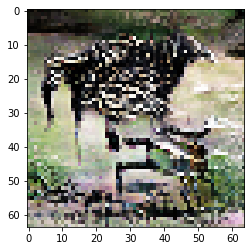

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 76

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 6.515627384185791 sec
Gen loss: 1.4049423517182815, Disc loss: 1.4489721087522285, Disc valid real loss: 0.5282777301793875, Disc valid fake loss: 0.5049236610878346, Disc class real loss: 0.0648460341373805, Disc class fake loss: 0.35092468405965455
Time for epoch 2 is 6.534225940704346 sec
Gen loss: 1.4412004005077272, Disc loss: 1.4771538640177526, Disc valid real loss: 0.5249304863256078, Disc valid fake loss: 0.5058786877712538, Disc class real loss: 0.06300237704255228, Disc class fake loss: 0.3833423106129779
Time for epoch 3 is 6.5472095012664795 sec
Gen loss: 1.3878611499486968, Disc loss: 1.461318248926207, Disc valid real loss: 0.5290263080319693, Disc valid fake loss: 0.5059304556181264, Disc class real loss: 0.06004841684710321, Disc class fake loss: 0.36631307079521724
Time for epoch 4 is 6.496702194213867 sec
Gen loss: 1.419455903214077

Time for epoch 31 is 6.634437322616577 sec
Gen loss: 1.401388623686724, Disc loss: 1.450709412610808, Disc valid real loss: 0.5343911776015925, Disc valid fake loss: 0.5063604759268983, Disc class real loss: 0.063255739161409, Disc class fake loss: 0.34670202204481115
Time for epoch 32 is 6.53402853012085 sec
Gen loss: 1.4237442785917327, Disc loss: 1.4430056761863619, Disc valid real loss: 0.5280749174051507, Disc valid fake loss: 0.5019260497633801, Disc class real loss: 0.05829320831473397, Disc class fake loss: 0.3547115040033363
Time for epoch 33 is 6.520084857940674 sec
Gen loss: 1.3817451388336892, Disc loss: 1.4631344142348268, Disc valid real loss: 0.5370076442527216, Disc valid fake loss: 0.5064923872434816, Disc class real loss: 0.058133502071181876, Disc class fake loss: 0.36150088052936763
Time for epoch 34 is 6.516160488128662 sec
Gen loss: 1.3942274284917255, Disc loss: 1.461076447436976, Disc valid real loss: 0.5357527615025987, Disc valid fake loss: 0.5073386089399804,

Time for epoch 62 is 6.547444820404053 sec
Gen loss: 1.4255655276220898, Disc loss: 1.4864560331023016, Disc valid real loss: 0.5266299523239912, Disc valid fake loss: 0.5047578848032064, Disc class real loss: 0.07370166582336952, Disc class fake loss: 0.3813665331622889
Time for epoch 63 is 6.514123916625977 sec
Gen loss: 1.4052684137294458, Disc loss: 1.4260490571343623, Disc valid real loss: 0.5202173316894576, Disc valid fake loss: 0.49988773898329847, Disc class real loss: 0.060402435477996286, Disc class fake loss: 0.34554155140595383
Time for epoch 64 is 6.525038957595825 sec
Gen loss: 1.3763257632421892, Disc loss: 1.4713116766408432, Disc valid real loss: 0.541679204896439, Disc valid fake loss: 0.5145843588682109, Disc class real loss: 0.06323505117731212, Disc class fake loss: 0.3518130628522052
Time for epoch 65 is 6.528149604797363 sec
Gen loss: 1.3772795900355939, Disc loss: 1.4587678507316943, Disc valid real loss: 0.5340055618868318, Disc valid fake loss: 0.506429752118

Time for epoch 93 is 6.503047466278076 sec
Gen loss: 1.3831426750781923, Disc loss: 1.4683232730211213, Disc valid real loss: 0.5306079356476318, Disc valid fake loss: 0.5114979066474493, Disc class real loss: 0.06129806070469406, Disc class fake loss: 0.36491936895736427
Time for epoch 94 is 6.555289268493652 sec
Gen loss: 1.3938664288021798, Disc loss: 1.47648478386014, Disc valid real loss: 0.5275526998001475, Disc valid fake loss: 0.5057225088740505, Disc class real loss: 0.06728868715215994, Disc class fake loss: 0.37592089323456895
Time for epoch 95 is 6.535930633544922 sec
Gen loss: 1.3934575901475064, Disc loss: 1.4529658140138138, Disc valid real loss: 0.5333448443994966, Disc valid fake loss: 0.513949976064438, Disc class real loss: 0.06300536378525025, Disc class fake loss: 0.34266562868169576
Time for epoch 96 is 6.4986183643341064 sec
Gen loss: 1.3724991623745408, Disc loss: 1.4729110411433286, Disc valid real loss: 0.5286502093076706, Disc valid fake loss: 0.5040641470357

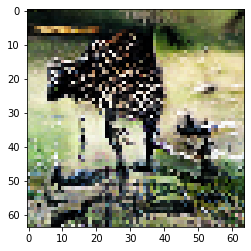

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 77

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 6.540470361709595 sec
Gen loss: 1.3688826755035755, Disc loss: 1.4704376050206118, Disc valid real loss: 0.5393118461550668, Disc valid fake loss: 0.5084731350111407, Disc class real loss: 0.06407498903464266, Disc class fake loss: 0.3585776376949493
Time for epoch 2 is 6.524874210357666 sec
Gen loss: 1.400767563387405, Disc loss: 1.4624827150688615, Disc valid real loss: 0.5352967792125636, Disc valid fake loss: 0.5091062508696733, Disc class real loss: 0.06269896304408132, Disc class fake loss: 0.3553807255053936
Time for epoch 3 is 6.527349948883057 sec
Gen loss: 1.374170231264691, Disc loss: 1.472072147352751, Disc valid real loss: 0.5274717951583308, Disc valid fake loss: 0.5060968350532443, Disc class real loss: 0.06683752642467965, Disc class fake loss: 0.37166599130128014
Time for epoch 4 is 6.537018060684204 sec
Gen loss: 1.430417186992113, D

Time for epoch 31 is 6.559873342514038 sec
Gen loss: 1.4453558207944381, Disc loss: 1.4685096116953118, Disc valid real loss: 0.5273892318093499, Disc valid fake loss: 0.5022056412904762, Disc class real loss: 0.06630803335479699, Disc class fake loss: 0.3726067058308873
Time for epoch 32 is 6.531166315078735 sec
Gen loss: 1.373059486926988, Disc loss: 1.4523526901422545, Disc valid real loss: 0.5279645677222762, Disc valid fake loss: 0.507629509582076, Disc class real loss: 0.06241298304751602, Disc class fake loss: 0.3543456269991259
Time for epoch 33 is 6.537041664123535 sec
Gen loss: 1.4252756515214609, Disc loss: 1.4724902850250865, Disc valid real loss: 0.5233346388437027, Disc valid fake loss: 0.5117472980258077, Disc class real loss: 0.06010989153752277, Disc class fake loss: 0.37729845949730206
Time for epoch 34 is 6.508651971817017 sec
Gen loss: 1.3985863036887591, Disc loss: 1.440336551777152, Disc valid real loss: 0.5251584487945534, Disc valid fake loss: 0.5061195378386697

Time for epoch 62 is 6.534713983535767 sec
Gen loss: 1.3757731328869975, Disc loss: 1.4834118693373923, Disc valid real loss: 0.5297078426147617, Disc valid fake loss: 0.5245702296148899, Disc class real loss: 0.0687845961548128, Disc class fake loss: 0.3603492029617692
Time for epoch 63 is 6.526472091674805 sec
Gen loss: 1.412544199893641, Disc loss: 1.4444589438133462, Disc valid real loss: 0.5228367952066798, Disc valid fake loss: 0.5026238425526508, Disc class real loss: 0.06816610470644285, Disc class fake loss: 0.35083220998734926
Time for epoch 64 is 6.522078275680542 sec
Gen loss: 1.4120001785976941, Disc loss: 1.4691794684459998, Disc valid real loss: 0.5289003937396892, Disc valid fake loss: 0.4994679852280506, Disc class real loss: 0.0682352919396836, Disc class fake loss: 0.37257579861338747
Time for epoch 65 is 6.512413024902344 sec
Gen loss: 1.4000483390896818, Disc loss: 1.453542055085648, Disc valid real loss: 0.5308779613223187, Disc valid fake loss: 0.5038633855969407

Time for epoch 93 is 6.537206411361694 sec
Gen loss: 1.4281647572683733, Disc loss: 1.4579815427924312, Disc valid real loss: 0.5294271917190663, Disc valid fake loss: 0.5022852037881695, Disc class real loss: 0.07391439600262878, Disc class fake loss: 0.35235474743815354
Time for epoch 94 is 6.544166088104248 sec
Gen loss: 1.3748608453329219, Disc loss: 1.4142079765713491, Disc valid real loss: 0.5277323811206707, Disc valid fake loss: 0.5088978607294171, Disc class real loss: 0.06189818944792848, Disc class fake loss: 0.31567954350002975
Time for epoch 95 is 6.524656057357788 sec
Gen loss: 1.448589212672655, Disc loss: 1.451766395984694, Disc valid real loss: 0.5314181769310042, Disc valid fake loss: 0.5025389237805854, Disc class real loss: 0.06307952590814661, Disc class fake loss: 0.3547297689284003
Time for epoch 96 is 6.500765085220337 sec
Gen loss: 1.3764038439406905, Disc loss: 1.437221024965131, Disc valid real loss: 0.5365996428353842, Disc valid fake loss: 0.503490871814794

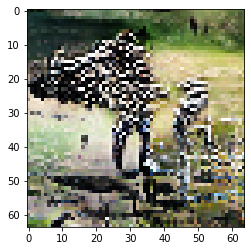

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 78

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 6.46236252784729 sec
Gen loss: 1.3879262728746546, Disc loss: 1.453533869150073, Disc valid real loss: 0.5245654080496278, Disc valid fake loss: 0.5082151399448861, Disc class real loss: 0.06152550323573916, Disc class fake loss: 0.35922782369997613
Time for epoch 2 is 6.473779678344727 sec
Gen loss: 1.38724046668341, Disc loss: 1.4616343930017117, Disc valid real loss: 0.5420008909910224, Disc valid fake loss: 0.5164701443078906, Disc class real loss: 0.06887259617783563, Disc class fake loss: 0.33429076093747173
Time for epoch 3 is 6.493612051010132 sec
Gen loss: 1.3989402034948037, Disc loss: 1.4311126803242884, Disc valid real loss: 0.5319390636543895, Disc valid fake loss: 0.5034588389964991, Disc class real loss: 0.06250461481165054, Disc class fake loss: 0.3332101584000643
Time for epoch 4 is 6.503176212310791 sec
Gen loss: 1.4536635071732278, 

Time for epoch 31 is 6.53615665435791 sec
Gen loss: 1.4029547156289566, Disc loss: 1.4473018531882487, Disc valid real loss: 0.5279887114153352, Disc valid fake loss: 0.5119689032435417, Disc class real loss: 0.05797946317727829, Disc class fake loss: 0.3493647755145334
Time for epoch 32 is 6.519436597824097 sec
Gen loss: 1.4006102299967478, Disc loss: 1.4472721731939981, Disc valid real loss: 0.5289034959535266, Disc valid fake loss: 0.5036905163595843, Disc class real loss: 0.06274390976935582, Disc class fake loss: 0.35193424522443567
Time for epoch 33 is 6.536552906036377 sec
Gen loss: 1.3916643455971118, Disc loss: 1.4484561407981917, Disc valid real loss: 0.5293903726824495, Disc valid fake loss: 0.510091844166434, Disc class real loss: 0.059773019022243315, Disc class fake loss: 0.34920089882473615
Time for epoch 34 is 6.516318321228027 sec
Gen loss: 1.4023057977820552, Disc loss: 1.458290083463802, Disc valid real loss: 0.5294474540061729, Disc valid fake loss: 0.51039441778909

Time for epoch 62 is 6.5362184047698975 sec
Gen loss: 1.3992607822251875, Disc loss: 1.4547815430302953, Disc valid real loss: 0.5414752454258674, Disc valid fake loss: 0.5001487123758294, Disc class real loss: 0.05980333177167056, Disc class fake loss: 0.3533542569899975
Time for epoch 63 is 6.535283803939819 sec
Gen loss: 1.397478772457256, Disc loss: 1.4457780514345613, Disc valid real loss: 0.5329315882436064, Disc valid fake loss: 0.4985685819803282, Disc class real loss: 0.06512466436766391, Disc class fake loss: 0.3491532212166592
Time for epoch 64 is 6.525399923324585 sec
Gen loss: 1.4068434980026512, Disc loss: 1.486771677815637, Disc valid real loss: 0.5321068741207899, Disc valid fake loss: 0.5130920283669649, Disc class real loss: 0.058563098904330195, Disc class fake loss: 0.3830096796154976
Time for epoch 65 is 6.52704119682312 sec
Gen loss: 1.4022768694300984, Disc loss: 1.4597712616587795, Disc valid real loss: 0.5218560460001923, Disc valid fake loss: 0.498963996248189

Time for epoch 93 is 6.575751304626465 sec
Gen loss: 1.3883929973424867, Disc loss: 1.4624461399954418, Disc valid real loss: 0.5325156280467677, Disc valid fake loss: 0.5131994518776273, Disc class real loss: 0.06251353684807369, Disc class fake loss: 0.35421752444533416
Time for epoch 94 is 6.584587335586548 sec
Gen loss: 1.4203206016573795, Disc loss: 1.4584622871737147, Disc valid real loss: 0.518890246575655, Disc valid fake loss: 0.5061874729256297, Disc class real loss: 0.06424523577050761, Disc class fake loss: 0.36913933371042096
Time for epoch 95 is 6.509584903717041 sec
Gen loss: 1.3658962492332902, Disc loss: 1.4658913660881132, Disc valid real loss: 0.5400715737148772, Disc valid fake loss: 0.5165501100032829, Disc class real loss: 0.058207023997119696, Disc class fake loss: 0.35106265098722866
Time for epoch 96 is 6.560331344604492 sec
Gen loss: 1.3801722429519476, Disc loss: 1.4652927011944528, Disc valid real loss: 0.53341708886762, Disc valid fake loss: 0.5107905636000

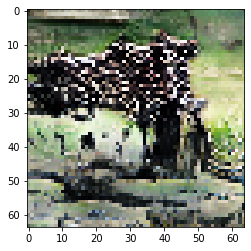

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 79

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 6.515022039413452 sec
Gen loss: 1.4027336572491846, Disc loss: 1.4738755538020023, Disc valid real loss: 0.5320438092877698, Disc valid fake loss: 0.5178706301159637, Disc class real loss: 0.06045225665899167, Disc class fake loss: 0.3635088531083839
Time for epoch 2 is 6.529253005981445 sec
Gen loss: 1.4296783721724222, Disc loss: 1.483197338705839, Disc valid real loss: 0.5262008130896924, Disc valid fake loss: 0.5039895554614622, Disc class real loss: 0.07013904290993936, Disc class fake loss: 0.3828679296556254
Time for epoch 3 is 6.537286281585693 sec
Gen loss: 1.4029933872611025, Disc loss: 1.4487273779719374, Disc valid real loss: 0.5314292751772459, Disc valid fake loss: 0.49911555803792423, Disc class real loss: 0.06421281166136437, Disc class fake loss: 0.3539697414827208
Time for epoch 4 is 6.524709939956665 sec
Gen loss: 1.3934359439583712

Time for epoch 31 is 6.514815092086792 sec
Gen loss: 1.3758918497451516, Disc loss: 1.4726319465526314, Disc valid real loss: 0.544957731872104, Disc valid fake loss: 0.5061775489255439, Disc class real loss: 0.06328408619887087, Disc class fake loss: 0.35821257904171944
Time for epoch 32 is 6.5256264209747314 sec
Gen loss: 1.375015684338503, Disc loss: 1.4340356016574904, Disc valid real loss: 0.5243593970703524, Disc valid fake loss: 0.5113043272218039, Disc class real loss: 0.0627246621676699, Disc class fake loss: 0.3356472147238809
Time for epoch 33 is 6.5393664836883545 sec
Gen loss: 1.4269159436225891, Disc loss: 1.4618413559226102, Disc valid real loss: 0.53552732356759, Disc valid fake loss: 0.5040303803114004, Disc class real loss: 0.06963419360900569, Disc class fake loss: 0.35264946143467757
Time for epoch 34 is 6.498283863067627 sec
Gen loss: 1.3644594002601713, Disc loss: 1.4444073847559995, Disc valid real loss: 0.5341887136184892, Disc valid fake loss: 0.506835714155851

Time for epoch 62 is 6.560796022415161 sec
Gen loss: 1.387495724960815, Disc loss: 1.4660229592822318, Disc valid real loss: 0.5317919909260994, Disc valid fake loss: 0.5191075600856958, Disc class real loss: 0.06696073326206398, Disc class fake loss: 0.34816267441005205
Time for epoch 63 is 6.491097927093506 sec
Gen loss: 1.3900061374486878, Disc loss: 1.4486644645762998, Disc valid real loss: 0.5295508178167565, Disc valid fake loss: 0.5073662294551383, Disc class real loss: 0.05721580521284798, Disc class fake loss: 0.3545316148462684
Time for epoch 64 is 6.49789023399353 sec
Gen loss: 1.3776861151983573, Disc loss: 1.4700453212094862, Disc valid real loss: 0.5399840789478879, Disc valid fake loss: 0.5173674431997676, Disc class real loss: 0.06481852998610499, Disc class fake loss: 0.3478752667041019
Time for epoch 65 is 6.531941175460815 sec
Gen loss: 1.3741418130176013, Disc loss: 1.4237006303182869, Disc valid real loss: 0.5271659351365511, Disc valid fake loss: 0.511108167642770

Time for epoch 93 is 6.53933572769165 sec
Gen loss: 1.4113980476246324, Disc loss: 1.4730706564908804, Disc valid real loss: 0.5392915603033331, Disc valid fake loss: 0.5091401953683343, Disc class real loss: 0.06125130361151816, Disc class fake loss: 0.36338759516907293
Time for epoch 94 is 6.559917449951172 sec
Gen loss: 1.3617856911448545, Disc loss: 1.4548792243003845, Disc valid real loss: 0.5307818244016448, Disc valid fake loss: 0.5115036461935487, Disc class real loss: 0.06047489477029114, Disc class fake loss: 0.3521188640273934
Time for epoch 95 is 6.572218894958496 sec
Gen loss: 1.4393364295016888, Disc loss: 1.4805908930856129, Disc valid real loss: 0.5309822403414305, Disc valid fake loss: 0.5043216293980909, Disc class real loss: 0.059640047828082084, Disc class fake loss: 0.385646975360984
Time for epoch 96 is 6.566522121429443 sec
Gen loss: 1.3537933549215628, Disc loss: 1.4392761629681254, Disc valid real loss: 0.5312222658201705, Disc valid fake loss: 0.51420865363852

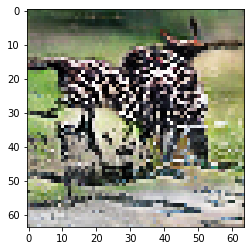

In [72]:
next_starting_checkpoint, totalepochs = long_train(starting_checkpoint=next_starting_checkpoint, 
                                      num_checkpoints=40, 
                                      checkpoint_interval=100, 
                                      g_hist=gen_loss_hist, 
                                      d_hist=disc_loss_hist,
                                      d_real_hist=disc_loss_real_hist,
                                      d_fake_hist=disc_loss_fake_hist,
                                      d_class_real_hist=disc_class_loss_real_hist,
                                      d_class_fake_hist=disc_class_loss_fake_hist,
                                      noise=noise100,
                                      label=label,
                                      save_files=True,
                                      warmup=warmup)

['chihuahua', 'chimpanzee', 'dalmatian', 'dolphin', 'fox', 'giant+panda', 'giraffe', 'otter', 'polar+bear', 'zebra']


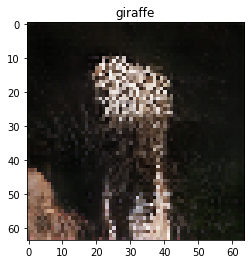

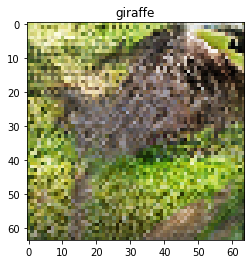

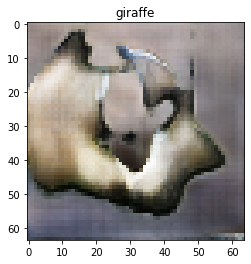

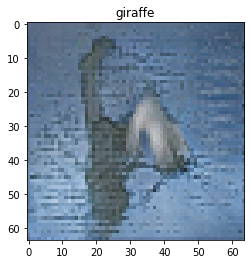

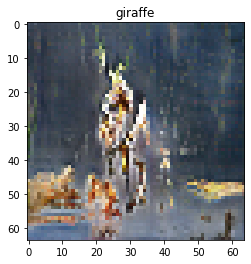

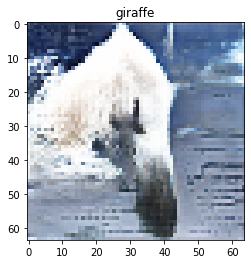

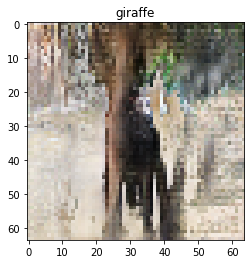

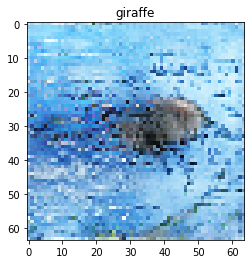

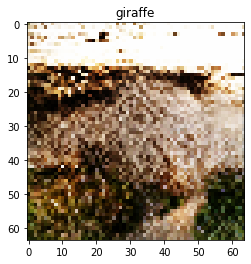

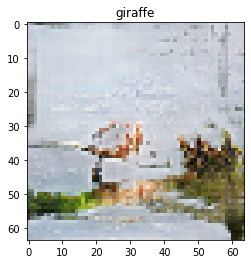

In [178]:
print(img_classes)
lbl = 6
for label in range(10):
    noise = np.random.normal(0, 1, 100)
    generated_image = generator.predict([np.array([noise]), np.array([lbl])] )[0]
    plt.imshow(unnormalize_img(generated_image))
    plt.title(img_classes[lbl])
    plt.show()

In [ ]:
print(img_classes)
noise = np.random.normal(0, 1, 100)
for label in range(10):
    generated_image = generator.predict([np.array([noise]), np.array([label])] )[0]
    plt.imshow(unnormalize_img(generated_image))
    plt.title(img_classes[label])
    plt.show()

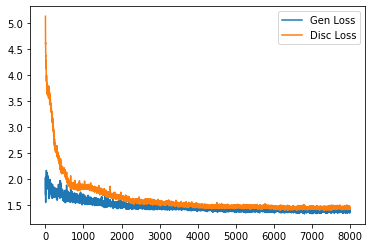

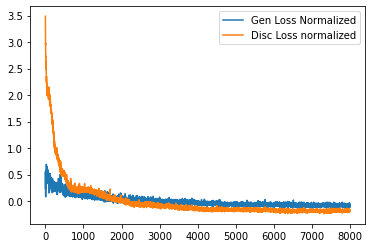

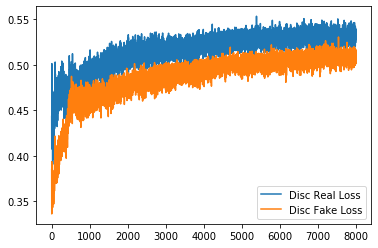

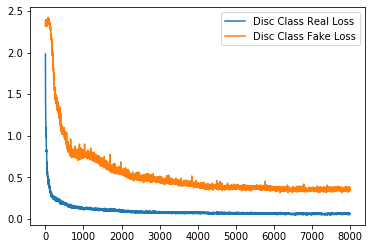

In [73]:
plt.plot(gen_loss_hist)
plt.plot(disc_loss_hist)

plt.legend(['Gen Loss','Disc Loss'])
plt.show()

plt.plot(gen_loss_hist - np.mean(gen_loss_hist))
plt.plot(disc_loss_hist - np.mean(disc_loss_hist))
plt.legend(['Gen Loss Normalized','Disc Loss normalized'])
plt.show()

plt.plot(disc_loss_real_hist)
plt.plot(disc_loss_fake_hist)
plt.legend(['Disc Real Loss','Disc Fake Loss'])
plt.show()

plt.plot(disc_class_loss_real_hist)
plt.plot(disc_class_loss_fake_hist)
plt.legend(['Disc Class Real Loss', 'Disc Class Fake Loss'])
plt.show()


In [ ]:
noise = tf.random.truncated_normal([32, 100])
tf.dtypes.cast(noise, tf.int32)


In [ ]:
for i in range(20,30):
    plt.imshow(unnormalize_img(train_imgs[i]))
    plt.title(img_classes[int(train_classes[i])])
    plt.show()

In [110]:
intermediate_layer_model = Model(inputs=generator.input[1],
                                 outputs=generator.layers[2].output)


In [146]:
total = None
for label in range(10):
    if total is None:
        total = np.abs(intermediate_layer_model.predict(np.array([label]))[0][0])
    total += np.abs(intermediate_layer_model.predict(np.array([label]))[0][0])
print(total)

[1.4813662  3.324339   0.06467424 2.091222   1.6397147  2.0661771
 0.07254416 0.05173346 0.086524   0.09142935 0.09879007 1.6345247
 0.07922477 0.04019855 0.07784063 0.03739833 0.06940697 1.5686858
 0.05430618 3.2591705  0.07109187 0.07295501 0.07550615 0.08807746
 0.09573762 0.05145781 1.4541395  0.05608246 0.0451856  2.0071666
 0.04824371 1.6770221  0.06389748 3.3543847  0.05329057 2.1780565
 0.05956537 0.08226811 2.0665734  0.08440037 0.05068484 0.04458575
 3.4371054  3.468213   1.5551555  3.0973632  2.944477   0.09673037
 0.07615555 0.06649394 2.2727287  0.05530268 0.05483887 0.08108807
 0.06648474 0.06440638 0.0736214  0.0793023  0.04364269 0.0543112
 0.04426712 0.09907044 1.8077899  0.04293458 0.07319558 0.06355483
 1.3837641  1.4420226  0.07457384 0.07882991 0.0593651  2.1069221
 0.07887428 0.08144885 0.06526248 2.2254968  0.04701354 0.05621974
 0.08867246 0.04116593 0.0566268  0.08916073 2.2196956  1.7576953
 0.04202109 2.2771354  0.036235   1.56465    1.6153332  2.2922711
 0.0

In [145]:
intermediate_layer_model.predict(np.array([0]))[0][0]

array([-1.92458183e-03, -1.62278676e+00, -6.12049783e-03, -1.12317484e-02,
       -8.26813839e-03, -7.53762899e-03, -7.26004736e-03, -8.10605753e-03,
        1.26970308e-02,  2.50698137e-03, -1.10032521e-02, -8.53962637e-03,
        1.63613148e-02,  1.87386631e-03, -6.08220045e-03, -3.11995833e-03,
        8.78124498e-03, -8.61075148e-03,  1.77098508e-03,  1.60012329e+00,
        1.54994056e-03,  5.97861363e-03, -2.52426113e-03, -1.11250207e-02,
        8.07293877e-03,  2.46125413e-03,  7.27582444e-03, -4.44540335e-03,
        1.79834734e-03,  8.78576189e-03, -2.68752483e-04, -5.45911072e-03,
       -5.50467055e-03, -1.64083230e+00,  3.89731885e-03,  1.14255045e-02,
       -7.08515930e-04, -8.08619335e-03, -3.80257703e-03,  1.65580548e-02,
        4.32262849e-03, -4.44577588e-03, -1.67813611e+00,  1.83086172e-02,
        2.98354542e-03, -7.60133285e-03,  1.16595989e-02, -1.08783813e-02,
        7.63627794e-03,  2.08262308e-03,  5.38306427e-04,  5.32301702e-03,
        8.25410523e-03,  

In [127]:
test_gen = make_generator_model((100,))

In [128]:
test_gen_embedding = Model(inputs=test_gen.input[1],
                                 outputs=test_gen.layers[2].output)

In [132]:
test_gen_embedding.predict(np.array([7]))[0][0]

array([-0.02777306,  0.01448837,  0.04425693, -0.01405751,  0.04181831,
        0.03838304, -0.02952517, -0.03365806,  0.00770477, -0.03510481,
        0.01450746,  0.02916297, -0.03193333, -0.03746591, -0.03000201,
        0.0376885 , -0.04916662, -0.04815755,  0.04267733, -0.01583723,
       -0.04272591, -0.03361604, -0.0313803 ,  0.01390573,  0.04347849,
       -0.00608898,  0.03912624, -0.04566485,  0.03876077,  0.04091625,
        0.00752451, -0.01201004,  0.0068875 ,  0.01773275,  0.00711704,
        0.0476062 ,  0.04859531, -0.00723255, -0.01229769, -0.03157692,
        0.04739759, -0.01189708, -0.00091181, -0.02166326,  0.03098642,
       -0.01040491, -0.04727868,  0.04063166,  0.0133915 , -0.02309039,
       -0.0055573 , -0.00612253,  0.00766208,  0.02051875,  0.04713381,
        0.00733268, -0.02105333, -0.02800306, -0.01386819, -0.04533693,
       -0.04070151,  0.04080156, -0.02537437,  0.01130278,  0.04064247,
       -0.00696481, -0.01461687, -0.00822568, -0.03039445, -0.02

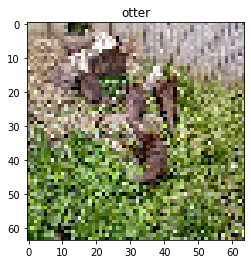

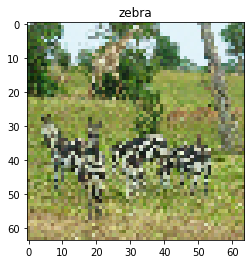

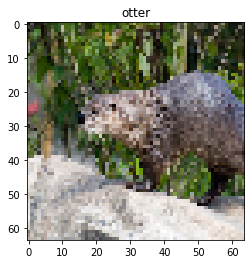

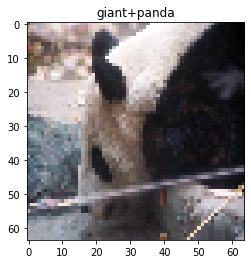

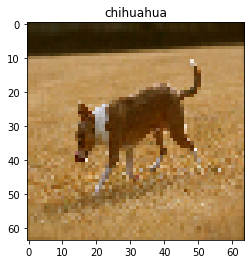

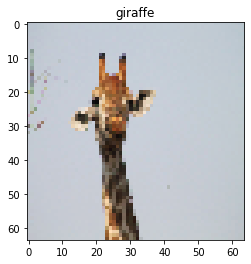

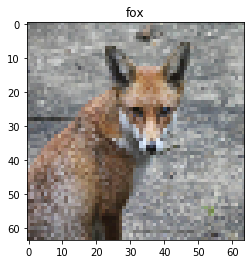

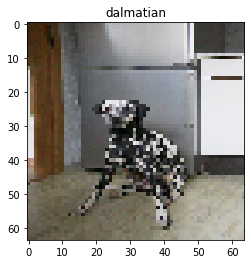

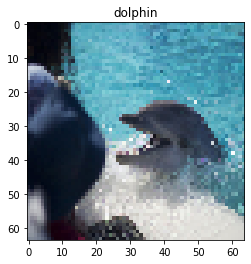

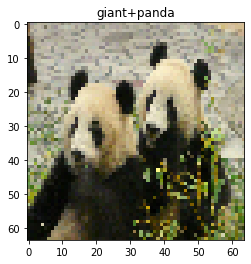

In [137]:
for i in range(10):
    plt.imshow(unnormalize_img(train_imgs[i]))
    plt.title(img_classes[int(train_classes[i])])
    plt.show()